# <img src="img/banner.jpg" style="width: 600px;"/>

image: [MediaPlayNews](https://www.mediaplaynews.com/npd-video-game-sales-fall-for-sixth-consecutive-month/)

<a id=top></a>

# Video Games Analysis

***
**Presentation date of the analysis - 24nd of September 2020**<br>

1. [Introduction](#intro)
1. [Imports](#imports)
1. [Data Collection](#collection)
    - [Loading the datasets](#loading)
    - [Data Definition](#definition)
    - [Merging the datasets](#merge)    
1. [Data Wrangling](#wrangling)
    - [Dealing with Repeated or Not Useful Columns](#repeated)
    - [Dealing with Null Values](#null)  
    - [Changing Data Types](#datatypes)
    - [Creating New Features](#new)
    - [Simplifying existing Features](#simplify)    
1. [EDA](#eda)
    - [Descriptive Data](#descriptive)
    - [Correlations](#corr)
    - [Volcano Plots](#volcano)
    - [Boxplots](#boxplots)
    - [Correspondence Analysis](#ca)    
    - [Time Series](#time)
    - [Stacked Bar Charts](#stacked)
    - [Radar Charts](#radar)

<a id=intro></a>

<div class="span5 alert alert-info">
    <h3> Introduction</h3>
This is an analysis I made for a job interview I had for a company in the gaming industry. <br>
    All information has been taken from public domains<br>
    I am open to constructive feedback from anyone on how to improve it.
    
</div>


<a id=imports></a>

## Imports
***

In [2]:
# data wrangling libraries
import numpy as np
import pandas as pd
import string
import re

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import matplotlib
import adjustText
from adjustText import adjust_text
%matplotlib inline

# statistics libraries
from scipy import stats
import math

# other libraries
import warnings
warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=PendingDeprecationWarning)
pd.set_option('mode.chained_assignment', None)

# Note: you might need to install xlrd (python -m pip install xlrd)

<a id=collection></a>

<br>

## Data Collection
***

<div class="span5 alert alert-info">
<h3> The Datasets</h3>
I have used two publicly available datasets
    <ol>
        <li><a href=https://www.kaggle.com/ashaheedq/video-games-sales-2019>VgChartz</a>: dataset created by Abdulshaheed Alqunber by scraping the vgchartz website </li>
        <li><a href=https://www.kaggle.com/skateddu/metacritic-all-time-games-stats>Metacritic</a>: dataset created by Andrea Cadeddu by scraping metacritc (games from 1995 to 2018)</li>
        <li><a href=https://data.world/julienf/video-games-global-sales-in-volume-1983-2017>Dataworld</a>: Video Games Global Sales in Volume (1983-2017) by Julien Fourrier (I will use this one later on)
    </ol>
    
</div>


In relation to the VgChartz dataset, the existing fields include:

- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
- Genre - Genre of the game
- ESRB Rating - ESRB Rating of the game
- Publisher - Publisher of the game
- Developer - Developer of the game
- Critic Score - Critic score of the game from 10
- User Score - Users score the game from 10
- Total Shipped - Total shipped copies of the game
- Global_Sales - Total worldwide copies sold (in millions)
- NA_Sales - Copies sold in North America (in millions)
- PAL_Sales - Copies sold in Europe (in millions)
- JP_Sales - Copies sold in Japan (in millions)
- Other_Sales - Copies sold in the rest of the world (in millions)
- Year - Year of release of the game

<a id=loading></a>

#### Loading Datasets

In [2]:
vg = pd.read_csv('data/vgchartz/vgsales-12-4-2019.csv')

In [3]:
metacritic = pd.read_csv('data/metacritic_games_2.csv')

<a id=definition></a>


#### Data Definition
In this section we will take a look at characteristics of our available data, like shape, datatypes, null values, etc.

In [4]:
# let's check how many games there are in each dataset and how many fields
print(vg.shape)
print(metacritic.shape)

(55792, 23)
(20422, 18)


In [5]:
# We look at the first row of both datasets
vg.head(1)

Rank        Name    basename   Genre ESRB_Rating Platform Publisher  \
0     1  Wii Sports  wii-sports  Sports           E      Wii  Nintendo   

      Developer  VGChartz_Score  Critic_Score  ...  NA_Sales  PAL_Sales  \
0  Nintendo EAD             NaN           7.7  ...       NaN        NaN   

   JP_Sales  Other_Sales    Year  Last_Update  \
0       NaN          NaN  2006.0          NaN   

                                                 url  status Vgchartzscore  \
0  http://www.vgchartz.com/game/2667/wii-sports/?...       1           NaN   

                                         img_url  
0  /games/boxart/full_2258645AmericaFrontccc.jpg  

[1 rows x 23 columns]

In [6]:
metacritic.head(1)

name platform         developer           publisher genre(s)  \
0  Command & Conquer       PC  Westwood Studios  Virgin Interactive   Sci-Fi   

  players rating attribute  release_date                      link  \
0    1-4       T       NaN  Aug 31, 1995  /game/pc/command-conquer   

   critic_positive  critic_neutral  critic_negative  metascore  user_positive  \
0                5               0                0         94             47   

   user_neutral  user_negative user_score  
0             0              1        8.9

In [7]:
# We look at the last row of both datasets
vg.tail(1)

Rank        Name    basename             Genre ESRB_Rating Platform  \
55791  55792  Falcon Age  falcon-age  Action-Adventure         NaN      PS4   

      Publisher        Developer  VGChartz_Score  Critic_Score  ...  NA_Sales  \
55791   Unknown  Outerloop Games             NaN           NaN  ...       NaN   

       PAL_Sales  JP_Sales  Other_Sales  Year  Last_Update  \
55791        NaN       NaN          NaN   NaN  12th Apr 19   

                                                     url  status  \
55791  http://www.vgchartz.com/game/224692/falcon-age...       1   

      Vgchartzscore                    img_url  
55791           NaN  /games/boxart/default.jpg  

[1 rows x 23 columns]

In [8]:
metacritic.tail(1)

name platform    developer    publisher genre(s)  \
20421  Tennis   Switch  D3Publisher  D3Publisher   Sports   

                     players rating attribute  release_date  \
20421  No Online Multiplayer      E       NaN  Jan 25, 2018   

                      link  critic_positive  critic_neutral  critic_negative  \
20421  /game/switch/tennis                0               0                4   

       metascore  user_positive  user_neutral  user_negative user_score  
20421         28              1             0              0        4.0

In [9]:
# The info from the vg dataset shows 23 columns and 55.000+ entries with some columns with many null values
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

In [10]:
# The metacritic dataset is shorter (20.000+ entries) and 18 columns but it has less critical null values
metacritic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             20422 non-null  object
 1   platform         20422 non-null  object
 2   developer        20385 non-null  object
 3   publisher        20416 non-null  object
 4   genre(s)         20422 non-null  object
 5   players          13193 non-null  object
 6   rating           18131 non-null  object
 7   attribute        324 non-null    object
 8   release_date     20422 non-null  object
 9   link             20422 non-null  object
 10  critic_positive  20422 non-null  int64 
 11  critic_neutral   20422 non-null  int64 
 12  critic_negative  20422 non-null  int64 
 13  metascore        20422 non-null  int64 
 14  user_positive    20422 non-null  int64 
 15  user_neutral     20422 non-null  int64 
 16  user_negative    20422 non-null  int64 
 17  user_score       20422 non-null

<a id=merging></a>

#### Merging the datasets

This is a tricky step. Both dataset are very large and going row by row is not efficient. We need to find a method to combine both datasets that is reliable and with which we lose as less information as possible. We will lose information like it or not, for starters, the metacritic dataset only goes back to 1995, while the vgchartz dataset goes back to 1970.  After some tries, it seems the best columns by which to join both datasets are `Name` and `Platform`. Maybe there are better ways, but this seemed good enough for the time being.

While combining both datasets directly is possible. There are some minor adjustments that will give us a better result. The two things we can do is: 1) remove punctuation from the names of the games and 2) convert the strings into lowercase. With these two small changes there will be more matches in our merge

In [11]:
metacritic['edited_name'] = metacritic['name'].str.lower()
metacritic['edited_name'] = metacritic['edited_name'].str.replace('-', ' ')
metacritic['edited_name'] = metacritic['edited_name'].str.replace('[{}]'.format(string.punctuation), '')
metacritic['edited_name'] = metacritic[['edited_name']].applymap(lambda x: x.strip() if isinstance(x, str) else x) # removes any traling and leading zeroes
metacritic['edited_platform'] = metacritic['platform'].str.lower()
metacritic['edited_platform'] = metacritic[['edited_platform']].applymap(lambda x: x.strip() if isinstance(x, str) else x) # removes any traling and leading zeroes

In [12]:
vg['edited_Name'] = vg['Name'].str.lower()
vg['edited_Name'] = vg['edited_Name'].str.replace('-', ' ')
vg['edited_Name'] = vg['edited_Name'].str.replace('[{}]'.format(string.punctuation), '')
vg['edited_Name'] = vg[['edited_Name']].applymap(lambda x: x.strip() if isinstance(x, str) else x) # removes any traling and leading zeroes
vg['edited_Platform'] = vg['Platform'].str.lower()
vg['edited_Platform'] = vg[['edited_Platform']].applymap(lambda x: x.strip() if isinstance(x, str) else x) # removes any traling and leading zeroes

In [13]:
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='ns', value='switch')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='xbl', value='x360')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='psn', value='ps3')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='dsiw', value='ds')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='ww', value='wii')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='xb', value='xbox')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='psv', value='vita')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='linux', value='vita')
vg['edited_Platform'] = vg['edited_Platform'].replace(to_replace='osx', value='vita')

# psn is sometimes called psp
# psv is sometimes ps3
# amig to ps3

In [14]:
df = pd.merge(vg, metacritic,  how='inner', left_on=['edited_Name','edited_Platform'], right_on = ['edited_name','edited_platform'])

Let's see how much of the original datasets has remained. Our goal would be to keep as much as possible from the Metacritic dataset. 

In [15]:
print('VgChartz dataset: '+ str(round(len(df)/len(vg)*100)) + '%')
print('Metacritic dataset: '+ str(round(len(df)/len(metacritic)*100)) + '%')

VgChartz dataset: 28%
Metacritic dataset: 76%


In [16]:
metacritic.platform.unique()

array(['PC', 'PS', 'N64', 'DC', 'PS2', 'XBOX', 'GBA', 'GC', 'DS', 'X360',
       'PSP', 'WII', 'PS3', '3DS', 'VITA', 'WIIU', 'PS4', 'XONE',
       'Switch'], dtype=object)

In [17]:
vg.Platform.unique()

array(['Wii', 'NES', 'PC', 'GB', 'DS', 'X360', 'SNES', 'PS3', 'PS4',
       '3DS', 'PS2', 'GBA', 'NS', 'GEN', 'N64', 'PS', 'XOne', 'WiiU',
       'XB', 'PSP', '2600', 'GC', 'GBC', 'PSN', 'PSV', 'DC', 'SAT', 'SCD',
       'WS', 'XBL', 'Amig', 'VC', 'NG', 'WW', 'PCE', '3DO', 'GG', 'OSX',
       'PCFX', 'Mob', 'And', 'Ouya', 'DSiW', 'MS', 'DSi', 'VB', 'Linux',
       'MSD', 'C128', 'AST', 'Lynx', '7800', '5200', 'S32X', 'MSX', 'FMT',
       'ACPC', 'C64', 'BRW', 'AJ', 'ZXS', 'NGage', 'GIZ', 'WinP', 'iQue',
       'iOS', 'Arc', 'ApII', 'Aco', 'BBCM', 'TG16', 'CDi', 'CD32', 'Int'],
      dtype=object)

In [18]:
# We this tradeoff we keep almost 15.500 records, which is quite good!
df.shape

(15455, 45)

In [19]:
# let's check how many games we have lost
len(metacritic) - len(df)

4967

In [20]:
# We can check some of the games that have been lost by sampling the values that dit not make the cut
lost = pd.merge(vg, metacritic,  how='right', left_on=['edited_Name','edited_Platform'], right_on = ['edited_name','edited_platform'])
lost = lost[lost.Name.isnull()]

In [21]:
lost[['name','platform']].sample(10,random_state=101)

name platform
17260                        King Oddball     XONE
18632                         Vostok Inc.     XONE
1053                        The Messenger       PC
12482                             Ravaged       PC
11497          DreamWorks Kung Fu Panda 2       DS
19309                      Child of Light   Switch
2807            Disney/Pixar Finding Nemo      PS2
3909   Forever Worlds - Enter the Unknown       PC
13357         Disney DuckTales Remastered     X360
19101                              Divide      PS4

In [22]:
# For example, DuckTales did not make the cut because of different wording
vg[vg['Name'].str.contains('DuckTales')].head()

Rank                   Name              basename     Genre  \
1287    1288     Disney's DuckTales     disneys-ducktales  Platform   
1578    1579     Disney's DuckTales     disneys-ducktales  Platform   
7558    7559  DuckTales: Remastered  ducktales-remastered  Platform   
13884  13885  DuckTales: Remastered  ducktales-remastered  Platform   
15190  15191  DuckTales: Remastered  ducktales-remastered  Platform   

      ESRB_Rating Platform Publisher   Developer  VGChartz_Score  \
1287          NaN      NES    Capcom      Capcom             NaN   
1578          NaN       GB    Capcom      Capcom             NaN   
7558            E       PC    Capcom  WayForward             NaN   
13884           E     WiiU    Capcom  WayForward             NaN   
15190           E      PS3    Capcom  WayForward             NaN   

       Critic_Score  ...  JP_Sales  Other_Sales    Year  Last_Update  \
1287            NaN  ...       NaN          NaN  1989.0          NaN   
1578            NaN  ...       NaN          NaN  1990.0          NaN   
7558            NaN  ...       NaN          NaN  2013.0  17th Feb 19   
13884           NaN  ...       NaN         0.01  2013.0  17th Feb 19   
15190           8.6  ...       NaN         0.01  2013.0  17th Feb 19   

                                                     url  status  \
1287   http://www.vgchartz.com/game/6248/disneys-duck...       1   
1578   http://www.vgchartz.com/game/6247/disneys-duck...       1   
7558   http://www.vgchartz.com/game/73301/ducktales-r...       1   
13884  http://www.vgchartz.com/game/73304/ducktales-r...       1   
15190  http://www.vgchartz.com/game/73307/ducktales-r...       1   

       Vgchartzscore                                            img_url  \
1287             NaN        /games/boxart/full_76508AmericaFrontccc.jpg   
1578             NaN  /games/boxart/full_disneys-ducktales_95America...   
7558             NaN      /games/boxart/full_8736542AmericaFrontccc.jpg   
13884            NaN      /games/boxart/full_3574568AmericaFrontccc.jpg   
15190            NaN      /games/boxart/full_3124977AmericaFrontccc.jpg   

                edited_Name edited_Platform  
1287      disneys ducktales             nes  
1578      disneys ducktales              gb  
7558   ducktales remastered              pc  
13884  ducktales remastered            wiiu  
15190  ducktales remastered             ps3  

[5 rows x 25 columns]

In [23]:
# we check the merge was done properly by taking a sample and comparing the key columns
df[['Name','name', 'Platform', 'platform']].sample(20,random_state=42)

Name  \
150                        LittleBigPlanet   
9063                              Dakar 18   
3834                        Alpha Protocol   
9371                   Colin McRae Rally 3   
379      Halo: The Master Chief Collection   
4506                Murdered: Soul Suspect   
15340                          The Witness   
4013                       Atari Anthology   
12983  Nancy Drew: Secret of the Old Clock   
8379                Godai: Elemental Force   
8814                      Real Soccer 2009   
12551                           Insurgency   
14046      The Elder Scrolls III: Tribunal   
9001                     Shrek Super Party   
10256         Apollo Justice: Ace Attorney   
8323         Duke Nukem: Land of the Babes   
13149                 OutRun Online Arcade   
7948                 NCAA March Madness 08   
1470              Frogger: The Great Quest   
5013           Evil Dead: Hail to the King   

                                      name Platform platform  
150                        LittleBigPlanet      PSN      PS3  
9063                              Dakar 18      PS4      PS4  
3834                        Alpha Protocol      PS3      PS3  
9371                   Colin McRae Rally 3       XB     XBOX  
379      Halo: The Master Chief Collection     XOne     XONE  
4506                Murdered: Soul Suspect      PS4      PS4  
15340                          The Witness     XOne     XONE  
4013                       Atari Anthology      PS2      PS2  
12983  Nancy Drew: Secret of the Old Clock       PC       PC  
8379                GoDai: Elemental Force      PS2      PS2  
8814                      Real Soccer 2009     DSiW       DS  
12551                           Insurgency       PC       PC  
14046      The Elder Scrolls III: Tribunal       PC       PC  
9001                    Shrek: Super Party       GC       GC  
10256         Apollo Justice: Ace Attorney      3DS      3DS  
8323         Duke Nukem: Land of the Babes       PS       PS  
13149                 OutRun Online Arcade      XBL     X360  
7948                 NCAA March Madness 08      PS3      PS3  
1470              Frogger: The Great Quest      PS2      PS2  
5013           Evil Dead: Hail to the King       PS       PS

<br>

**Can do better?** Definitely, but I will leave this as it is for the time being. For the future, we will try to use fuzzywuzzy to find matches that are not 100% the same. Two useful resources: [Towards Data Science](https://towardsdatascience.com/fuzzywuzzy-find-similar-strings-within-one-column-in-a-pandas-data-frame-99f6c2a0c212) and [StackOverflow](https://stackoverflow.com/a/31823872). There might be other possible changes like saving those games that have a semi-colon and a subtitle in one dataset and those that do not in the other dataset. I tried `vg['edited_Name'] = vg['Name'].str.split(':').str[0]` but it ended up replicating rows.

<a id=wrangling></a>

<br>

## Data Wrangling
***

Having merged two datasets we have duplicated columns and information. In the next few lines of code we will correct this by eliminating the duplicate columns. We will also look into the null values and decide what to do with them.

In [24]:
# let's start by looking at the state of our current dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15455 entries, 0 to 15454
Data columns (total 45 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             15455 non-null  int64  
 1   Name             15455 non-null  object 
 2   basename         15455 non-null  object 
 3   Genre            15455 non-null  object 
 4   ESRB_Rating      12417 non-null  object 
 5   Platform         15455 non-null  object 
 6   Publisher        15455 non-null  object 
 7   Developer        15454 non-null  object 
 8   VGChartz_Score   0 non-null      float64
 9   Critic_Score     5092 non-null   float64
 10  User_Score       274 non-null    float64
 11  Total_Shipped    1076 non-null   float64
 12  Global_Sales     9556 non-null   float64
 13  NA_Sales         8432 non-null   float64
 14  PAL_Sales        8474 non-null   float64
 15  JP_Sales         2410 non-null   float64
 16  Other_Sales      9326 non-null   float64
 17  Year        

<a id=repeated></a>

### Dealing with Repeated or Not Useful Columns

A quick run through the 45 existing columns shows that the following ones are repeated or do not add value

In [25]:
cols_drop = ['Rank', 'basename', 'Last_Update', 'url', 'status', 'VGChartz_Score', 'Year', 'img_url', 'edited_Name', 
             'edited_Platform', 'name', 'Platform', 'developer', 'publisher', 'genre(s)', 'attribute', 'link', 'edited_name', 'edited_platform']

In [26]:
df.drop(cols_drop, axis=1, inplace=True)

In [27]:
# this is the new amount of columns
df.shape[1]

26

<a id=null></a>

### Dealing with Null Values

In [28]:
# Let's get some perspective on the amount of null values by calculating the relative value.
pd.DataFrame(round((df.isnull().sum(axis=0)/len(df))*100,2), columns=['Pct of Null Values'])

Pct of Null Values
Name                           0.00
Genre                          0.00
ESRB_Rating                   19.66
Publisher                      0.00
Developer                      0.01
Critic_Score                  67.05
User_Score                    98.23
Total_Shipped                 93.04
Global_Sales                  38.17
NA_Sales                      45.44
PAL_Sales                     45.17
JP_Sales                      84.41
Other_Sales                   39.66
Vgchartzscore                 95.58
platform                       0.00
players                       29.56
rating                         5.67
release_date                   0.00
critic_positive                0.00
critic_neutral                 0.00
critic_negative                0.00
metascore                      0.00
user_positive                  0.00
user_neutral                   0.00
user_negative                  0.00
user_score                     0.00

We see several columns with many null values and some with very few. We will address each of them individually

<br>

#### Developer Column

In [29]:
# We can see that we have 1 value is missing.
print(len(df[df.Developer.isnull()]))
df[df.Developer.isnull()]

1


Name     Genre ESRB_Rating                  Publisher Developer  \
7929  Wordmaster  Strategy           E  Destination Software, Inc       NaN   

      Critic_Score  User_Score  Total_Shipped  Global_Sales  NA_Sales  ...  \
7929           NaN         NaN            NaN          0.09      0.09  ...   

      rating  release_date  critic_positive  critic_neutral critic_negative  \
7929       E  Aug 12, 2008                0               5               0   

     metascore user_positive user_neutral  user_negative  user_score  
7929        57             0            0              1         tbd  

[1 rows x 26 columns]

A [quick search](https://www.gamestop.com/video-games/more-platforms/nintendo-ds/games/products/wordmaster/10071803.html) shows that the developer of Wordmaster is Zoo Games Inc.

In [30]:
df.Developer.fillna('Zoo Games', inplace=True)

<br>

#### ESRB Rating column

ESRB ratings provide information about what's in a game or app so parents and consumers can make informed choices about which games are right for their family. A quick check on the ESRB website shows the following categories:<br>
- `E`- Everyone<br>
- `EC`- Early Childhood (older than 3)<br>
- `E10` - Everyone (older than 10)<br>
- `T`- Teen<br>
- `M`- Mature (older than 17)<br>
- `AO` - Adults Only (older than 18)<br>
- `RP` - Rating Pending<br>

In the original vg dataset there was also the `KA` rating which was "Kids to Adults". This category disappeared in 1998 and became `E` so we could join these two. We will also convert `EC` to `E` to simplify our available information. We will do the same with the "rating" column which is the ESRB rating but it came from the Metacritic dataset. 

In [31]:
df.ESRB_Rating.unique()

array(['E', nan, 'M', 'E10', 'T', 'RP', 'EC', 'AO'], dtype=object)

In [32]:
df.ESRB_Rating.replace(to_replace=['EC','KA'],value='E', inplace=True)

In [33]:
df.rating.unique()

array(['E', 'T', nan, 'M', 'E10+', 'AO', 'K-A', 'RP', 'EC'], dtype=object)

In [34]:
df.rating.replace(to_replace=['EC','K-A'],value='E', inplace=True)
df.rating.replace(to_replace=['E10+'],value='E10', inplace=True)

<br>

We will start by passing the values that exist in the "rating" column of the metacritic dataset to the "ESRB" column of the vg dataset that are currently null

In [35]:
sum(df['ESRB_Rating'].isnull())

3038

In [36]:
df['ESRB_Rating'] = np.where(df['ESRB_Rating'].isnull(), df['rating'], df['ESRB_Rating'])

In [37]:
sum(df['ESRB_Rating'].isnull())

769

<br>

With this we have managed to save many titles and only 769 are missing. We have two options, keep the empty values as they are or make an assumption. I will leave the empty values as they are but I provide the code to infer their ESRB rating from other characteristics. This code follows the next steps:
1. Create two dictionaries:
    - Dictionary with the ESRB rating most given to the pairs of "Platform + Genre". For example, what is the rating given to shooter games of the Wii console?
    - Some key-value pairs will not exists, so for the remaining missing values we will only take the Genre and not the platform. For example: what is the most given rating given to Action games?
1. Substitute the missing values by mapping them with our two dictionaries
1. Make sure that all the empty values have been updated

In [38]:
'''def counter_dict(cols, values):
    complete_dict = {}
    for num, col in enumerate(cols):
        col = df[df.Genre == str(col)].groupby('Platform').ESRB_Rating.value_counts(ascending=True, dropna=False).index.to_list()
    
        empty_dict = {}
        for company, rating in col:
            empty_dict[(values[num], str(company))] = rating
            
        complete_dict.update(empty_dict)

    return complete_dict

genres = list(df.Genre.unique())
complete_dict = counter_dict(genres, genres)

genres_dict = {}
genres_list = df.groupby('Genre').ESRB_Rating.value_counts(ascending=True).index.to_list()
for key, value in genres_list:
    genres_dict[key] = value
    
rating_df = df[['Genre','Platform','ESRB_Rating']]
rating_df['tuple_column'] = list(zip(rating_df.Genre, rating_df.Platform))
rating_df['ESRB_Rating'] = rating_df.ESRB_Rating.fillna(rating_df.tuple_column.map(complete_dict))
rating_df['ESRB_Rating'] = rating_df.ESRB_Rating.fillna(rating_df.Genre.map(genres_dict))
rating_df['ESRB_Rating'] = rating_df.ESRB_Rating.fillna(rating_df.Genre.map(genres_dict))
df['ESRB_Rating'] = rating_df['ESRB_Rating']
df[df['ESRB_Rating'].isna()]

#Apparently, one game was not assigned a rating, probably because the Sandbox genre is not very common. This game, Windward, is considered for kids ages 9+ by the website [commonsense](https://www.commonsensemedia.org/game-reviews/windward , we will therefore assign it an `E`
df['ESRB_Rating'].fillna('E', inplace=True)'''

"def counter_dict(cols, values):\n    complete_dict = {}\n    for num, col in enumerate(cols):\n        col = df[df.Genre == str(col)].groupby('Platform').ESRB_Rating.value_counts(ascending=True, dropna=False).index.to_list()\n    \n        empty_dict = {}\n        for company, rating in col:\n            empty_dict[(values[num], str(company))] = rating\n            \n        complete_dict.update(empty_dict)\n\n    return complete_dict\n\ngenres = list(df.Genre.unique())\ncomplete_dict = counter_dict(genres, genres)\n\ngenres_dict = {}\ngenres_list = df.groupby('Genre').ESRB_Rating.value_counts(ascending=True).index.to_list()\nfor key, value in genres_list:\n    genres_dict[key] = value\n    \nrating_df = df[['Genre','Platform','ESRB_Rating']]\nrating_df['tuple_column'] = list(zip(rating_df.Genre, rating_df.Platform))\nrating_df['ESRB_Rating'] = rating_df.ESRB_Rating.fillna(rating_df.tuple_column.map(complete_dict))\nrating_df['ESRB_Rating'] = rating_df.ESRB_Rating.fillna(rating_df.Gen

In [39]:
# we can now drop the "ratings" column
df.drop('rating', axis=1, inplace=True)

In [40]:
# Value counts shows that we only have 2 games of Adults Only. To simplify categories we will move them to M
df['ESRB_Rating'].value_counts()

E      5010
T      4693
M      2716
E10    2209
RP       56
AO        2
Name: ESRB_Rating, dtype: int64

In [41]:
df['ESRB_Rating'].replace(to_replace='AO', value='M', inplace=True)

<br>

#### Score Columns

In this section we are going to analyse the scoring columns. Luckily, the metacritic dataset has almost all the values, the challenge will be to determine if the other columns add value or not.

In [42]:
# let's put together the scoring coulumns
df[['Critic_Score','User_Score','Vgchartzscore', 'metascore','user_score']]

Critic_Score  User_Score  Vgchartzscore  metascore user_score
0               7.7         NaN            NaN         76        8.0
1               8.2         9.1            8.7         82        8.4
2               NaN         NaN            NaN         86        4.6
3               8.0         8.8            8.8         80        8.1
4               9.1         8.1            NaN         89        8.5
...             ...         ...            ...        ...        ...
15450           NaN         NaN            NaN         81        6.9
15451           NaN         NaN            NaN         69        7.3
15452           NaN         NaN            6.0         72        7.0
15453           NaN         NaN            NaN         71        5.1
15454           NaN         NaN            NaN         70        6.1

[15455 rows x 5 columns]

If we look closely at the user_score column we will see that there are some rows that have a "tbd" value. This means that there are not enough reviews to determine the user score. What I will do is use those values that exist in the "User_Score" and "Vgchartzscore" columns to fill these, and the rest will be given the metascore value divided by 10. 

In [43]:
sum(df['user_score'] == 'tbd')

1580

In [44]:
df['user_score'] = np.where((df.user_score == 'tbd'), df.User_Score, df.user_score)

In [45]:
sum(df['user_score'].isna())

1576

In [46]:
df['user_score'] = np.where((df.user_score.isna()), df.Vgchartzscore, df.user_score)

In [47]:
sum(df['user_score'].isna())

1558

In [48]:
#df['user_score'] = np.where(df['user_score'].isnull(), df['metascore'] / 10 , df['user_score'])

In [49]:
#sum(df['user_score'].isna())

We proceed to drop the columns we do not need.

In [50]:
df.drop(['Critic_Score','User_Score','Vgchartzscore'], axis=1, inplace=True)

<br>

### Sales & Players

With the next two fields we have less options, the number of sales and the number of players cannot be easily predicted by the other variables. We will need to find a solution or drop the empty rows altogether.



#### Sales Columns


What we are going to do in this case is revert the sales to 2017. The current sales are from April 2019 but there is [this dataset](https://data.world/julienf/video-games-global-sales-in-volume-1983-2017) from dataworld created by Julien Fourrier that contains more information. We will substitute the values found there with the ones we have.

In [51]:
dataworld = pd.read_csv('data/data_world_sales.csv')

In [52]:
dataworld.shape

(16598, 11)

In [53]:
new_df = pd.merge(df, dataworld,  how='left', left_on=['Name','platform'], right_on = ['Name','Platform'])

In [54]:
new_df['Global_Sales_x'] = np.where(new_df['Global_Sales_y'].notna(), new_df['Global_Sales_y'], new_df['Global_Sales_x'])
new_df['NA_Sales_x'] = np.where(new_df['NA_Sales_y'].notna(), new_df['NA_Sales_y'], new_df['NA_Sales_x'])
new_df['PAL_Sales'] = np.where(new_df['EU_Sales'].notna(), new_df['EU_Sales'], new_df['PAL_Sales'])
new_df['JP_Sales_x'] = np.where(new_df['JP_Sales_y'].notna(), new_df['JP_Sales_y'], new_df['JP_Sales_x'])
new_df['Other_Sales_x'] = np.where(new_df['Other_Sales_y'].notna(), new_df['Other_Sales_y'], new_df['Other_Sales_x'])

In [55]:
df['Global_Sales'] = new_df['Global_Sales_x']
df['NA_Sales'] = new_df['NA_Sales_x']
df['PAL_Sales'] = new_df['PAL_Sales']
df['JP_Sales'] = new_df['JP_Sales_x']
df['Other_Sales'] = new_df['Other_Sales_x']

<br>

The Total_Shipped and Global_Sales columns do not overlap. In this case we will merge them into one column to fill the empty Global Sales with the Total Shipped (there is a total of 123 values). A quick search on google for some of the figures in the total_shipped column shows that the values listed are in fact copies sold. In any case, I would suggest to take these figures with a grain of salt and keep the main idea that some sell more than others. 

In [56]:
print(len(df[(df['Total_Shipped'].notnull()) & (df['Global_Sales'].isna())]))
print(sum(df['Global_Sales'].notna()))

165
10289


In [57]:
df['Global_Sales'] = np.where(df['Global_Sales'].isnull() & df['Total_Shipped'].notna(), df['Total_Shipped'], df['Global_Sales'])

In [58]:
print(sum(df['Total_Shipped'].notna()))

1076


In [59]:
# we can drop the old column of Total_Shipped
df.drop('Total_Shipped', axis=1, inplace=True)

Now comes the hard part. We are going to drop the values for which we do not have global sales.

In [60]:
df = df[df['Global_Sales'].notna()]

In [61]:
# This is the number of games we are left with
len(df)

10454

We could assing a value to the NA, EU, JP, Other columns that have a null value by doing a percentage of the global sales but we are going to leave it for now.

<br>

#### Players Column

There are around 2700 empty values in the "players" category. I am going to leave it as it is, we can drop those rows later on if necessary.

In [62]:
len(df[df['players'].isnull()])

2612

In [63]:
df.players.unique()

array(['No Online Multiplayer', 'Up to 12 ', 'Up to more than 64 ',
       '1-4 ', 'Up to 10 ', nan, '1 Player', 'Up to 16 ', 'Up to 30 ',
       '1-16 ', 'Up to 8 ', '1-2 ', 'Online Multiplayer', 'Up to 18 ',
       'Up to 32 ', 'Up to 4 ', 'Up to 6 ', 'Up to 22 ', '1-6 ', '1-8 ',
       '4  Online', '2 ', 'Up to 64 ', 'Up to 24 ', '6  Online', '64+ ',
       '16  Online', '1-5 ', '2  Online', '8  Online',
       'Massively Multiplayer', 'Up to 40 ', '24  Online', 'Up to 20 ',
       '32  Online', '1-12 ', 'Up to 60 ', 'Up to 5 ', '1-3 ',
       '10  Online', 'Up to 14 ', '14  Online', 'Up to 3 ', '12  Online',
       '44  Online', '3  Online', '1-10 ', '5  Online', '1-32 ',
       '64  Online', '64+  Online', '1-64 '], dtype=object)

<br>

#### Final null values % count

In [64]:
# Let's see the results of our efforts
pd.DataFrame(round((df.isnull().sum(axis=0)/len(df))*100,2), columns=['Pct of Null Values'])

Pct of Null Values
Name                           0.00
Genre                          0.00
ESRB_Rating                    2.68
Publisher                      0.00
Developer                      0.00
Global_Sales                   0.00
NA_Sales                       7.96
PAL_Sales                      7.10
JP_Sales                      27.33
Other_Sales                    2.90
platform                       0.00
players                       24.99
release_date                   0.00
critic_positive                0.00
critic_neutral                 0.00
critic_negative                0.00
metascore                      0.00
user_positive                  0.00
user_neutral                   0.00
user_negative                  0.00
user_score                     9.37

Looks quite good compared to what we had before! Great news :)

<a id=datatypes></a>

## Changing Data Types

The table below shows the data types. We can convert two of the columns data types to something more useful for the analysis. These columns are the "release date" (conver to date instead of object) and the user_score (convert to float instead of object)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10454 entries, 0 to 15346
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10454 non-null  object 
 1   Genre            10454 non-null  object 
 2   ESRB_Rating      10174 non-null  object 
 3   Publisher        10454 non-null  object 
 4   Developer        10454 non-null  object 
 5   Global_Sales     10454 non-null  float64
 6   NA_Sales         9622 non-null   float64
 7   PAL_Sales        9712 non-null   float64
 8   JP_Sales         7597 non-null   float64
 9   Other_Sales      10151 non-null  float64
 10  platform         10454 non-null  object 
 11  players          7842 non-null   object 
 12  release_date     10454 non-null  object 
 13  critic_positive  10454 non-null  int64  
 14  critic_neutral   10454 non-null  int64  
 15  critic_negative  10454 non-null  int64  
 16  metascore        10454 non-null  int64  
 17  user_positiv

In [66]:
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float')

In [67]:
df['release_date'] = pd.to_datetime(df['release_date'], infer_datetime_format=True)

<a id=new></a>

## Creating New Features

There are two columns that are easily created that can be useful for out analysis later. These are the total number of critics reviews and the total number of user reviews.

In [68]:
df['num_critic_reviews'] = df[['critic_positive','critic_neutral','critic_negative']].sum(axis=1)

In [69]:
df['num_users_reviews'] = df[['user_positive','user_neutral','user_negative']].sum(axis=1)

<br>

Another column we can create is ["generation" of the consoles](https://en.wikipedia.org/wiki/Home_video_game_console). 

In [70]:
df.platform.unique()

array(['WII', 'PC', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PS2', 'Switch',
       'N64', 'PS', 'XONE', 'WIIU', 'XBOX', 'PSP', 'GC', 'GBA', 'VITA',
       'DC'], dtype=object)

In [71]:
generations = {'WII':'7th Gen', 'DS':'7th Gen', 'X360':'7th Gen', 'PS3':'7th Gen', 
 'PS4':'8th Gen', '3DS':'8th Gen', 'PS2':'6th Gen', 'Switch':'8th Gen',
 'N64':'5th Gen', 'PS':'5th Gen', 'XONE':'8th Gen', 'WIIU':'8th Gen',
 'PSP':'7th Gen', 'GC':'6th Gen', 'GBA':'6th Gen', 'DC':'6th Gen', 'XBOX':'6th Gen' , 'VITA':'8th Gen'}

In [72]:
new_df['Generation'] = df.platform.map(generations)

In [73]:
df['generation'] = new_df['Generation']

For PCs there are no generations (from what I know). There was [this discussion](https://www.reddit.com/r/pcgaming/comments/30lgd6/does_pc_gaming_have_generations/) on Reddit some time ago but it does not provide us with a path to follow. We could analyse the years the games were released and assign the generation number according to that release date. According to Wikipedia the Generations and the years relate like this:

- First generation (1972–1984)
- Second generation (1976–1992)
- Third generation (1983–2003)
- Fourth generation (1987–2004)
- Fifth generation (1993–2005)
- Sixth generation (1998–2013)
- Seventh generation (2005–2017)
- Eighth generation (2012 – present)

Since the years overlap, we could assign the highest generation possible in accordance with the dates above (those who support the PC Master race would be happy!). Since this is a bit sketchy, I will leave the code below but I will end up assigning "PC" to the PC games.

In [74]:
"""
generations_year = {1995:'5th Gen', 1996:'5th Gen', 1997:'5th Gen', 1998:'5th Gen', 1999:'6th Gen', 
                    2000:'6th Gen', 2001:'6th Gen', 2002:'6th Gen', 2003:'6th Gen', 2004:'6th Gen', 
                    2005:'6th Gen', 2006:'7th Gen', 2007:'7th Gen', 2008:'7th Gen', 2009:'7th Gen', 
                    2010:'7th Gen', 2011:'7th Gen', 2012:'7th Gen', 2013:'8th Gen', 2014:'8th Gen', 
                    2015:'8th Gen', 2016:'8th Gen', 2017:'8th Gen', 2018:'8th Gen'}

new_df['Year'] = pd.DatetimeIndex(new_df['release_date']).year
new_df['Generation'] = new_df.Generation.fillna(new_df.Year.map(generations_year))
df['Generation'] = new_df['Generation']
"""

"\ngenerations_year = {1995:'5th Gen', 1996:'5th Gen', 1997:'5th Gen', 1998:'5th Gen', 1999:'6th Gen', \n                    2000:'6th Gen', 2001:'6th Gen', 2002:'6th Gen', 2003:'6th Gen', 2004:'6th Gen', \n                    2005:'6th Gen', 2006:'7th Gen', 2007:'7th Gen', 2008:'7th Gen', 2009:'7th Gen', \n                    2010:'7th Gen', 2011:'7th Gen', 2012:'7th Gen', 2013:'8th Gen', 2014:'8th Gen', \n                    2015:'8th Gen', 2016:'8th Gen', 2017:'8th Gen', 2018:'8th Gen'}\n\nnew_df['Year'] = pd.DatetimeIndex(new_df['release_date']).year\nnew_df['Generation'] = new_df.Generation.fillna(new_df.Year.map(generations_year))\ndf['Generation'] = new_df['Generation']\n"

In [75]:
df['generation'].fillna('PC', inplace=True)

<a id=simplify></a>

## Simplifying Existing Features

Having many categories in one field makes it difficult to analyze data, sometimes it is better to merge certain concepts into a more global category to simplify our analysis. We will do this with three cases

In [76]:
parent_platform = {'WII':'Nintendo', 'DS':'Nintendo', 'X360':'Xbox', 'PS3':'PlayStation', 
 'PS4':'PlayStation', '3DS':'Nintendo', 'PS2':'PlayStation', 'Switch':'Nintendo',
 'N64':'Nintendo', 'PS':'PlayStation', 'XONE':'Xbox', 'WIIU':'Nintendo',
 'PSP':'PlayStation', 'GC':'Nintendo', 'GBA':'Nintendo', 'DC':'Dreamcast', 'XBOX':'Xbox', 'VITA':'PlayStation', 'PC':'PC'}

In [77]:
df['parent_platform'] = df.platform.map(parent_platform)

In [78]:
players = {'No Online Multiplayer':'Not Specified',
           '1 Player':'1',
           '2 ':'2 to 4',
           '2  Online':'2 to 4',
           '1-2 ':'2 to 4',
           '1-3 ':'2 to 4',
           '3  Online':'2 to 4',
           'Up to 3 ':'2 to 4',
           '1-4 ':'2 to 4',
           '4  Online':'2 to 4',
           'Up to 4 ':'2 to 4',
           '1-5 ':'5 to 12',
           'Up to 5 ':'5 to 12',
           '5  Online':'5 to 12',
           '6  Online':'5 to 12',
           'Up to 6 ':'5 to 12',
           '1-6 ':'5 to 12',
           '1-8 ':'5 to 12',
           'Up to 8 ':'5 to 12',
           '8  Online':'5 to 12',
           'Up to 10 ':'5 to 12',
           '1-10 ':'5 to 12',
           '10  Online':'5 to 12',
           '1-12 ':'5 to 12',
           'Up to 12 ':'5 to 12',
           '12  Online':'5 to 12',
           'Up to 14 ':'13 to 24',
           '14  Online':'13 to 24',
           '1-16 ':'13 to 24',
           'Up to 16 ':'13 to 24',
           '16  Online':'13 to 24',
           'Up to 18 ':'13 to 24',
           'Up to 20 ':'13 to 24',
           'Up to 22 ':'13 to 24',
           '24  Online':'13 to 24',
           'Up to 24 ':'13 to 24',
           'Up to 30 ':'25 to 64',
           '1-32 ':'25 to 64',
           '32  Online':'25 to 64',
           'Up to 32 ':'25 to 64',
           'Up to 40 ':'25 to 64',
           '44  Online':'25 to 64',
           'Up to 60 ':'25 to 64',
           'Up to 64 ':'25 to 64',
           '64  Online':'25 to 64',
           '1-64 ':'25 to 64',
           'Up to more than 64 ':'64+', 
           '64+ ':'64+',
           '64+  Online':'64+',
           'Massively Multiplayer':'64+',
           'Online Multiplayer':'Not Specified'}

In [79]:
df['num_players'] = df.players.map(players)

In [80]:
online = {'No Online Multiplayer':'Not Online',
           '1 Player':'Not Online',
           '2 ':'Not Specified',
           '2  Online':'Online',
           '1-2 ':'Not Specified',
           '1-3 ':'Not Specified',
           '3  Online':'Online',
           'Up to 3 ':'Not Specified',
           '1-4 ':'Not Specified',
           '4  Online':'Online',
           'Up to 4 ':'Not Specified',
           '1-5 ':'Not Specified',
           'Up to 5 ':'Not Specified',
           '5  Online':'Online',
           '6  Online':'Online',
           'Up to 6 ':'Not Specified',
           '1-6 ':'Not Specified',
           '1-8 ':'Not Specified',
           'Up to 8 ':'Not Specified',
           '8  Online':'Online',
           'Up to 10 ':'Not Specified',
           '1-10 ':'Not Specified',
           '10  Online':'Online',
           '1-12 ':'Not Specified',
           'Up to 12 ':'Not Specified',
           '12  Online':'Online',
           'Up to 14 ':'Not Specified',
           '14  Online':'Online',
           '1-16 ':'Not Specified',
           'Up to 16 ':'Not Specified',
           '16  Online':'Online',
           'Up to 18 ':'Not Specified',
           'Up to 20 ':'Not Specified',
           'Up to 22 ':'Not Specified',
           '24  Online':'Online',
           'Up to 24 ':'Not Specified',
           'Up to 30 ':'Not Specified',
           '1-32 ':'Not Specified',
           '32  Online':'Online',
           'Up to 32 ':'Not Specified',
           'Up to 40 ':'Not Specified',
           '44  Online':'Online',
           'Up to 60 ':'Not Specified',
           'Up to 64 ':'Not Specified',
           '64  Online':'Online',
           '1-64 ':'Not Specified',
           'Up to more than 64 ':'Not Specified',
           '64+ ':'Not Specified',
           '64+  Online':'Online',
           'Massively Multiplayer':'Online',
           'Online Multiplayer':'Online'}

In [81]:
df['online'] = df.players.map(online)

<a id=rename></a>

## Renaming and Ordering columns

I am going to rename and order columns to make everything a bit more understandable

In [82]:
df.columns = ['name', 'genre', 'rating', 'publisher', 'developer',
       'global_sales', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales',
       'platform', 'players', 'release_date', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'user_positive',
       'user_neutral', 'user_negative', 'user_score', 'num_critic_reviews',
       'num_users_reviews', 'generation', 'parent_platform', 'players_category',
       'online']

In [83]:
cols = ['name', 'genre', 'parent_platform', 'platform', 'publisher', 'developer', 'release_date', 'rating', 
       'global_sales', 'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 
       'generation', 'players_category', 'players', 'online', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'num_critic_reviews', 'user_positive',
       'user_neutral', 'user_negative', 'user_score', 'num_users_reviews']

In [84]:
df = df[cols]

In [85]:
# Let's check our final dataframe with one example
df.iloc[1,:].T

name                       Mario Kart Wii
genre                              Racing
parent_platform                  Nintendo
platform                              WII
publisher                        Nintendo
developer                    Nintendo EAD
release_date          2008-04-27 00:00:00
rating                                  E
global_sales                        37.14
NA_sales                              NaN
EU_sales                              NaN
JP_sales                              NaN
other_sales                           NaN
generation                        7th Gen
players_category                  5 to 12
players                         Up to 12 
online                      Not Specified
critic_positive                        65
critic_neutral                          7
critic_negative                         1
metascore                              82
num_critic_reviews                     73
user_positive                         217
user_neutral                      

In [86]:
# we save the dataframe
df.to_csv('data/final_data.csv',header=True)

In [87]:
# Let's see the results of our efforts
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10454 entries, 0 to 15346
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name                10454 non-null  object        
 1   genre               10454 non-null  object        
 2   parent_platform     10454 non-null  object        
 3   platform            10454 non-null  object        
 4   publisher           10454 non-null  object        
 5   developer           10454 non-null  object        
 6   release_date        10454 non-null  datetime64[ns]
 7   rating              10174 non-null  object        
 8   global_sales        10454 non-null  float64       
 9   NA_sales            9622 non-null   float64       
 10  EU_sales            9712 non-null   float64       
 11  JP_sales            7597 non-null   float64       
 12  other_sales         10151 non-null  float64       
 13  generation          10454 non-null  object    

<a id=eda></a>

## Exploratory Data Analysis (EDA)

In [3]:
df = pd.read_csv('data/final_data.csv')

<a id=descriptive></a>

### Descriptive Visualizations

We will start by checking the distribution of our data in a visual way to see what we are dealing with

In [4]:
sns.set()

In [5]:
# Let's assign some colors for the gaming platforms
colors_platforms = {'PlayStation':'#003087', 'Xbox':'#107c10', 'Nintendo':'#e60012','PC':'#f47a37','Dreamcast':'#8c8c8c'}
continent_colors = {'NA':'#002768', 'EU':'#003399', 'JP':'#BC002D'}

In [6]:
def hex_rgb_converter(dictionary, dictionary_name='dictionary_name'):
    '''Converts hex values to RGB values'''
    dictionary_name = {}
    for k, v in dictionary.items():
        v = v.lstrip('#')  
        result = tuple(int(v[i:i+2], 16) for i in (0, 2, 4))
        dictionary_name[k] = result
    return dictionary_name

def rgb_pct_converter(dictionary, dictionary_name='dictionary_name'):
    '''Converts RGB values to RGB values with percentage'''
    dictionary_name = {}
    for k, v in dictionary.items():
        result = [x/255 for x in v]
        result.append(1.0)
        dictionary_name[k] = result
    return dictionary_name

In [7]:
colors_platforms_rgb = hex_rgb_converter(colors_platforms)
colors_platforms_rgb

{'PlayStation': (0, 48, 135),
 'Xbox': (16, 124, 16),
 'Nintendo': (230, 0, 18),
 'PC': (244, 122, 55),
 'Dreamcast': (140, 140, 140)}

In [8]:
colors_platforms_rgba = rgb_pct_converter(colors_platforms_rgb)
colors_platforms_rgba

{'PlayStation': [0.0, 0.18823529411764706, 0.5294117647058824, 1.0],
 'Xbox': [0.06274509803921569, 0.48627450980392156, 0.06274509803921569, 1.0],
 'Nintendo': [0.9019607843137255, 0.0, 0.07058823529411765, 1.0],
 'PC': [0.9568627450980393, 0.47843137254901963, 0.21568627450980393, 1.0],
 'Dreamcast': [0.5490196078431373,
  0.5490196078431373,
  0.5490196078431373,
  1.0]}

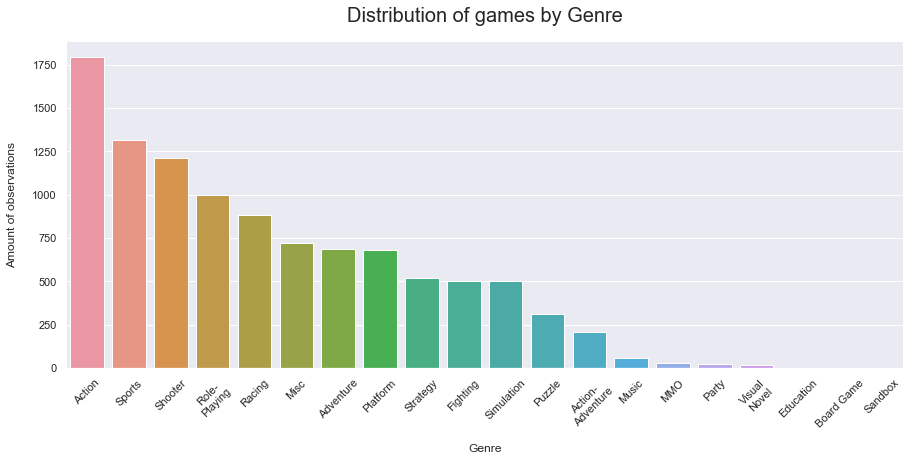

In [9]:
plt.figure(figsize=(15,6))

# plot
sns.countplot(x='genre', data=df, order = df['genre'].value_counts().index)

# data
x_axis = range(len(df.genre.unique()))
labels = list(df['genre'].value_counts().index)

# decorations
plt.title('Distribution of games by Genre', pad=20, size=20)
plt.xlabel('Genre', labelpad=15, size=12)
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.xticks(x_axis, [textwrap.fill(label, 10) for label in labels], rotation=45, ha='center')
sns.despine()

# save and show
plt.savefig('img/1.Countplot_Genres.png', transparent=True)
plt.show()

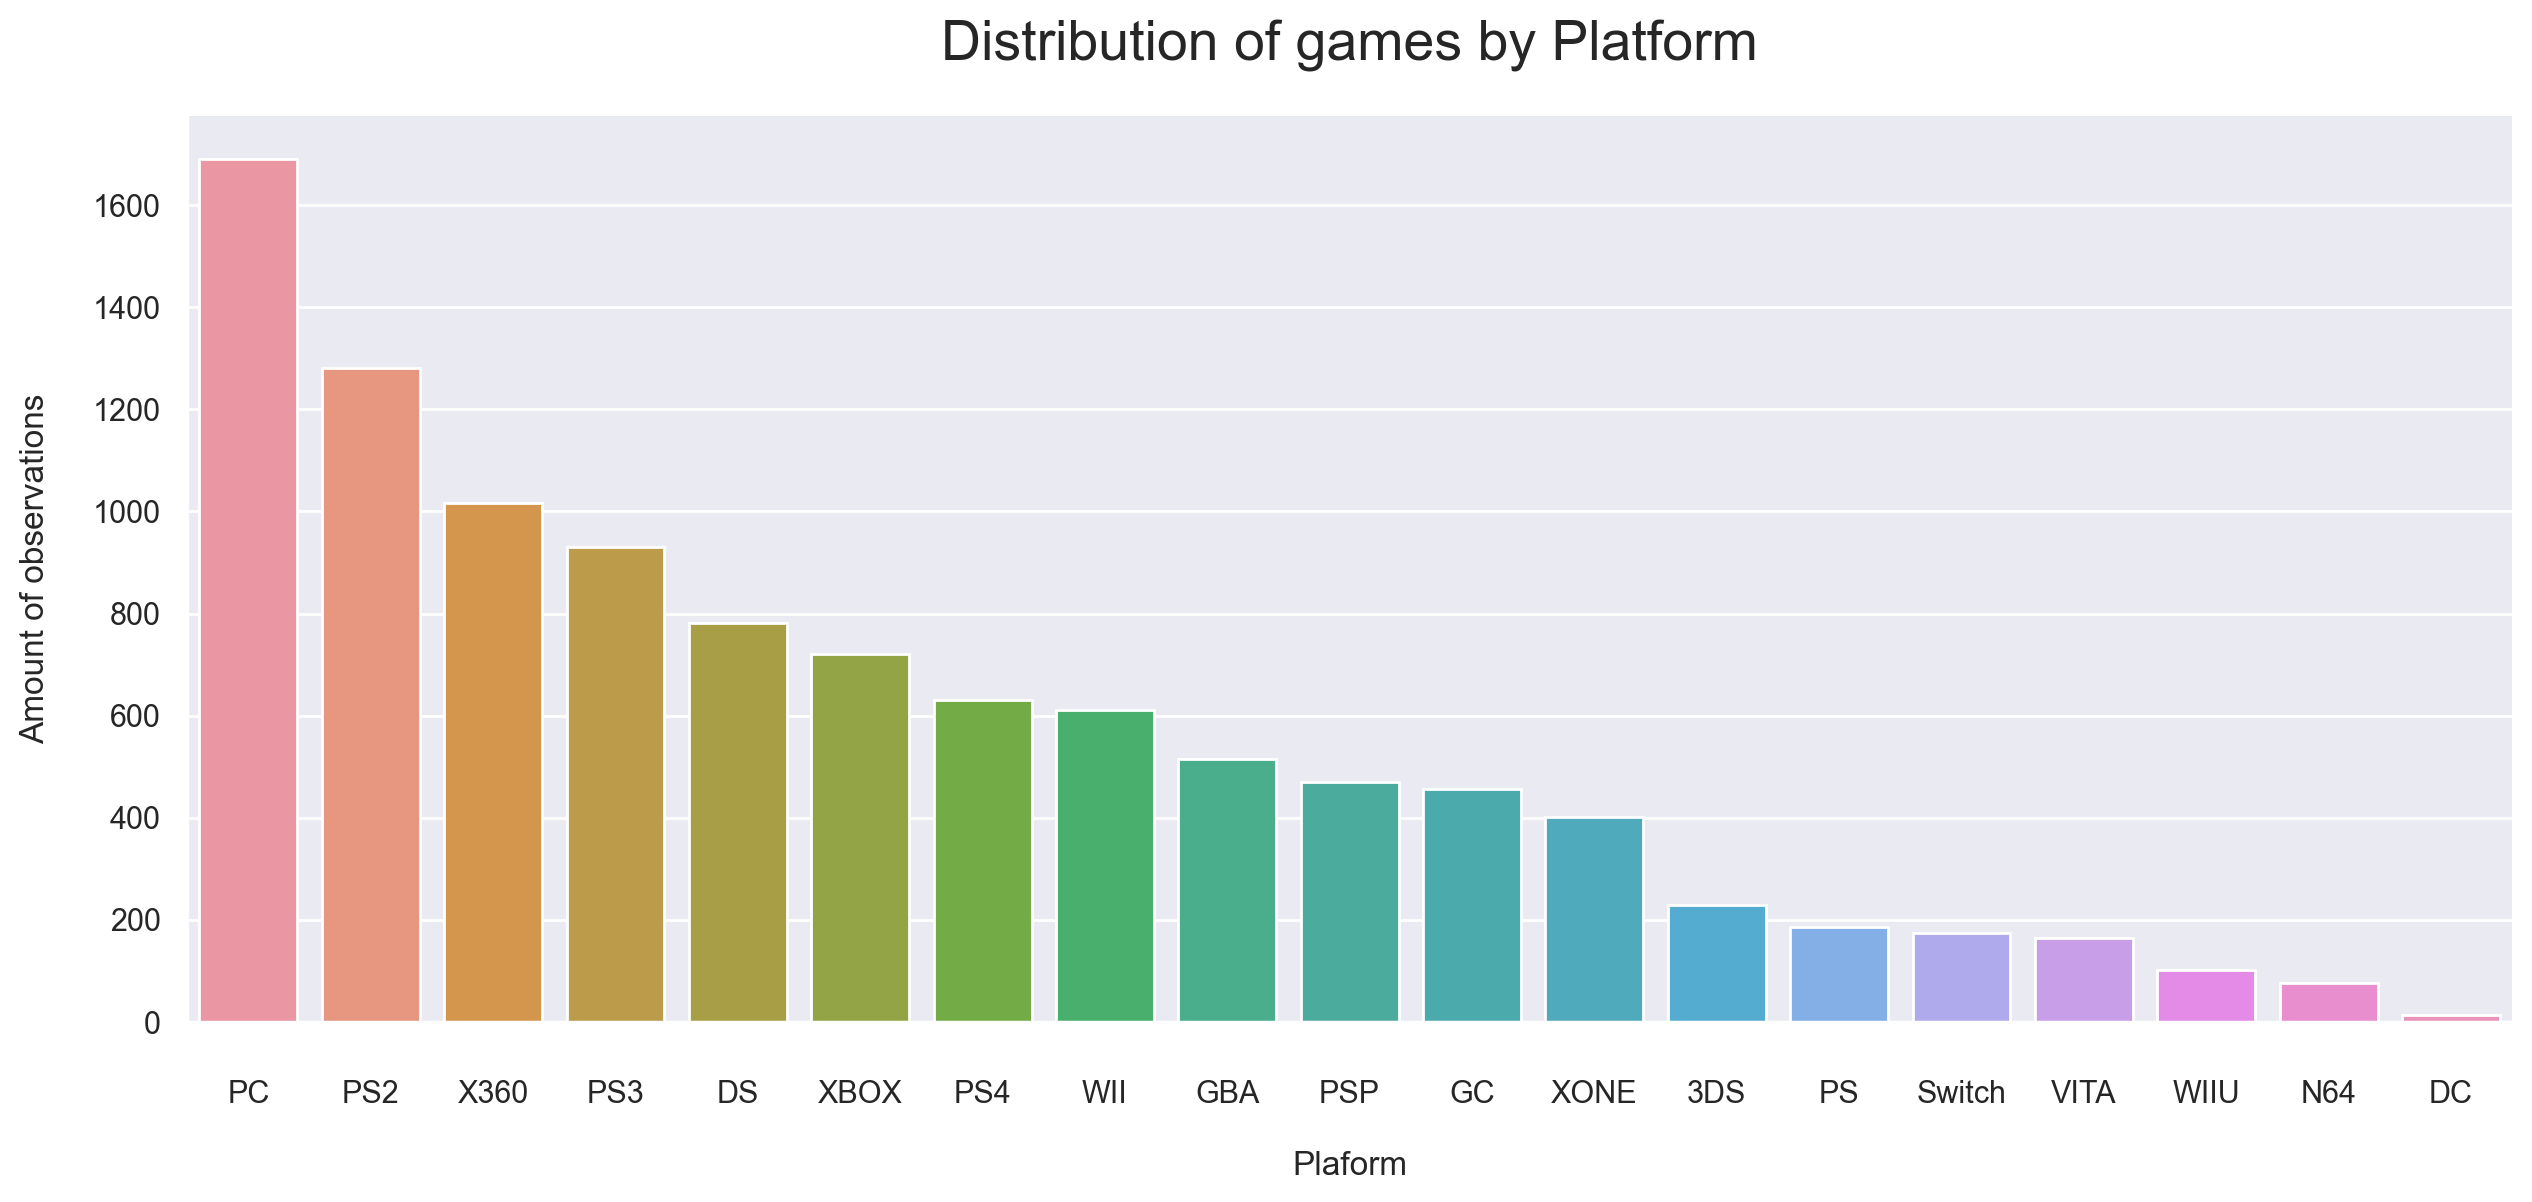

In [393]:
plt.figure(figsize=(15,6))

# plot
sns.countplot(x='platform', data=df, order=df['platform'].value_counts().index)

# decorations
plt.title('Distribution of games by Platform', pad=20, size=20)
plt.xlabel('Plaform', labelpad=15, size=12)
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
sns.despine()

# save and show
plt.savefig('img/2.Countplot_Plaforms.png',  transparent=True)
plt.show()

In [394]:
dream_num = len(df[df['parent_platform'] == 'Dreamcast'])

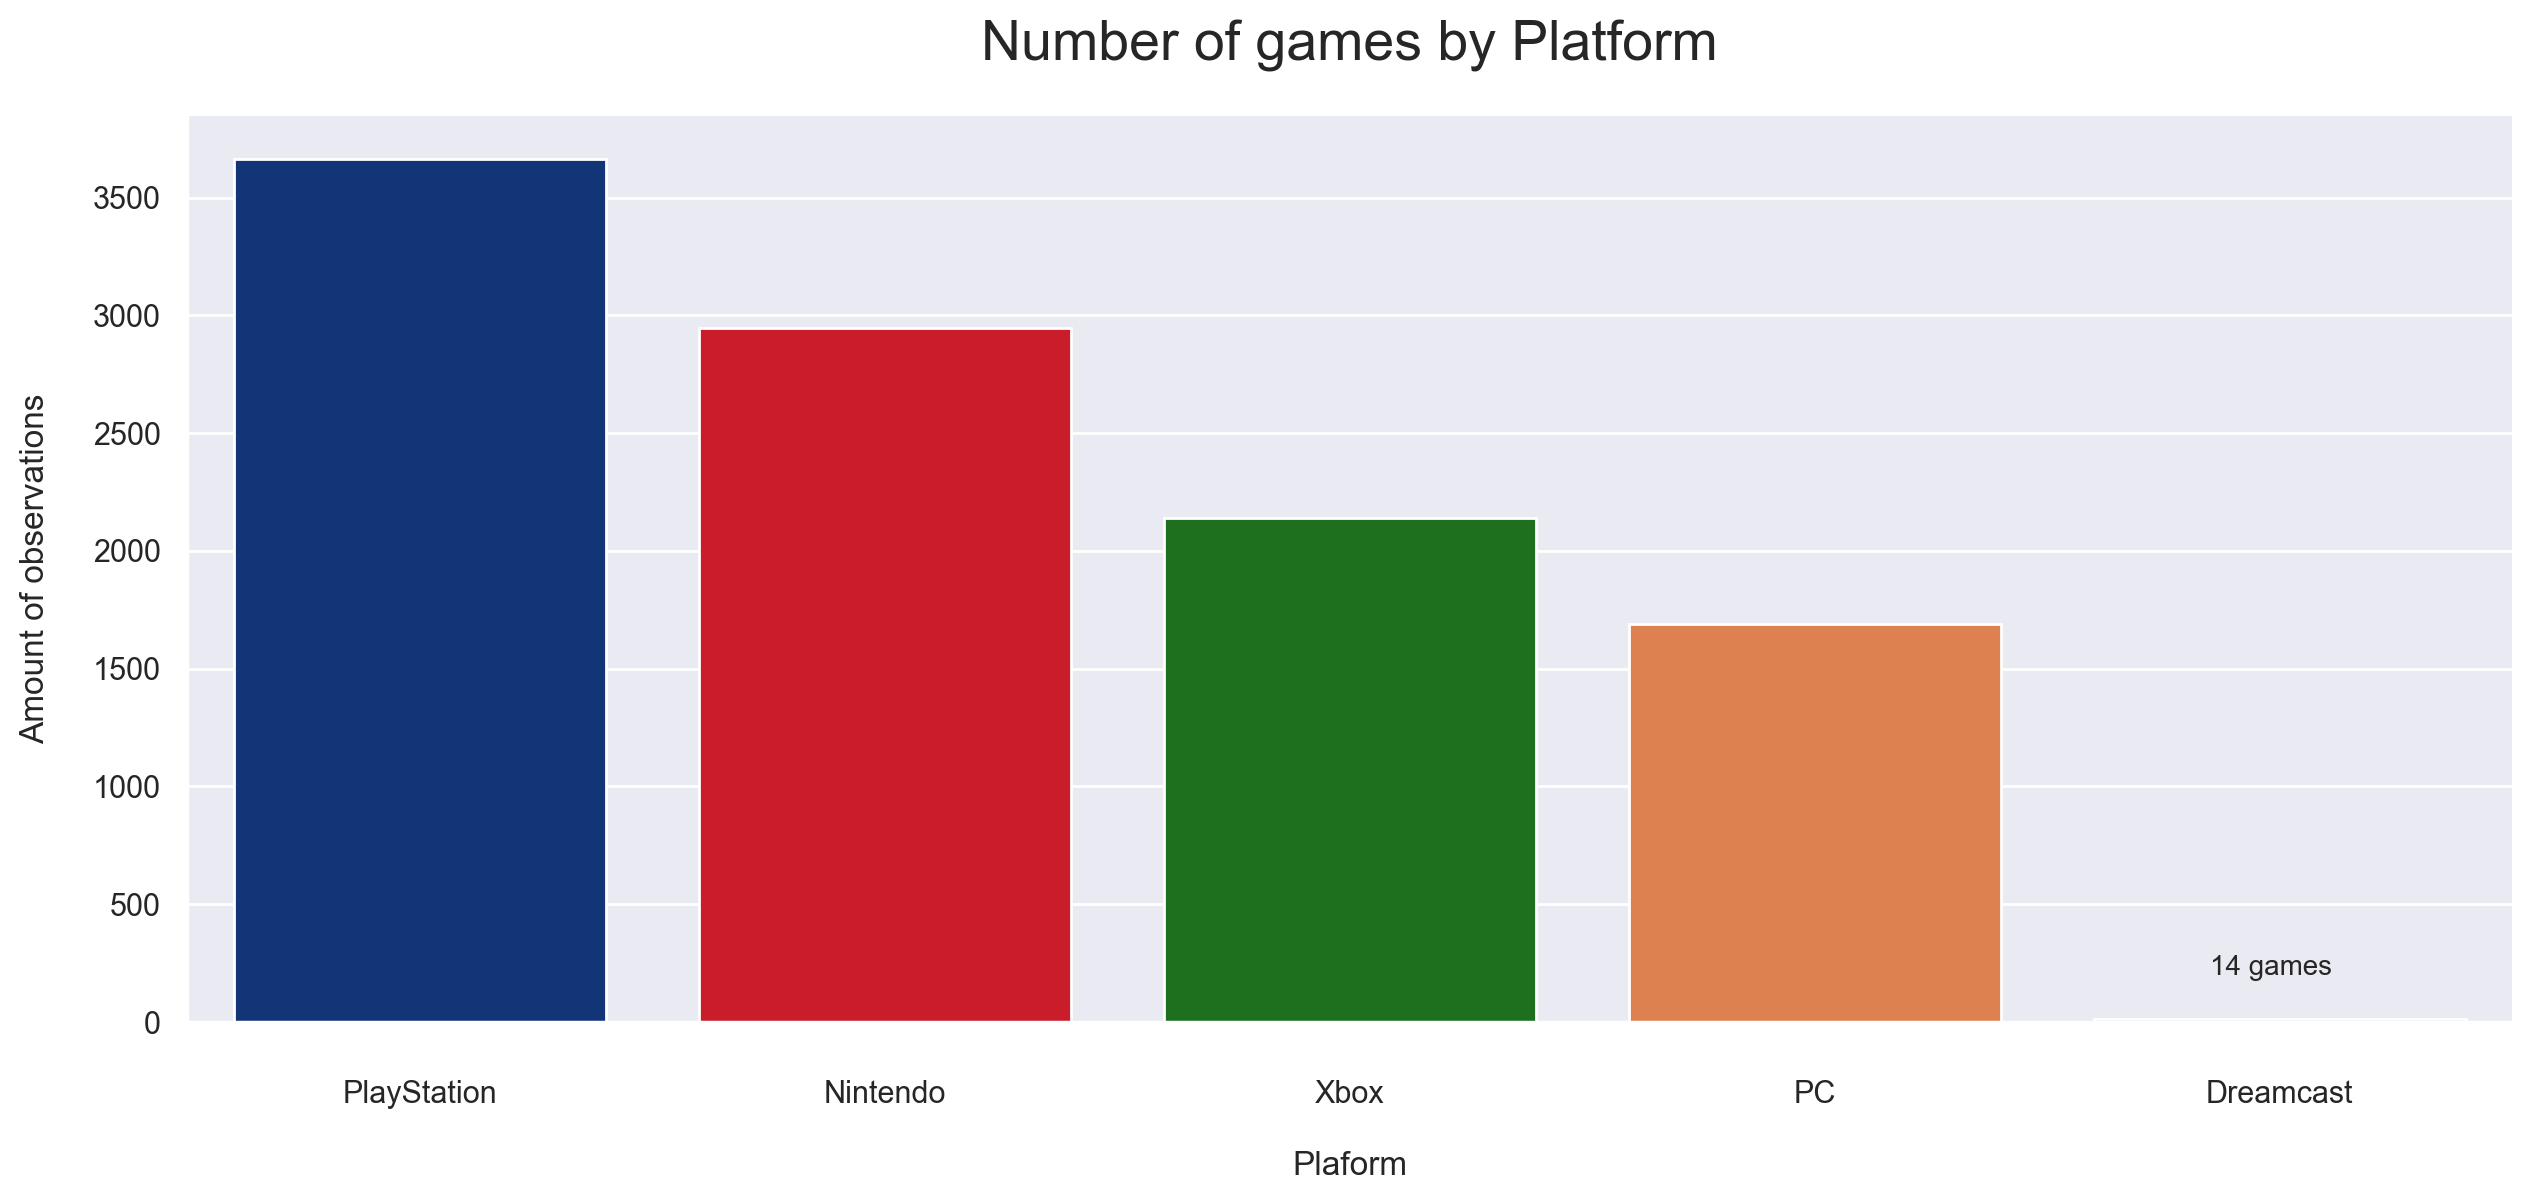

In [395]:
plt.figure(figsize=(15,6))

order = df['parent_platform'].value_counts().index
reordered_colors = {k: colors_platforms[k] for k in list(order)}

# plot
sns.countplot(x='parent_platform', data=df, order=order, palette=reordered_colors.values())

# decorations
plt.title('Number of games by Platform', pad=20, size=20)
plt.xlabel('Plaform', labelpad=15, size=12)
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.annotate(str(dream_num) + ' games', (3.85,200), fontsize=10)
sns.despine()

# save and show
plt.savefig('img/3.Countplot_parent_plaforms.png', transparent=True)
plt.show()

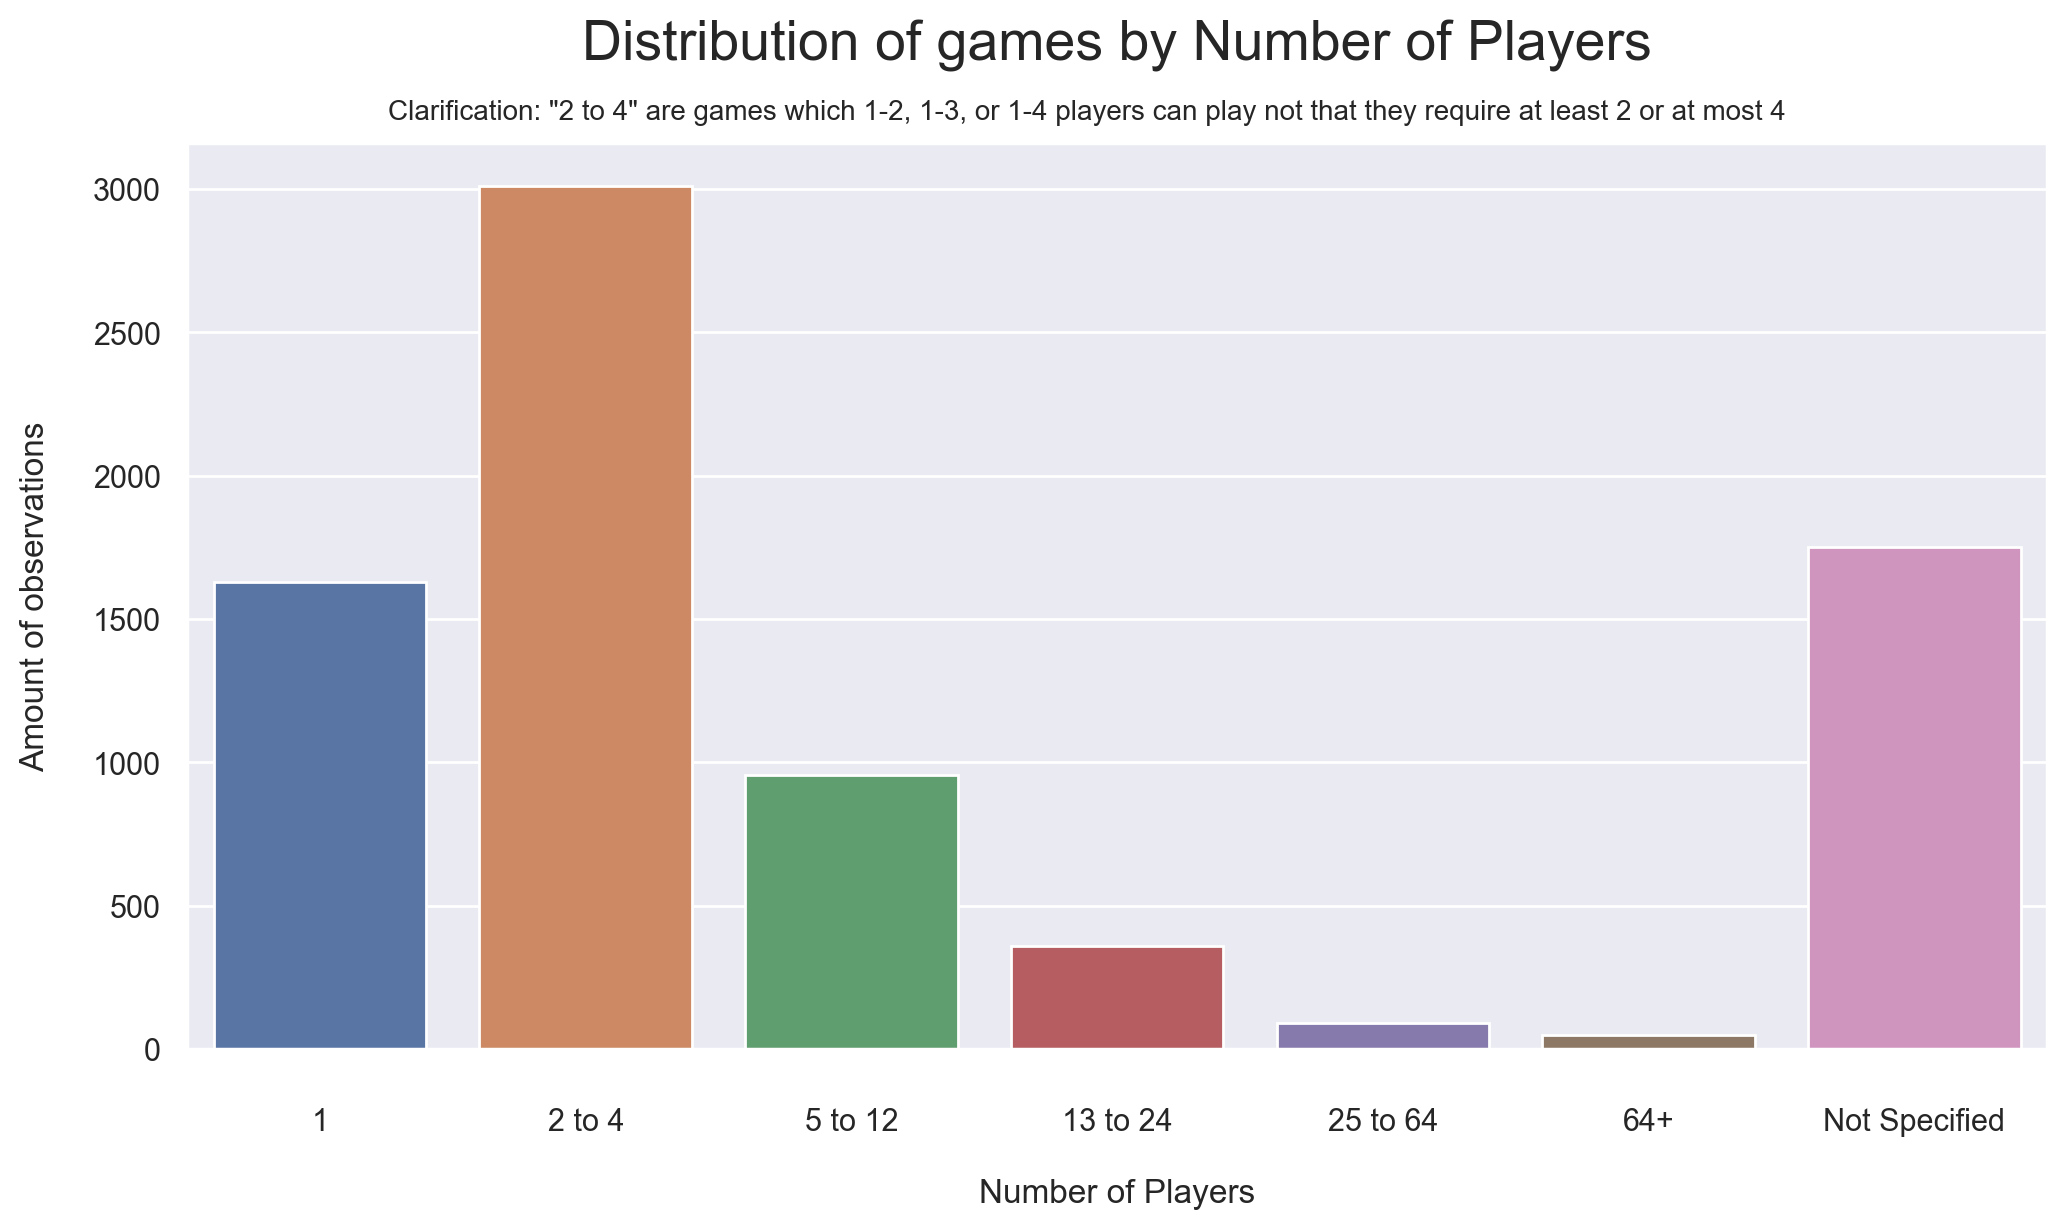

In [396]:
order = ['1', '2 to 4','5 to 12', '13 to 24', '25 to 64', '64+', 'Not Specified']

fig, ax = plt.subplots(figsize=(12,6))

# plot
ax = sns.countplot(x='players_category', data=df, order=order)

# decorations
plt.title('Distribution of games by Number of Players', pad=30, size=20)
plt.figtext(.5,.90,'Clarification: "2 to 4" are games which 1-2, 1-3, or 1-4 players can play not that they require at least 2 or at most 4',fontsize=10,ha='center')
plt.xlabel('Number of Players', labelpad=15, size=12)
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)

# save and show
plt.savefig('img/4.Countplot_Num_Players.png',  transparent=True)
plt.show()

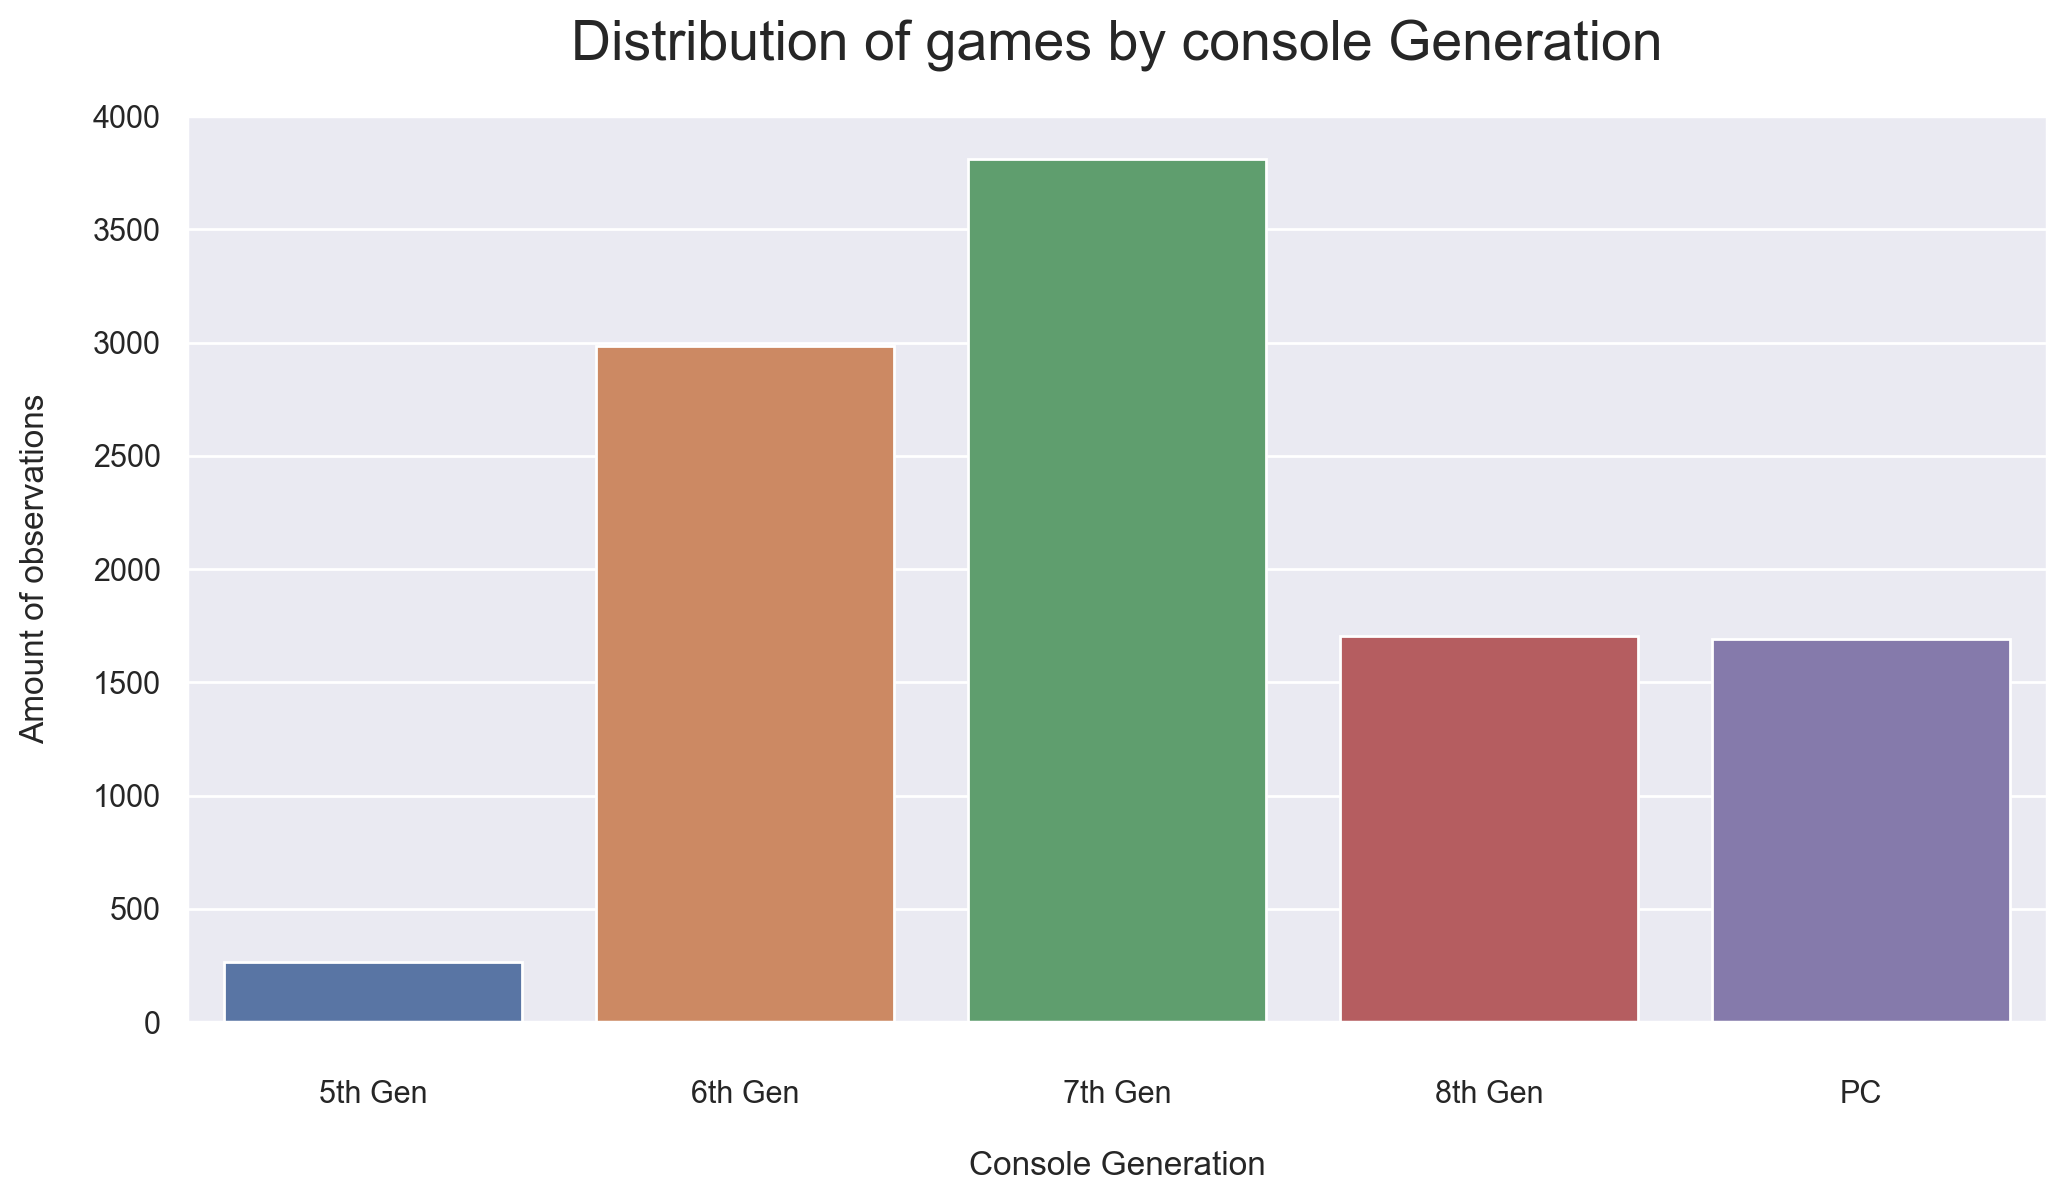

In [397]:
order = ['5th Gen', '6th Gen','7th Gen', '8th Gen', 'PC']

sns.set()

fig, ax = plt.subplots(figsize=(12,6))

# plot
ax = sns.countplot(x='generation', data=df, order=order)

# decorations
plt.title('Distribution of games by console Generation', pad=20, size=20)
plt.xlabel('Console Generation', labelpad=15, size=12)
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)

# save and show
plt.savefig('img/5.Countplot_Generation.png', transparent=True)
plt.show()

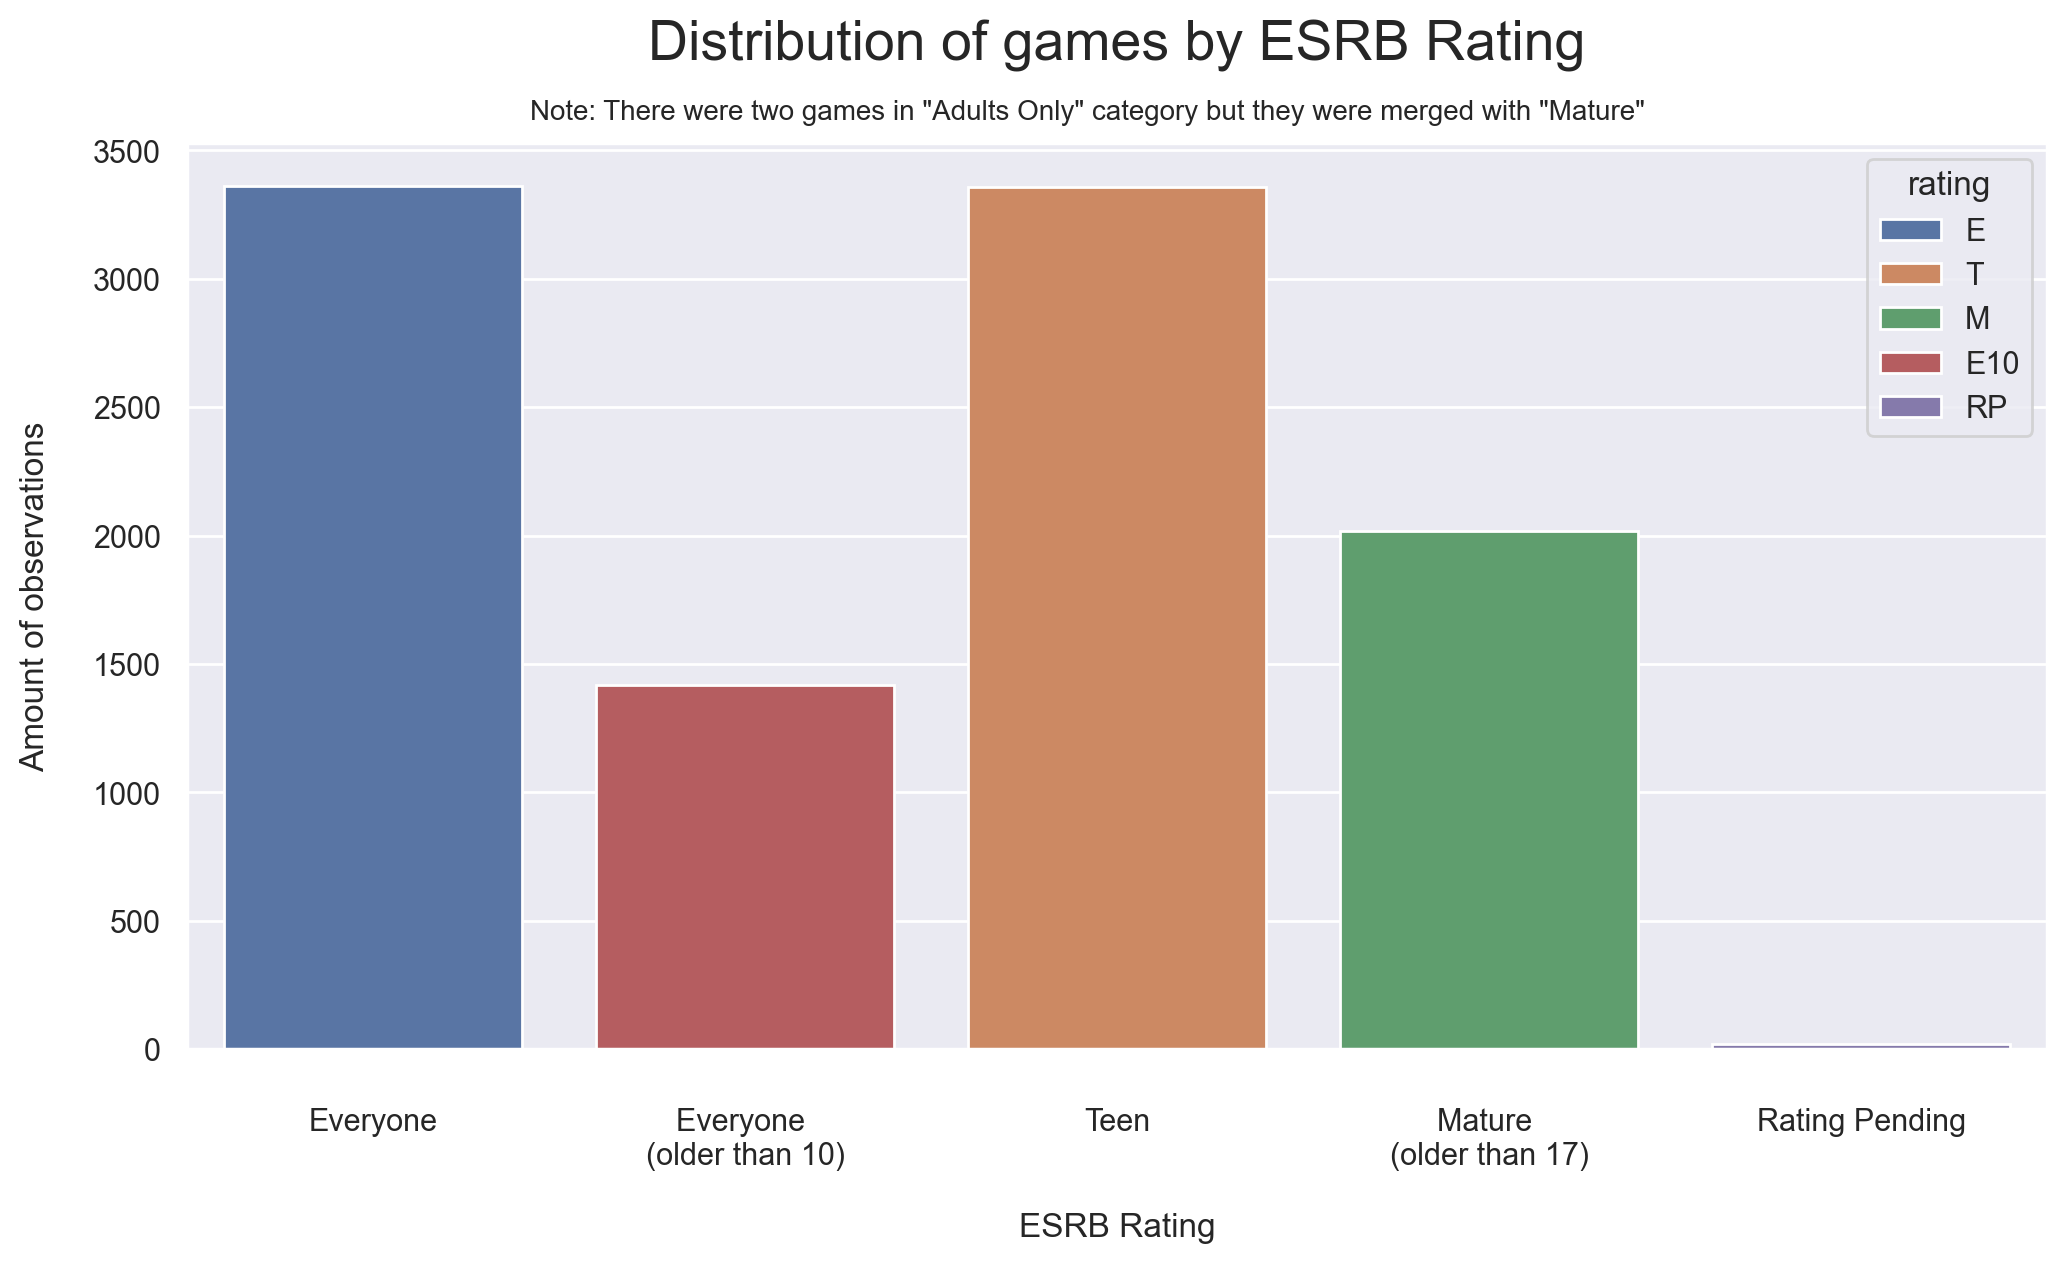

In [398]:
fig, ax = plt.subplots(figsize=(12,6))

order = ['E','E10','T','M','RP']

# plot
ax = sns.countplot(x='rating', data=df, hue='rating', order=order, dodge=False)

# decorations
plt.title('Distribution of games by ESRB Rating', pad=30, size=20)
plt.figtext(.5,.90,'Note: There were two games in "Adults Only" category but they were merged with "Mature"',fontsize=10,ha='center')
plt.xlabel('ESRB Rating', labelpad=15, size=12)
ax.set_xticklabels(labels = ['Everyone', 'Everyone \n(older than 10)', 'Teen', 'Mature \n(older than 17)','Rating Pending'])
plt.ylabel('Amount of observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)

# legend
#h,l = ax.get_legend_handles_labels()
#labels = ['E - Everyone', 'T - Teen', 'M - Mature (older than 17)', 'E10 - Everyone (older than 10)','RP - Rating Pending']
#ax.legend(h,labels, loc="upper right") 
#sns.despine()


# save and show
plt.savefig('img/6.Countplot_ESRB_Rating.png',  transparent=True)
plt.show()

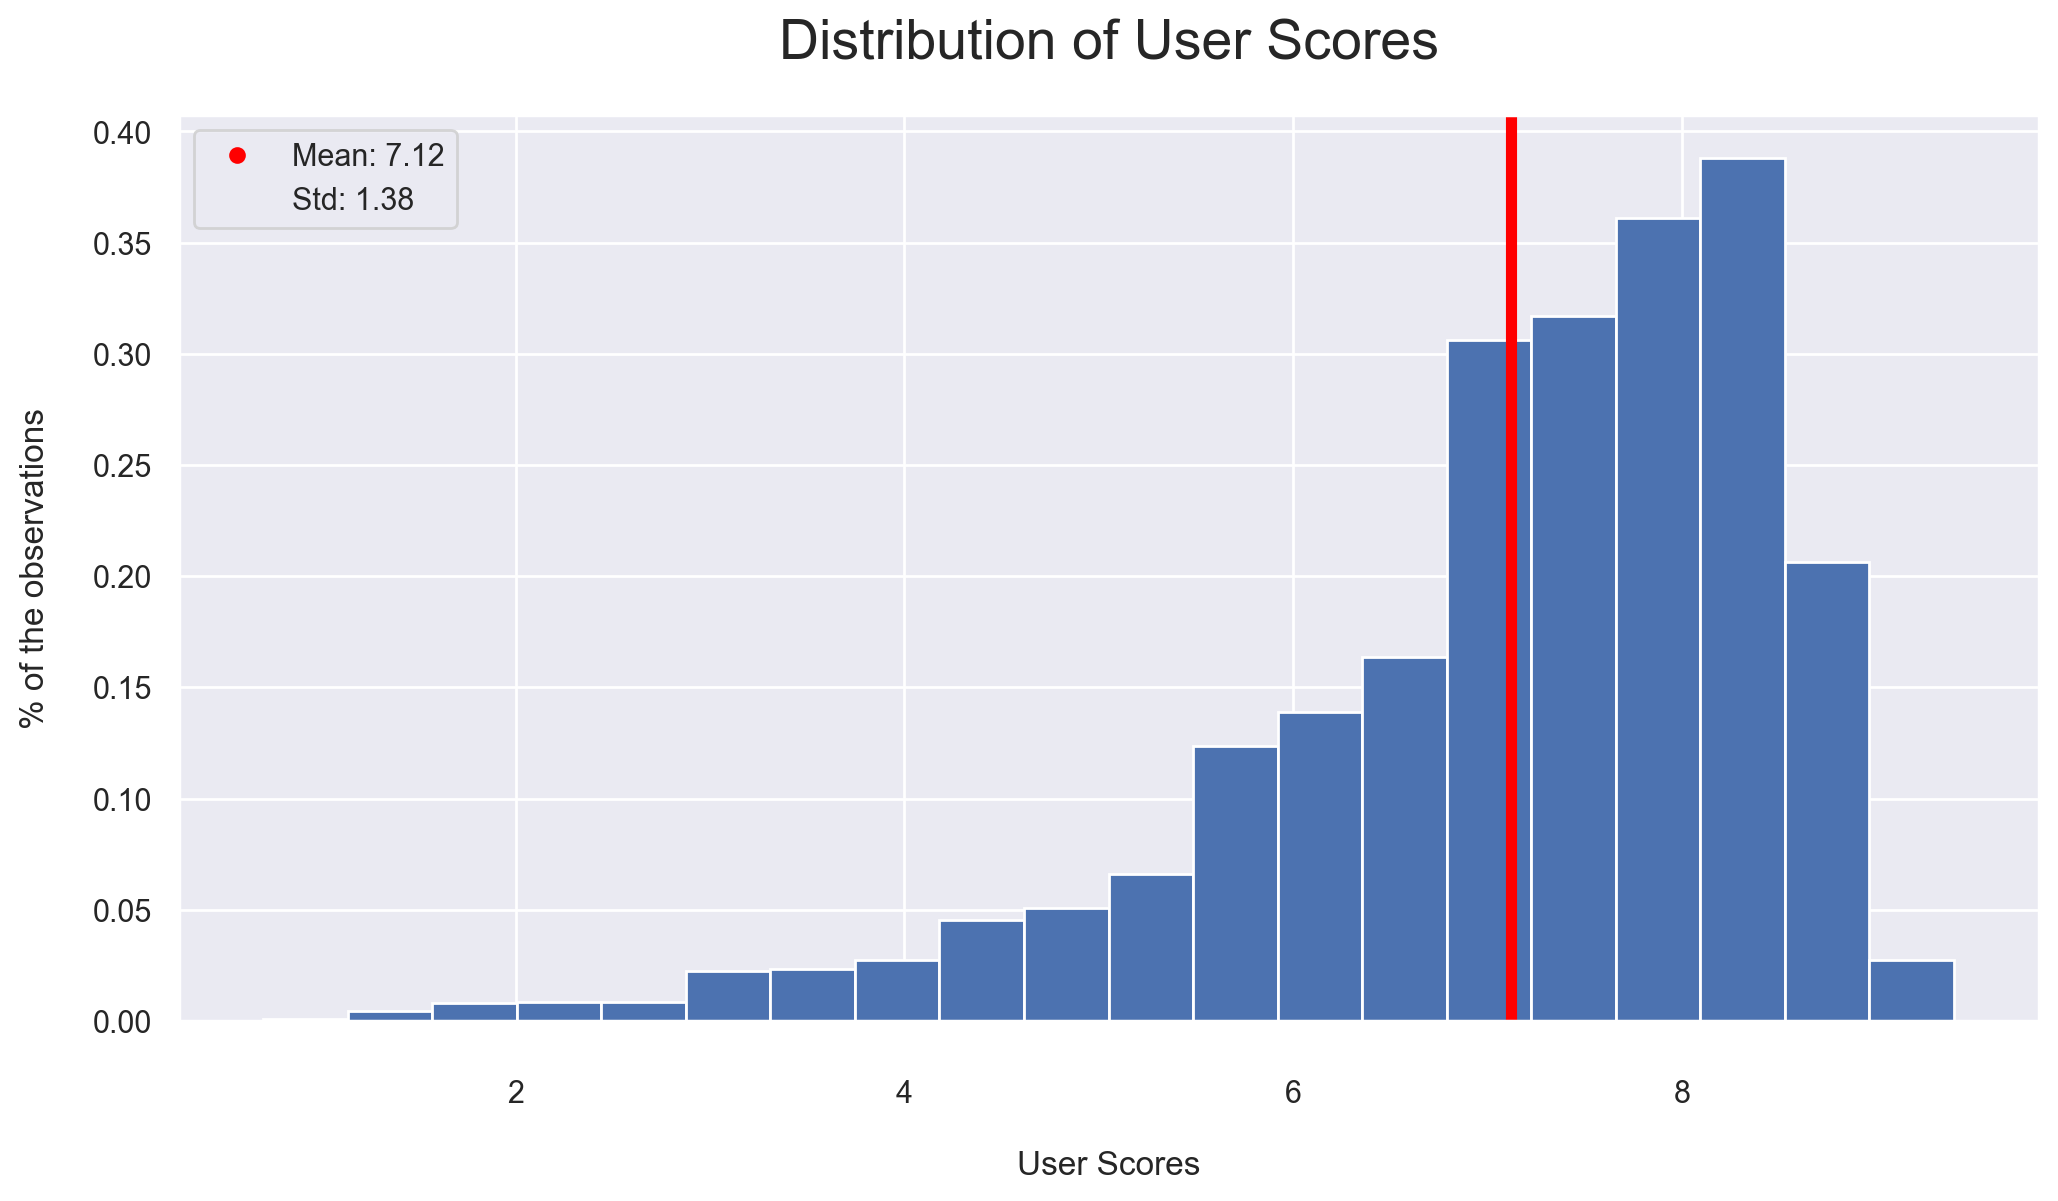

In [399]:
fig, ax = plt.subplots(figsize=(12,6))

# plot
ax = plt.hist(x=df['user_score'] , bins=20, density=True)

# decorations
plt.title('Distribution of User Scores', pad=20, size=20)
plt.xlabel('User Scores', labelpad=15, size=12)
plt.ylabel('% of the observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)

# Mean
mean = round(np.mean(df['user_score']),2)
std = round(np.std(df['user_score']),2)
plt.axvline(mean, c='red',linewidth=4 )

# Legend
mean_users = matplotlib.lines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Mean: {}'.format(mean))
std_users = matplotlib.lines.Line2D([], [], color='red', marker='', linestyle='None', markersize=5, label='Std: {}'.format(std))
plt.legend(handles=[mean_users, std_users], loc='best')

# save and show
plt.savefig('img/8.Hist_User_Scores.png',  transparent=True)
plt.show()

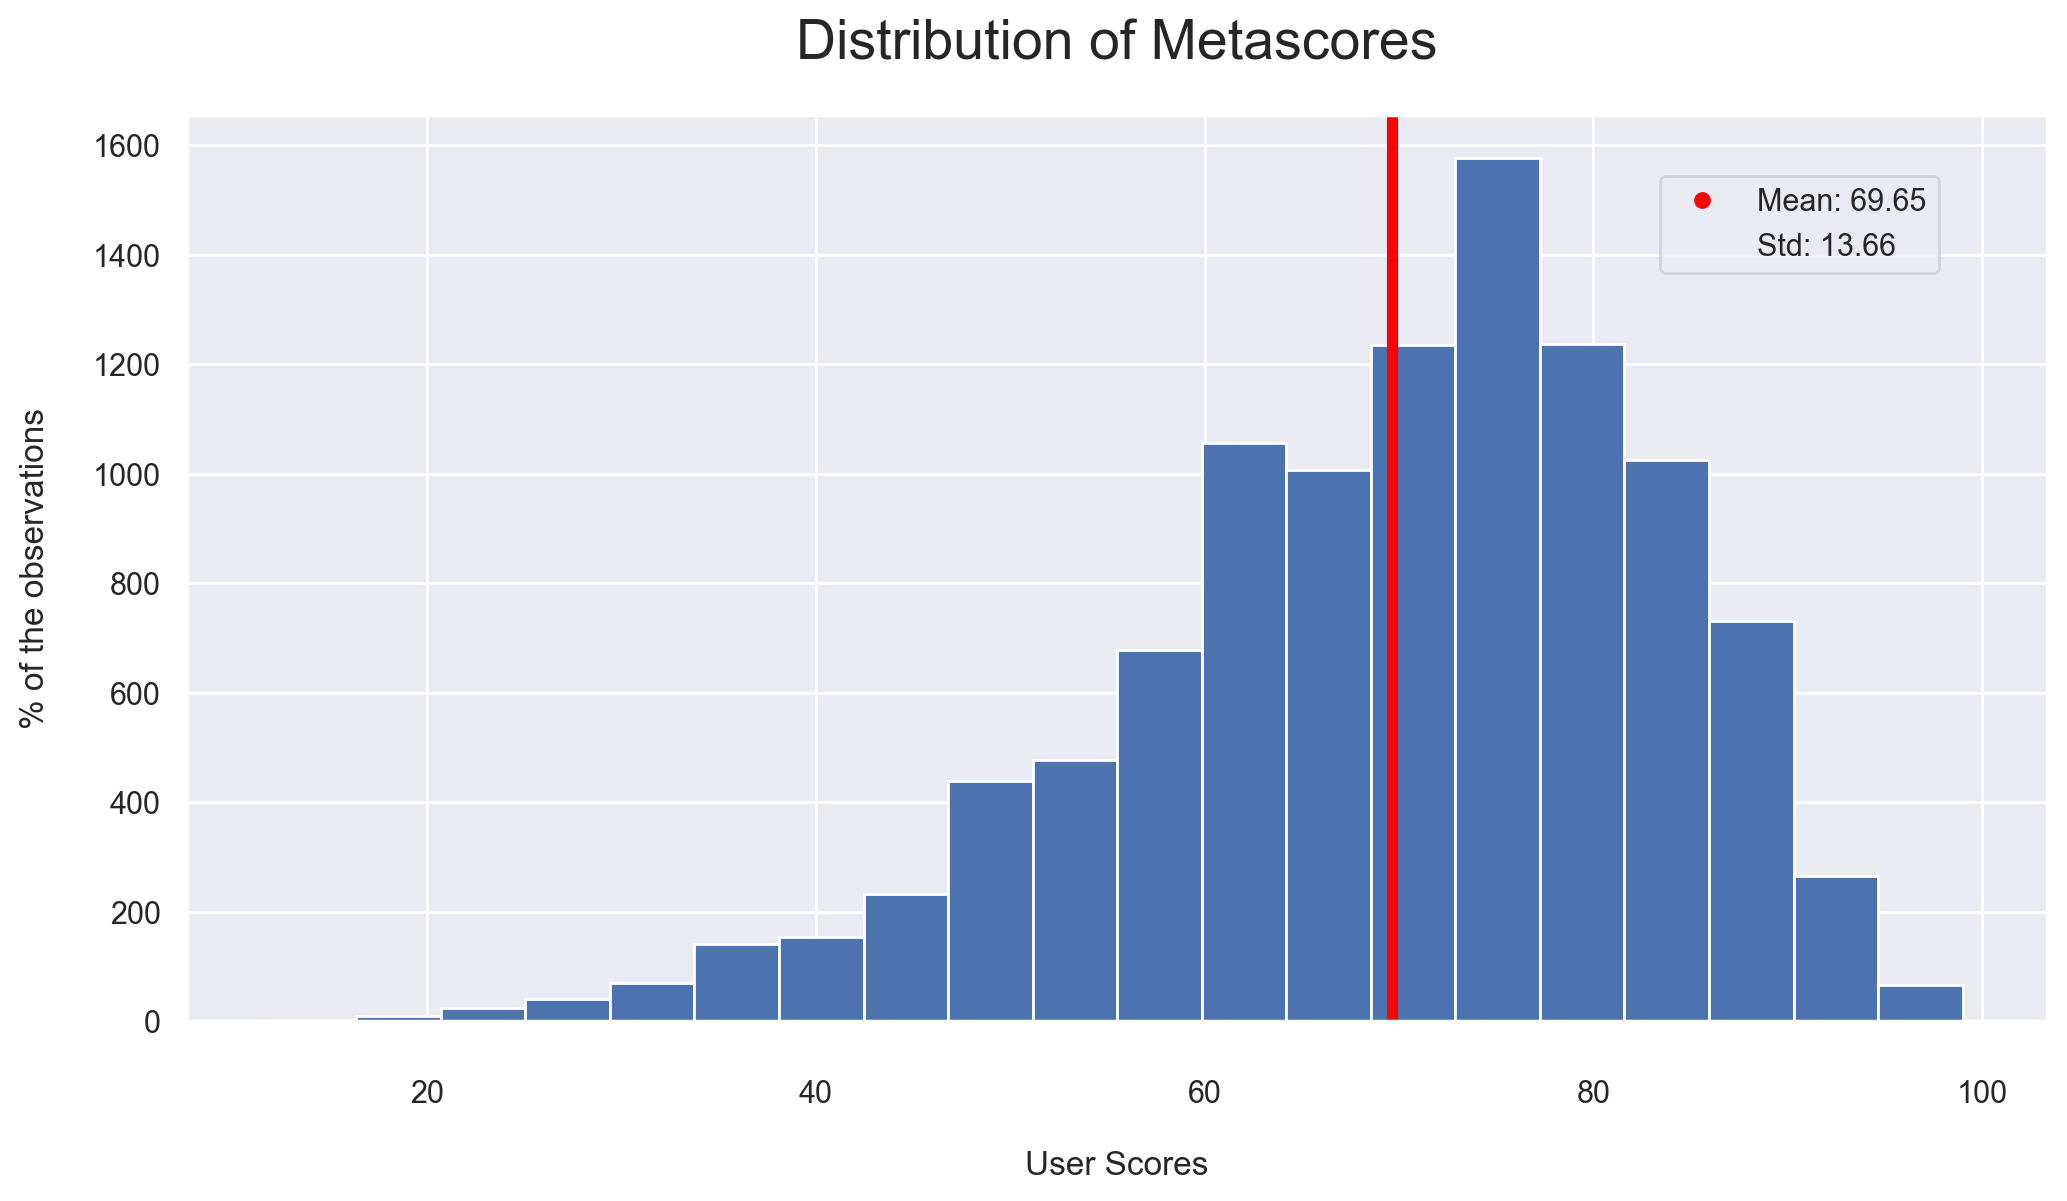

In [400]:
fig, ax = plt.subplots(figsize=(12,6))

# plot
ax = plt.hist(x=df['metascore'] , bins=20)

# decorations
plt.title('Distribution of Metascores', pad=20, size=20)
plt.xlabel('User Scores', labelpad=15, size=12)
plt.ylabel('% of the observations', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)

# Mean
mean = np.mean(df['metascore'])
std = np.std(df['metascore'])
plt.axvline(mean, c='red',linewidth=4 )

# Legend
mean_legend = matplotlib.lines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=5, label='Mean: {}'.format(round(mean,2)))
std_legend = matplotlib.lines.Line2D([], [], color='red', marker='', linestyle='None', markersize=5, label='Std: {}'.format(round(std,2)))
plt.legend(handles=[mean_legend, std_legend], loc='best', bbox_to_anchor=(0.45, 0.45, 0.5, 0.5))

# save and show
plt.savefig('img/9.Hist_Meta_Scores.png', transparent=True)
plt.show()

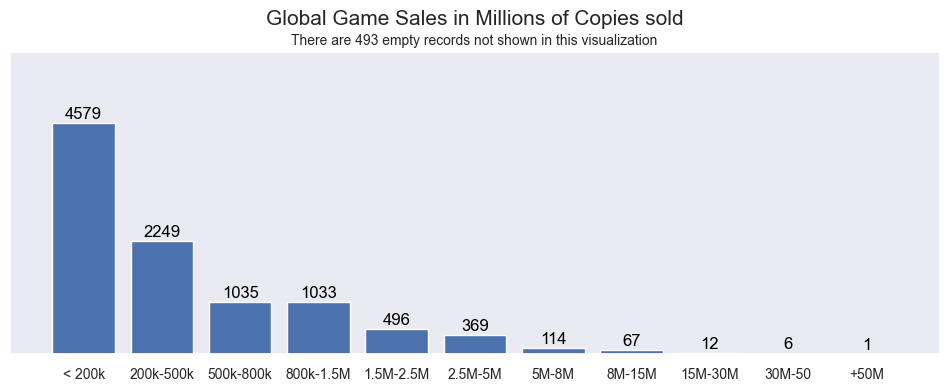

In [401]:
bins = [0,0.2,0.5,0.8,1.5,2.5,5,8,15,30,50,85]
labels = ['< 200k','200k-500k','500k-800k','800k-1.5M','1.5M-2.5M','2.5M-5M','5M-8M','8M-15M','15M-30M','30M-50','+50M']

x = df[df['global_sales'] > 0]['global_sales']
result = pd.cut(x, bins=bins, labels=labels)
y = list(result.value_counts())
zeroes = len(df[(df['global_sales'] == 0) | (df['global_sales'].isna())])

plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':100})

# histogram on linear scale
fig, ax = plt.subplots(frameon=False)

ax.bar(x=labels, height=y)

ax.set_yticklabels([])
ax.grid()
plt.title('Global Game Sales in Millions of Copies sold', size=15, pad=20)
plt.figtext(.512,.90,'There are {} empty records not shown in this visualization'.format(zeroes),fontsize=10,ha='center')
plt.ylim(0,6000)
plt.xticks(size=10)

for i, v in enumerate(y):
    ax.text(x=i, y=(v+100), s=str(v), color='black', ha='center')

plt.savefig('img/10.Global_Game_Sales.png', transparent=True)
plt.show()

<a id=corr></a>

### Correlations

In [402]:
df = pd.read_csv('data/final_data.csv')

In [403]:
# I change the metascore to a factor of 10 to make it easier to understand the visualizations
df['metascore'] = df['metascore'] / 10

In [404]:
# data for scatterplot below
scatter = df[df['user_score'].notna()]

# correlations and p_values
correlation = round(stats.spearmanr(a=scatter['metascore'], b=scatter['user_score'])[0],2)
p_value = round(stats.spearmanr(a=scatter['metascore'], b=scatter['user_score'])[1],5)


# text for outliers
for_text = scatter[['metascore', 'user_score', 'name']]
for_text = for_text[(for_text['metascore'] > 7) & (for_text['user_score'] < 2) | 
                    (for_text['metascore'] <= 4) & (for_text['user_score'] > 7.9)]

for_text['name'] = [textwrap.fill(label, 11) for label in list(for_text['name'])]

In [405]:
for_text

metascore  user_score                                    name
81          8.3         1.7                                 FIFA 19
397         8.0         1.7                                NBA 2K18
794         8.5         1.5                                NBA 2K18
3073        8.7         1.6                                NBA 2K18
4074        7.8         1.5         Kinectimals\n: Now with\nBears!
4075        7.8         1.5         Kinectimals\n: Now with\nBears!
4452        2.7         8.6             Shrek Swamp\nKart\nSpeedway
6887        3.9         8.1  Airborne\nTroops:\nCountdown\nto D-Day
9113        3.5         8.0                  Street Jam\nBasketball
9593        3.5         8.7                   Antz\nExtreme\nRacing

In [406]:
scatter['class'] = scatter.parent_platform.map({'PlayStation':1,'Xbox':2,'Nintendo':3,'PC':4,'Dreamcast':5})

In [407]:
scatter.sort_values(by='user_score', ascending=False).head(1)

Unnamed: 0                      name         genre parent_platform  \
175         175  The Witcher 3: Wild Hunt  Role-Playing              PC   

    platform                               publisher              developer  \
175       PC  Warner Bros. Interactive Entertainment  CD Projekt Red Studio   

    release_date rating  global_sales  ...  critic_neutral  critic_negative  \
175   2015-05-18      M          0.67  ...               0                0   

     metascore  num_critic_reviews user_positive user_neutral user_negative  \
175        9.3                  32          1377           90            78   

    user_score  num_users_reviews  class  
175        9.4               1545      4  

[1 rows x 29 columns]

In [408]:
scatter = scatter.sort_values(by='class')

correlations = []
p_values = []
for platform in scatter.parent_platform.unique():
    corr = round(stats.spearmanr(a=scatter[scatter['parent_platform'] == platform]['metascore'], b=scatter[scatter['parent_platform'] == platform]['user_score'])[0],2)
    p = round(stats.spearmanr(a=scatter[scatter['parent_platform'] == platform]['metascore'], b=scatter[scatter['parent_platform'] == platform]['user_score'])[1],5)
    correlations.append(corr)
    p_values.append(p)

In [409]:
labels= [plat + ': R = ' + str(c)+ ', p = ' + str(p) for plat, c, p in zip(list(scatter.parent_platform.unique()), correlations, p_values)]

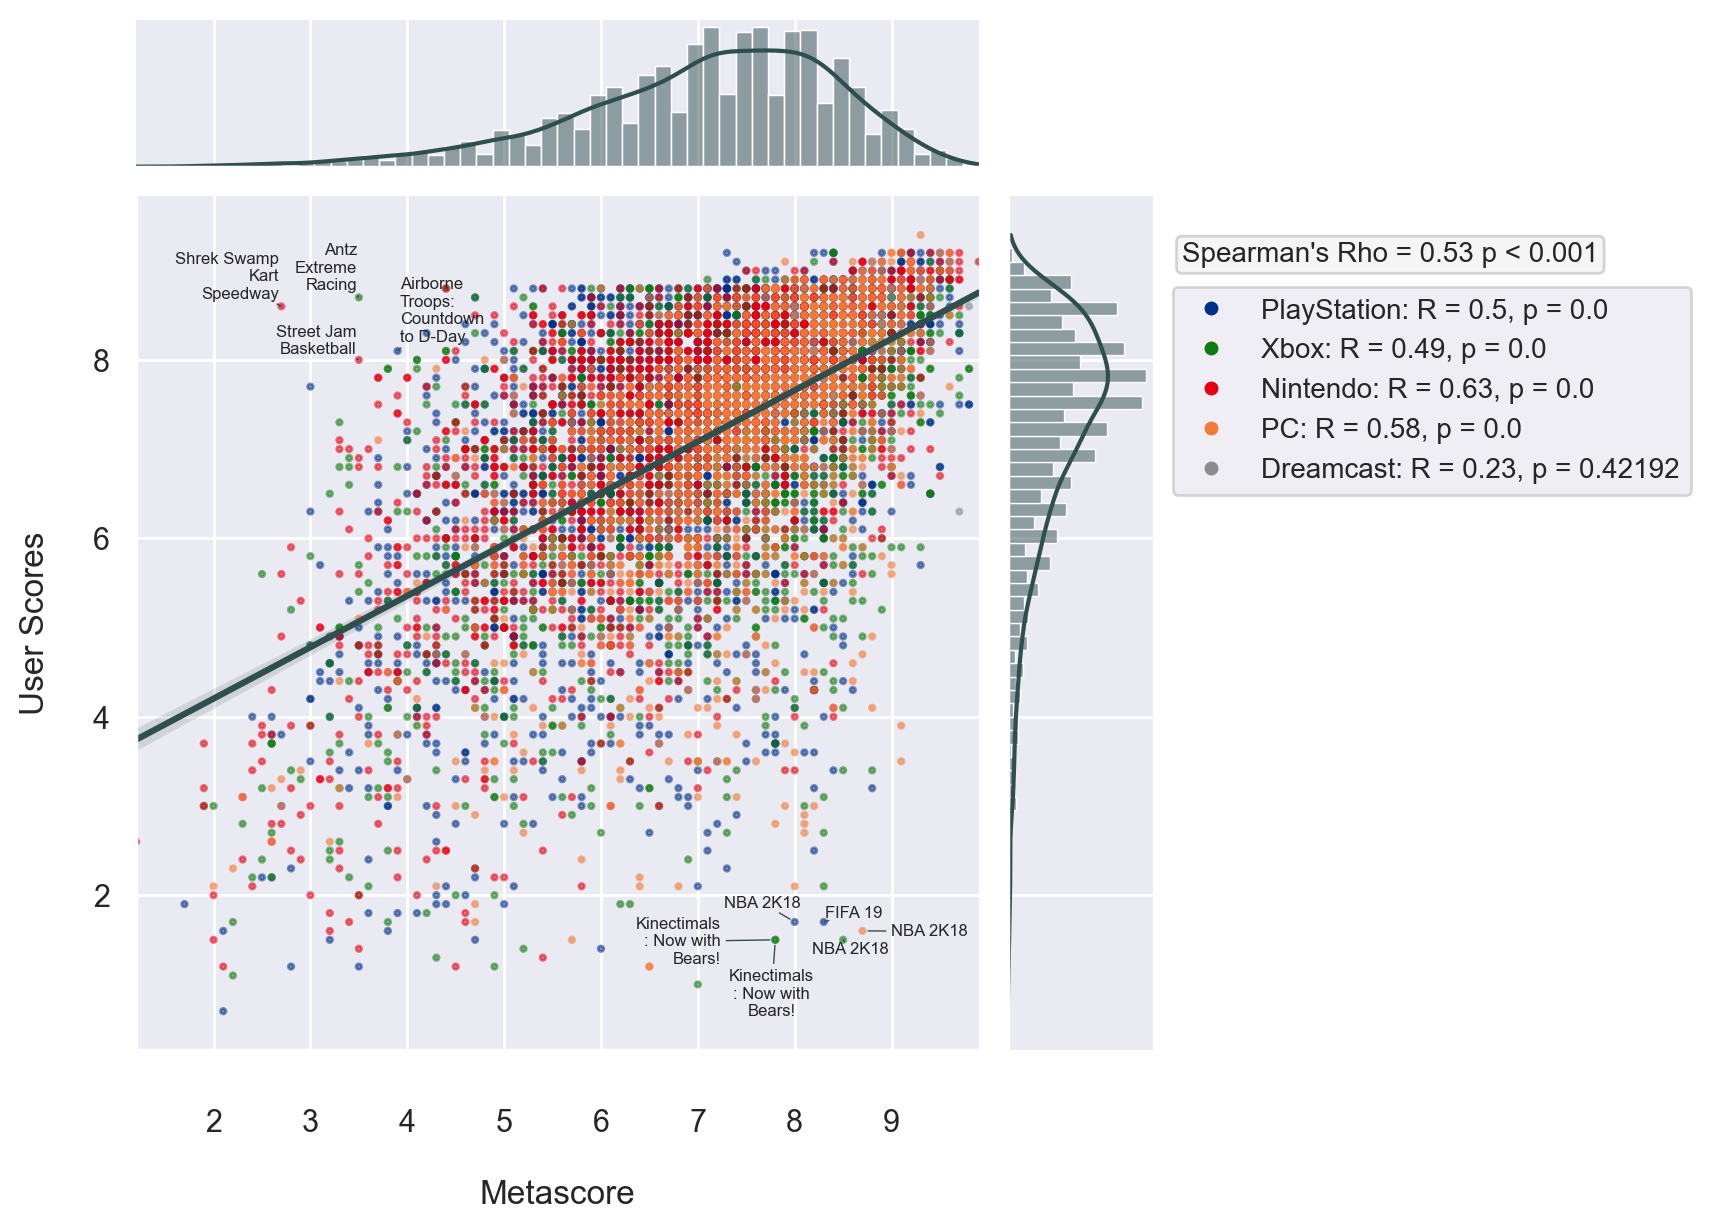

In [421]:
plt.rcParams.update({'figure.figsize':(20,12), 'figure.dpi':200})

colors = list(colors_platforms.values())
colors_rgba = list(colors_platforms_rgba.values())

g = sns.jointplot(x='metascore', y='user_score', data=scatter, color='darkslategray', kind='reg',scatter=False ) # scatter_kws={'s': 2}
g.ax_joint.scatter(x='metascore', y='user_score', c='class', cmap=matplotlib.colors.ListedColormap(colors), data=scatter, s=4, alpha=0.5)

# decorations
plt.xlabel('Metascore', labelpad=15, size=12)
plt.ylabel('User Scores', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.text(12.0002, 9.1, 'Spearman\'s Rho = {} p < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke'))

texts = []
for x, y, l in zip(for_text['metascore'], for_text['user_score'], for_text['name']):
    texts.append(plt.text(x, y, l, size=6))

plt.title('' + str(adjust_text(texts,arrowprops=dict(arrowstyle="-", color='darkslategray', lw=0.5))),pad=15, )


h = [plt.plot([],[], color=i, marker="o", ms=4, ls="")[0] for i in colors_rgba]
plt.legend(handles=h, labels=labels,loc=(1.23,0.65), title="", fontsize=10)

plt.savefig('img/10.Corr_metascore_user_score_no_title.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()

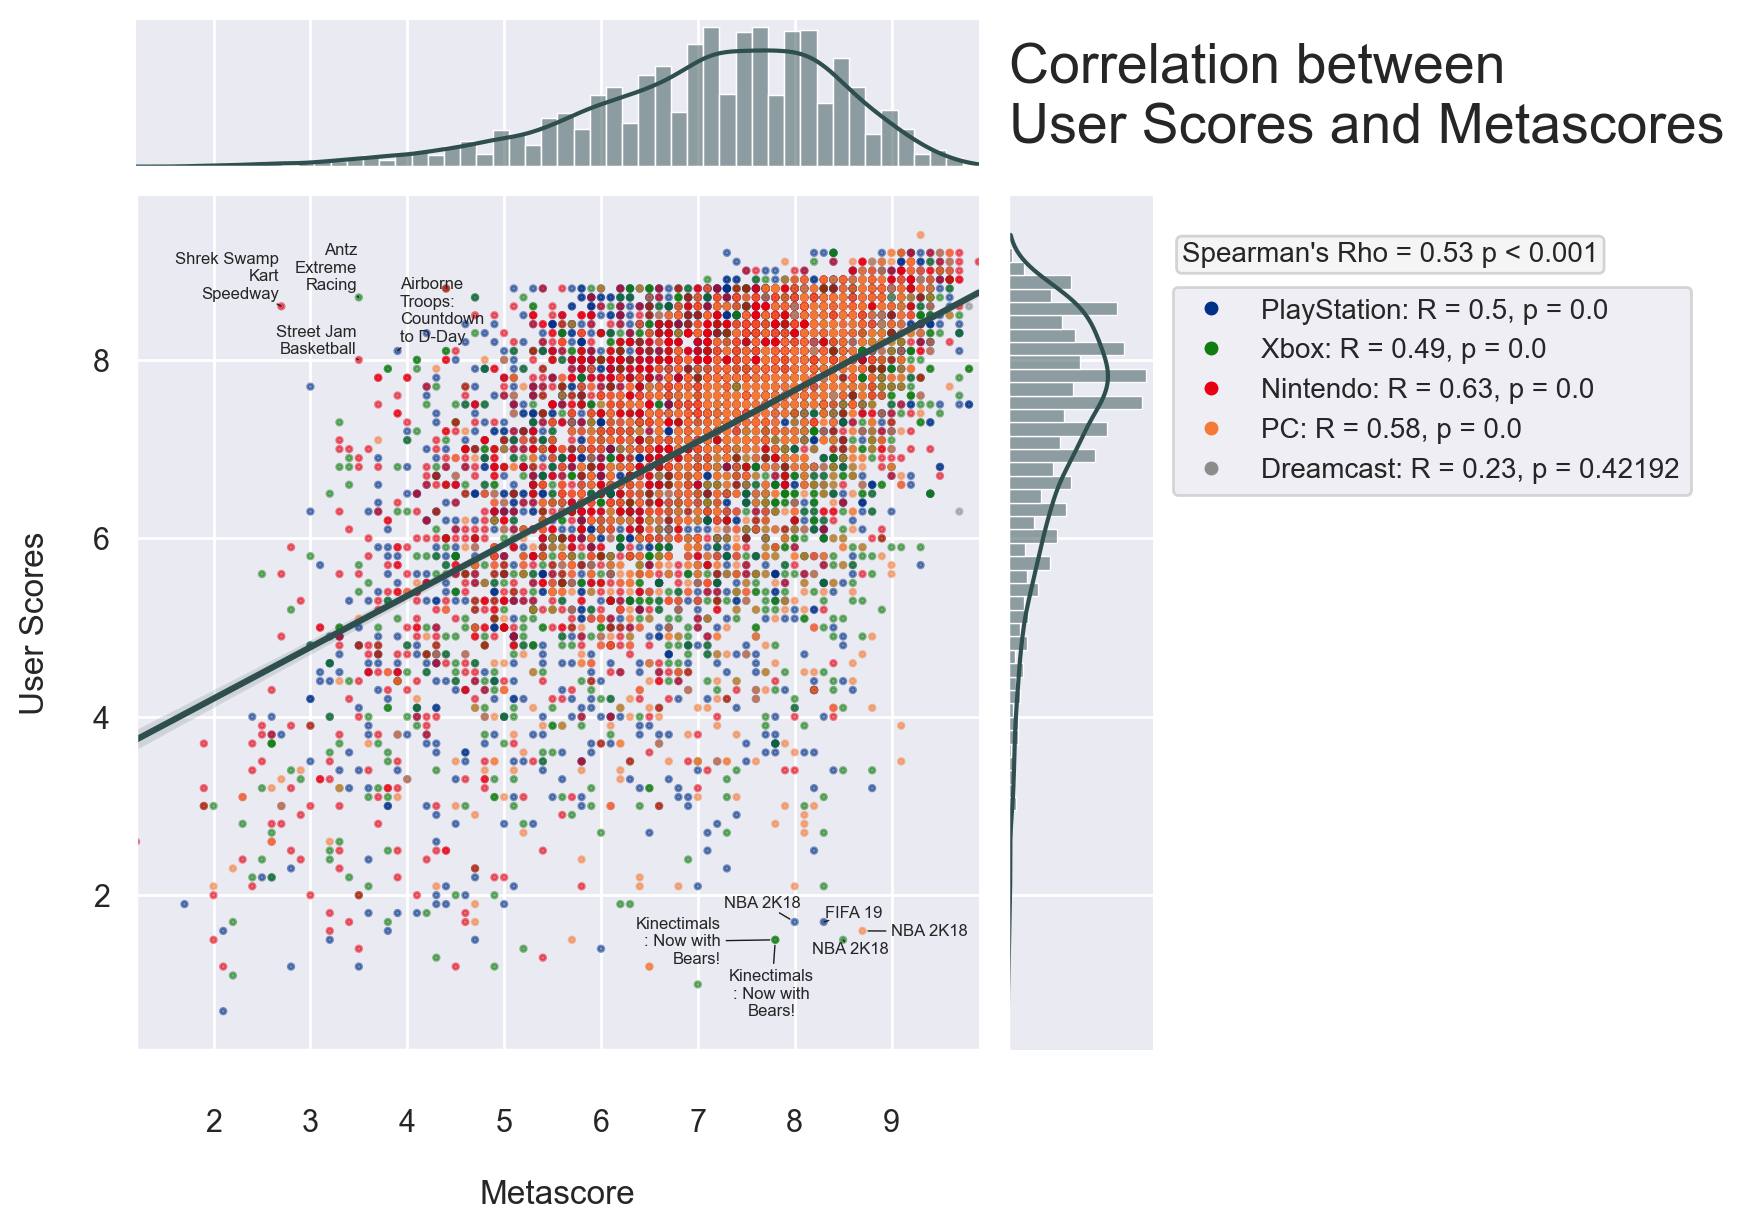

In [121]:
plt.rcParams.update({'figure.figsize':(20,12), 'figure.dpi':200})

colors = list(colors_platforms.values())
colors_rgba = list(colors_platforms_rgba.values())

g = sns.jointplot(x='metascore', y='user_score', data=scatter, color='darkslategray', kind='reg',scatter=False ) # scatter_kws={'s': 2}
g.ax_joint.scatter(x='metascore', y='user_score', c='class', cmap=matplotlib.colors.ListedColormap(colors), data=scatter, s=4, alpha=0.5)

# decorations
g.fig.suptitle('Correlation between \nUser Scores and Metascores', x=0.85, y=0.95, ha='left', size=20)
plt.xlabel('Metascore', labelpad=15, size=12)
plt.ylabel('User Scores', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.text(12.0002, 9.1, 'Spearman\'s Rho = {} p < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke'))

texts = []
for x, y, l in zip(for_text['metascore'], for_text['user_score'], for_text['name']):
    texts.append(plt.text(x, y, l, size=6))

plt.title('%s' % adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5)),pad=15 )


h = [plt.plot([],[], color=i, marker="o", ms=4, ls="")[0] for i in colors_rgba]
plt.legend(handles=h, labels=labels,loc=(1.23,0.65), title="", fontsize=10)

plt.savefig('img/10.Corr_metascore_user_score.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()

In [122]:
df[df['name']=='NBA 2K18'][['name','platform','metascore','user_score']]

name platform  metascore  user_score
397   NBA 2K18      PS4        8.0         1.7
794   NBA 2K18     XONE        8.5         1.5
3073  NBA 2K18       PC        8.7         1.6
3646  NBA 2K18   Switch        7.4         4.3

In [422]:
scatter['global_sales'] = scatter['global_sales'].replace(0,0.0000000001)
scatter_log = scatter
scatter_log['log_Sales'] = np.log10(scatter_log['global_sales']) 

In [423]:
min(scatter_log['log_Sales'])

-10.0

In [424]:
# text for outliers
percentile = np.percentile(np.sort(scatter_log['log_Sales']), 90)

for_text = scatter_log[['metascore', 'user_score', 'log_Sales', 'name', 'platform']]
for_text = for_text[(for_text['metascore'] < 5) & (for_text['log_Sales'] > percentile) | 
                    (for_text['metascore'] < 5) & (for_text['log_Sales'] > percentile)]

for_text['name'] = [textwrap.fill(label, 11) for label in list(for_text['name'])]

In [425]:
for_text


metascore  user_score  log_Sales  \
952        3.3         4.9   0.232996   
905        4.7         6.5   0.250420   
606        2.5         3.8   0.376577   
304        4.9         7.9   0.602060   
943        2.0         2.0   0.235528   
780        4.8         3.3   0.247973   
759        4.9         4.9   0.315970   
858        2.9         5.3   0.276462   
857        4.9         6.3   0.276462   
997        4.4         8.0   0.222716   

                                         name platform  
952  Call of\nDuty Black\nOps: Declas\nsified     VITA  
905                     50 Cent:\nBulletproof      PS2  
606                                Game Party      WII  
304                                Just Dance      WII  
943                          Deal or No\nDeal       DS  
780                           Carnival\nGames       DS  
759                         The Sims 2:\nPets       DS  
858                             Game Party\n2      WII  
857                         Toy Story\nMania!      WII  
997                         Big Beach\nSports      WII

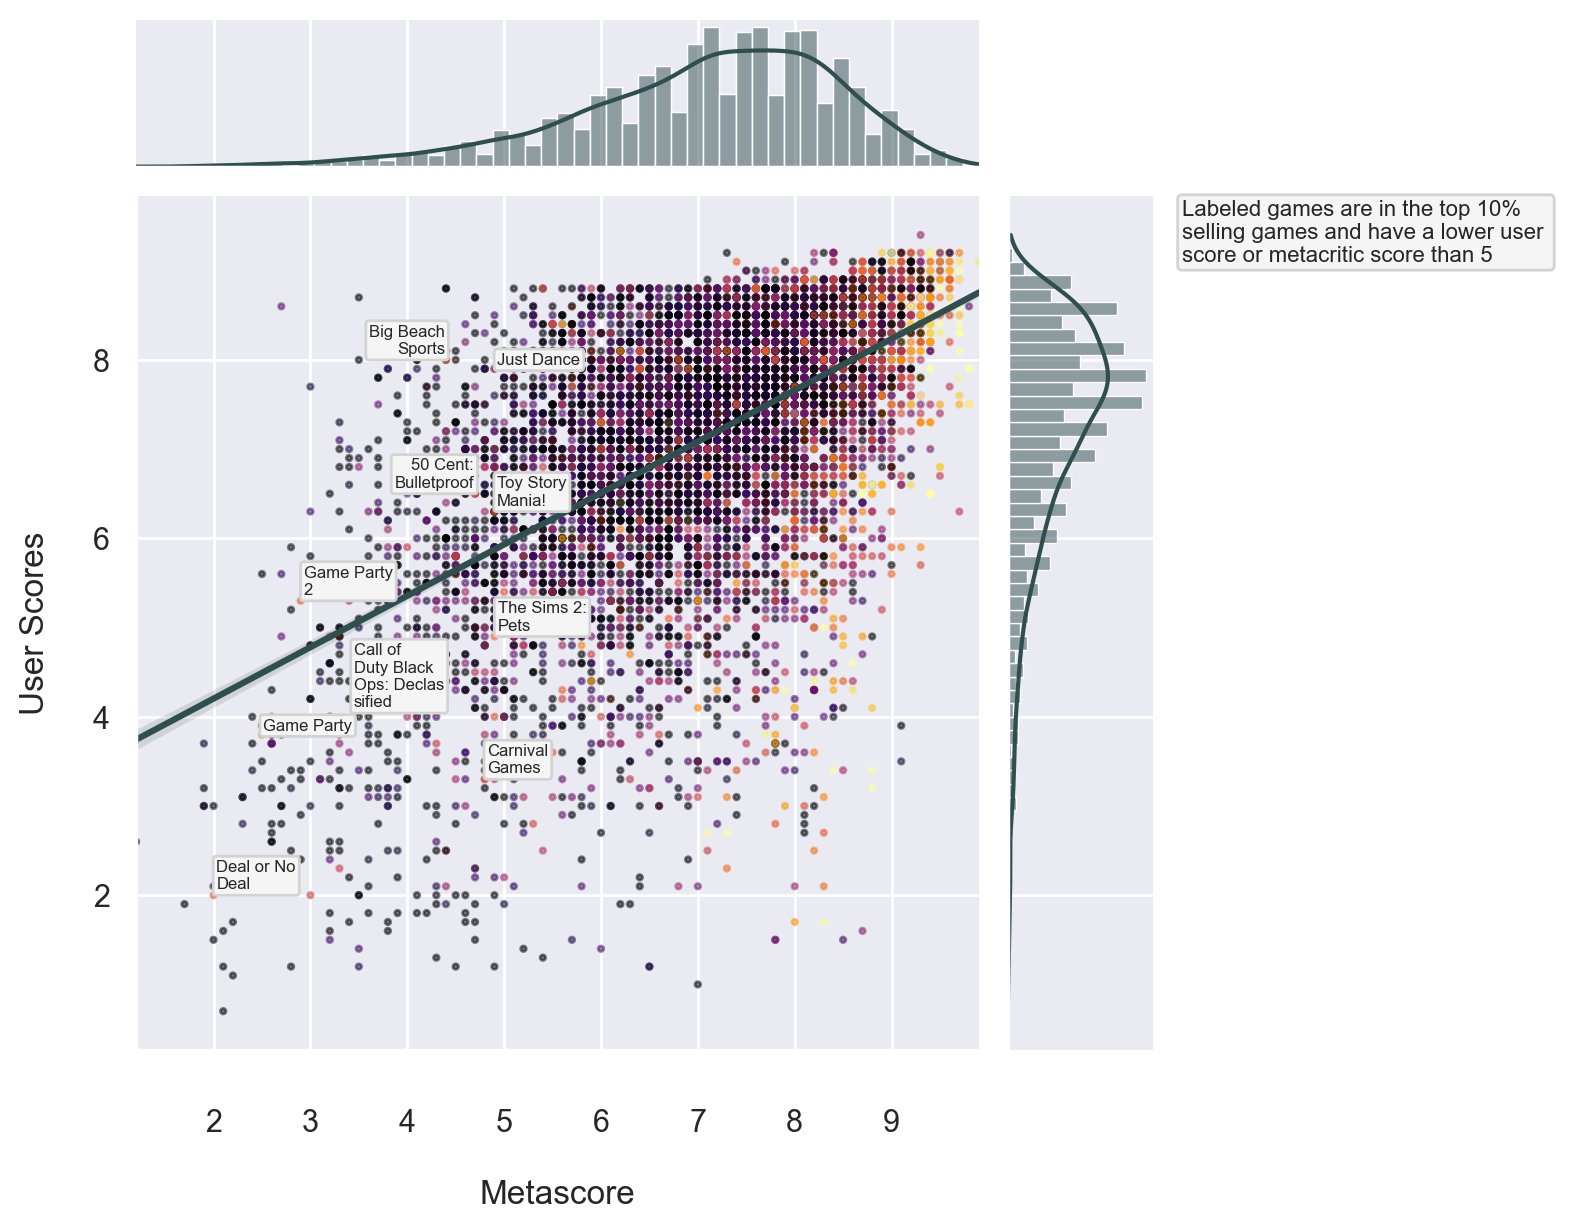

In [427]:
plt.rcParams.update({'figure.figsize':(20,12), 'figure.dpi':200})

colors = list(colors_platforms.values())
colors_rgba = list(colors_platforms_rgba.values())

g = sns.jointplot(x='metascore', y='user_score', data=scatter_log, color='darkslategray', kind='reg',scatter=False) # scatter_kws={'s': 2}
im = g.ax_joint.scatter(x='metascore', y='user_score', c='log_Sales', cmap='inferno', data=scatter_log, s=4, alpha=0.5, vmin=-1, vmax=1)

# decorations
plt.xlabel('Metascore', labelpad=15, size=12)
plt.ylabel('User Scores', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.text(12.0002, 9.1, 'Labeled games are in the top 10% \nselling games and have a lower user \nscore or metacritic score than 5 '.format(correlation), fontsize=8, 
            bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke'))


texts = []
for x, y, l in zip(for_text['metascore'], for_text['user_score'], for_text['name']):
    texts.append(plt.text(x+0.01, y, l, size=6, bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke')))

plt.title('%s' % adjust_text(texts),pad=15 )

plt.savefig('img/11.Corr_metascore_sales_no_title.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()

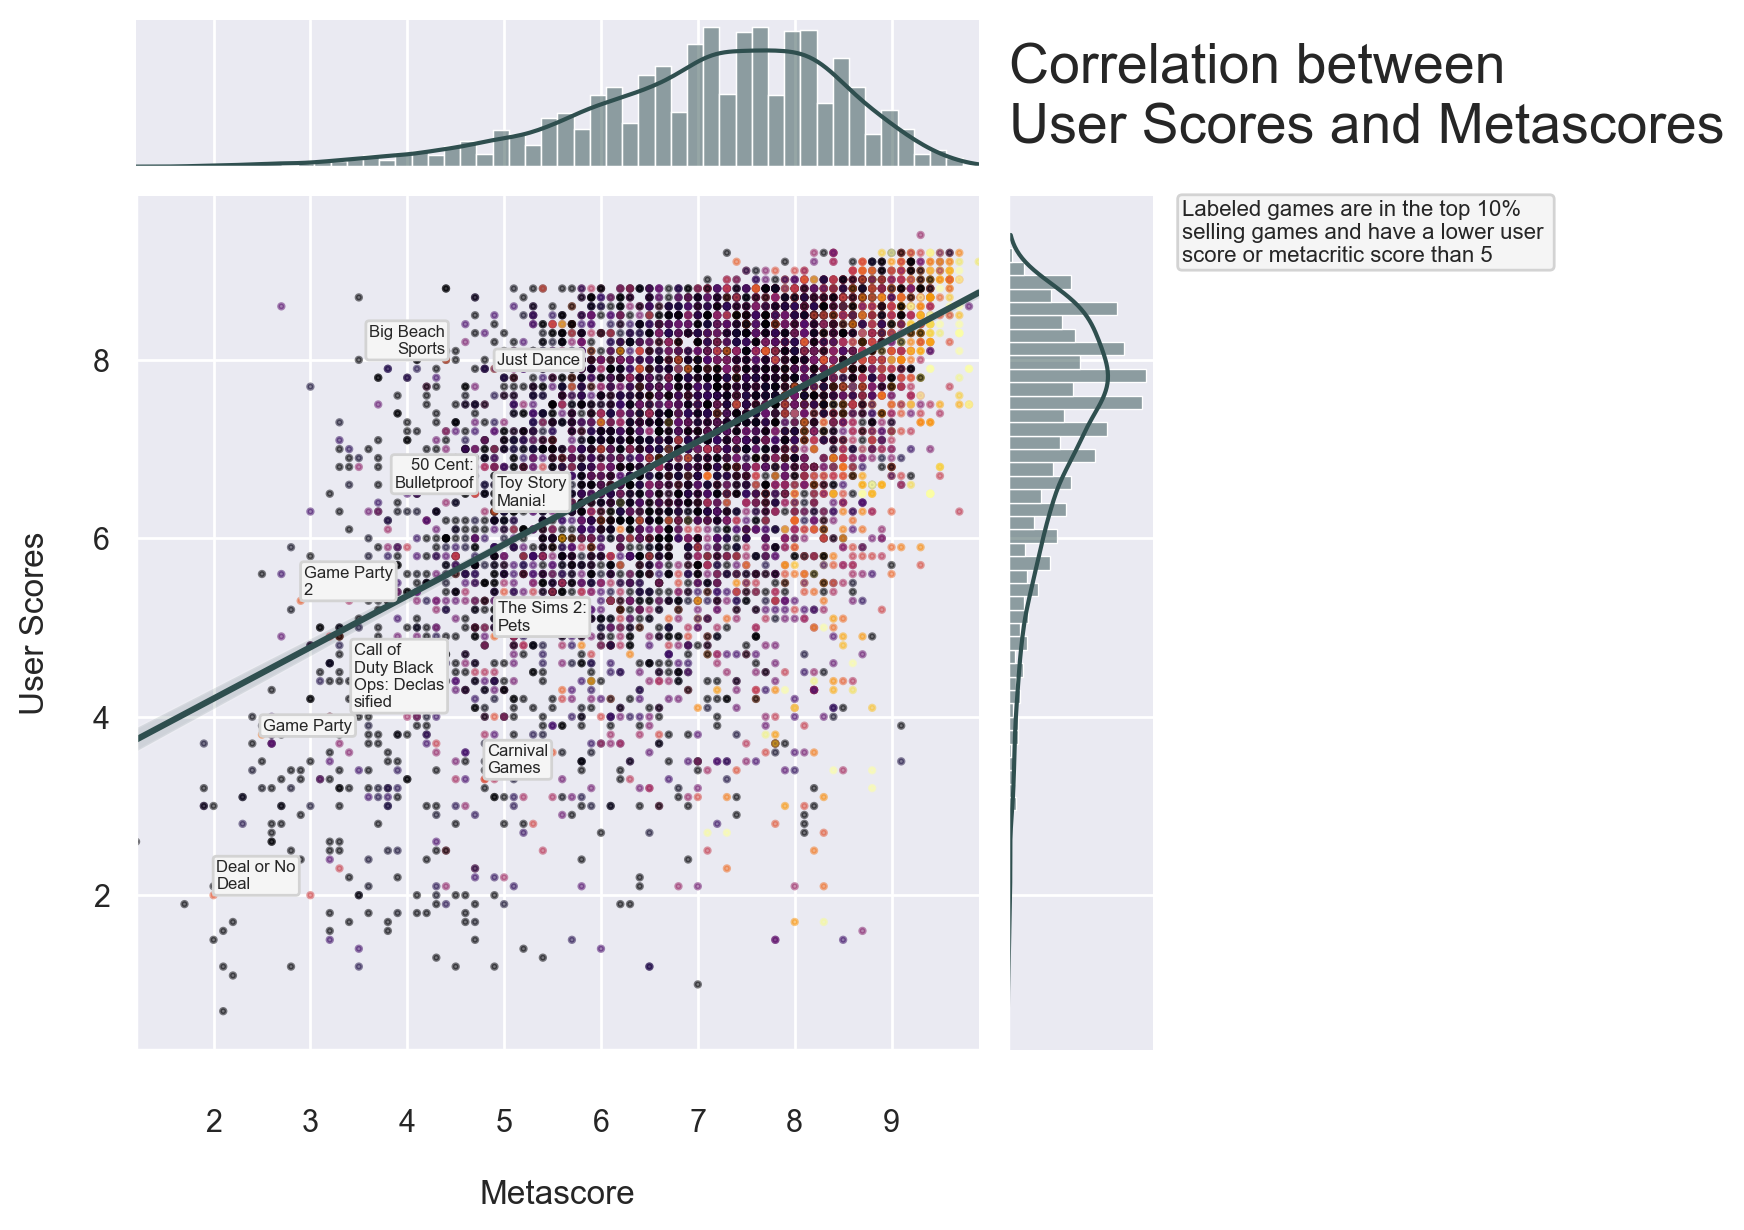

In [426]:
plt.rcParams.update({'figure.figsize':(20,12), 'figure.dpi':200})

colors = list(colors_platforms.values())
colors_rgba = list(colors_platforms_rgba.values())

g = sns.jointplot(x='metascore', y='user_score', data=scatter_log, color='darkslategray', kind='reg',scatter=False) # scatter_kws={'s': 2}
im = g.ax_joint.scatter(x='metascore', y='user_score', c='log_Sales', cmap='inferno', data=scatter_log, s=4, alpha=0.5, vmin=-1, vmax=1)

# decorations
g.fig.suptitle('Correlation between \nUser Scores and Metascores', x=0.85, y=0.95, ha='left', size=20)
plt.xlabel('Metascore', labelpad=15, size=12)
plt.ylabel('User Scores', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.text(12.0002, 9.1, 'Labeled games are in the top 10% \nselling games and have a lower user \nscore or metacritic score than 5 '.format(correlation), fontsize=8, 
            bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke'))


texts = []
for x, y, l in zip(for_text['metascore'], for_text['user_score'], for_text['name']):
    texts.append(plt.text(x+0.01, y, l, size=6, bbox=dict(edgecolor = 'lightgray', boxstyle='round,pad=0.2', fc='whitesmoke')))

plt.title('%s' % adjust_text(texts),pad=15 )

plt.savefig('img/11.Corr_metascore_sales.png', dpi=200, bbox_inches='tight', transparent=True)
plt.show()

[]

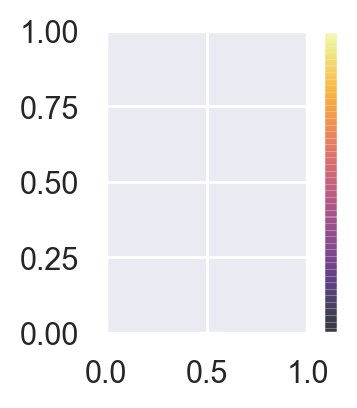

In [189]:
fig, ax = plt.subplots(figsize=(2,2))
cbar = plt.colorbar(im, fraction=0.3)
cbar.ax.get_yaxis().set_ticks([])

In [113]:
correlations = []
p_values = []

sales = scatter[scatter.global_sales.notna()]

for i in np.sort(sales['parent_platform'].unique()): 
    x = sales[sales['parent_platform'] == i]['global_sales']
    y = sales[sales['parent_platform'] == i]['metascore']
    correlations.append(round(stats.pearsonr(x=x, y=y)[0],2))
    p_values.append(round(stats.pearsonr(x=x, y=y)[1],3))


#text for outliers
for_text = sales[['metascore', 'global_sales', 'name','parent_platform']]
for_text = for_text[(for_text['global_sales'] > 20)]

for_text['name'] = [textwrap.fill(label, 10) for label in list(for_text['name'])]

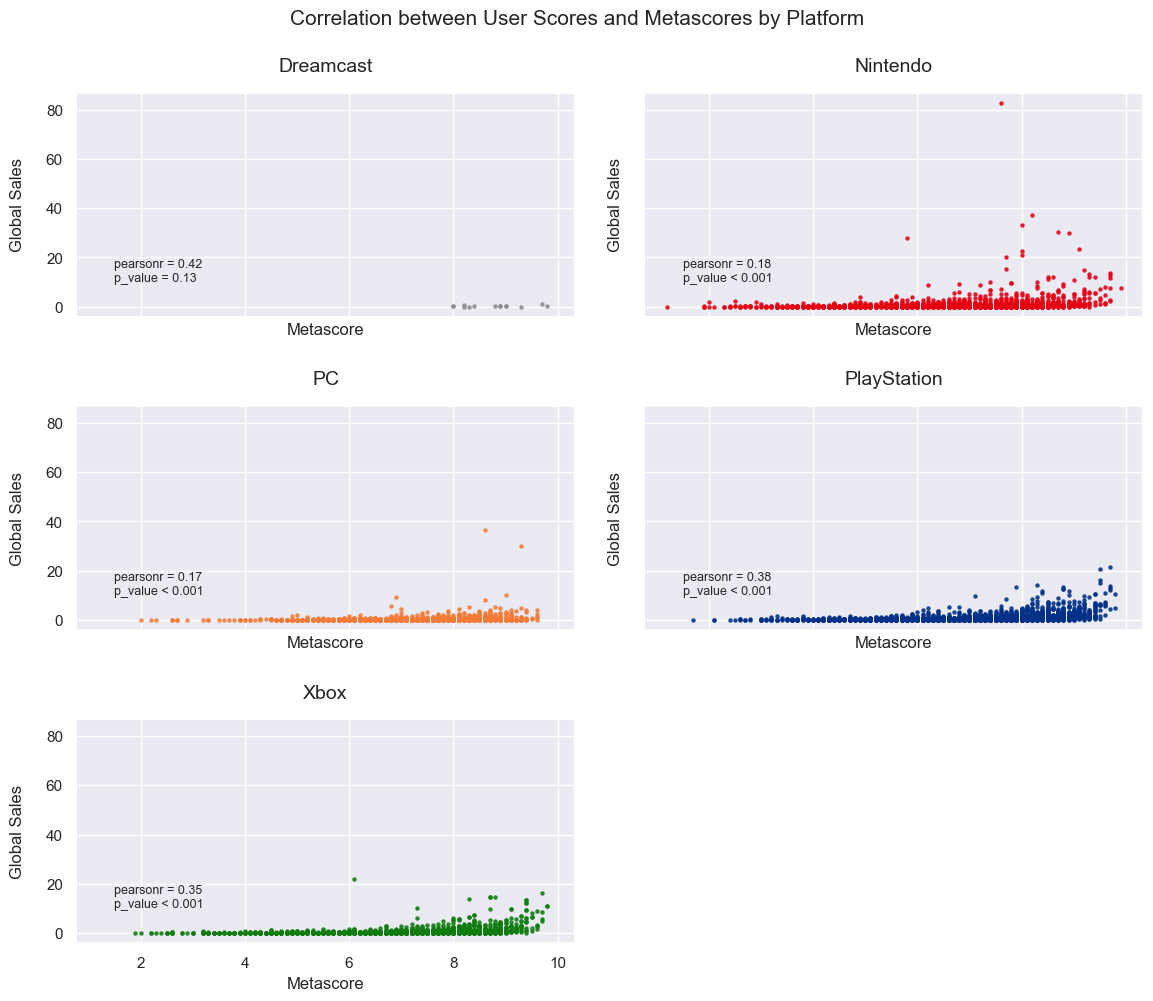

In [114]:
n = len(sales["parent_platform"].unique())
order = np.sort(sales["parent_platform"].unique())
reordered_colors = {k: colors_platforms[k] for k in list(order)}

plt.rcParams.update({'figure.figsize':(12,10)})

fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True)

plt.figtext(.5,1,'Correlation between User Scores and Metascores by Platform',fontsize=15,ha='center')

for ax, (platform, grp1), corr, p in zip(axes.flat, sales.groupby("parent_platform"), correlations, p_values):
    ax.set_title(platform, pad=15, fontdict={'size':14})


    sns.regplot(x="metascore", y="global_sales", data=grp1, label=str(gen), 
                fit_reg=False, ax=ax, color=colors_platforms[platform], scatter_kws={'s':5})


    if p > 0:
        ax.text(1.5, 10.5,'pearsonr = {} \np_value = {}'.format(corr,p), fontsize=9)
    else:
        ax.text(1.5, 10.5,'pearsonr = {} \np_value < 0.001'.format(corr), fontsize=9)
    
    ax.set_ylabel('Global Sales', labelpad=15)
    ax.set_xlabel('Metascore')
    
axes.flat[-1].set_visible(False)

fig.tight_layout(pad=2.0)
plt.savefig('img/12.Corr_metascore_global_sales_by_platform.png', dpi=200, bbox_inches='tight')   

plt.show()

In [115]:
# Text labels for previous figure, not working yet
#    texts = []
#    sub_df = for_text[for_text['parent_platform']== platform]
#    for x, y, l in zip(for_text['metascore'], for_text['global_sales_adj'], for_text['name']):
#        texts.append(plt.text(x, y, l, size=6))

#    adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5))

In [116]:
scatter.columns

Index(['Unnamed: 0', 'name', 'genre', 'parent_platform', 'platform',
       'publisher', 'developer', 'release_date', 'rating', 'global_sales',
       'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'generation',
       'players_category', 'players', 'online', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'num_critic_reviews',
       'user_positive', 'user_neutral', 'user_negative', 'user_score',
       'num_users_reviews'],
      dtype='object')

In [117]:
# data for scatterplot below
scatter = df[df['num_users_reviews'].notna()]

# correlations and p_values
correlation = round(stats.pearsonr(scatter['num_critic_reviews'], y=scatter['num_users_reviews'])[0],2)
p_value = round(stats.pearsonr(scatter['num_critic_reviews'], y=scatter['num_users_reviews'])[1],5)

# text for outliers
for_text = scatter[['num_critic_reviews', 'num_users_reviews', 'name']]
for_text = for_text[(for_text['num_users_reviews'] > 2000)]
                    #(for_text['num_critic_reviews'] <= 3) & (for_text['num_users_reviews'] > 7)

for_text['name'] = [textwrap.fill(label, 11) for label in list(for_text['name'])]

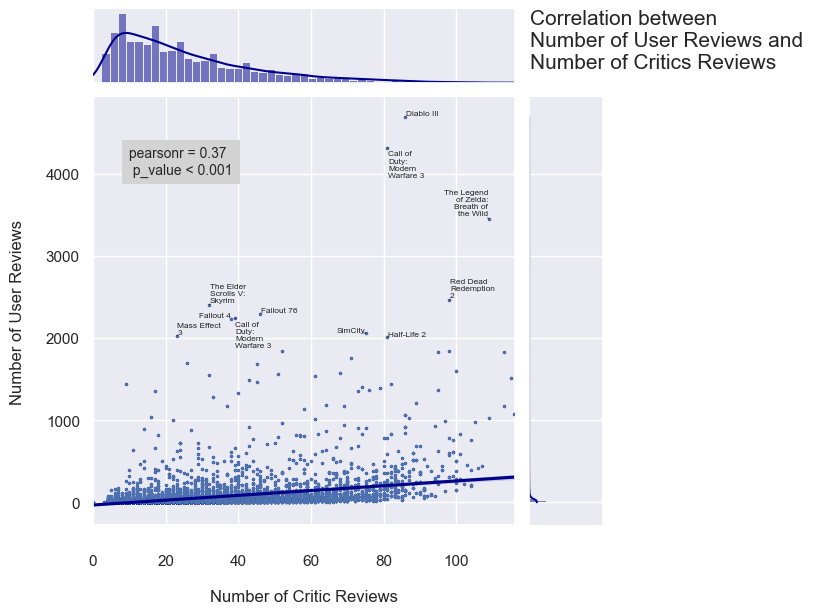

In [118]:
plt.rcParams.update({'figure.figsize':(16,8), 'figure.dpi':100})

g = sns.jointplot(x='num_critic_reviews', y='num_users_reviews', data=scatter, color='darkblue', kind='reg', scatter_kws={'s': 2})
g.ax_joint.scatter(x='num_critic_reviews', y='num_users_reviews', cmap='rainbow', data=scatter, s=2)

# decorations
g.fig.suptitle('Correlation between \nNumber of User Reviews and \nNumber of Critics Reviews', x=0.85, y=0.97, ha='left', size=15)
plt.xlabel('Number of Critic Reviews', labelpad=15, size=12)
plt.ylabel('Number of User Reviews', labelpad=15, size=12)
plt.tick_params(axis='x', which='major', pad=15)
plt.text(10, 4000, 'pearsonr = {} \n p_value < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(boxstyle='square,pad=0.5', fc='lightgray', ec='none'))

texts = []
for x, y, l in zip(for_text['num_critic_reviews'], for_text['num_users_reviews'], for_text['name']):
    texts.append(plt.text(x, y, l, size=6))

plt.title('%s' % adjust_text(texts,arrowprops=dict(arrowstyle="-", color='k', lw=0.5)),pad=15 )

plt.savefig('img/10.Corr_number_user_reviews_vs_critics.png', dpi=200, bbox_inches='tight')
plt.show()

In [70]:
# generates a dataframe with the duplicates values
duplicates = pd.concat(g for _, g in df.groupby("name") if len(g) > 1)

In [71]:
duplicates = duplicates[['name', 'genre','parent_platform','global_sales']]
duplicates = duplicates.pivot_table(index=['name','genre'], 
                    columns='parent_platform', 
                    values='global_sales')

In [72]:
# for some reason some games were duplicated in the same console we need to take care of those cases
duplicates = duplicates.dropna(thresh=2)
duplicates = duplicates.reset_index(level=1)

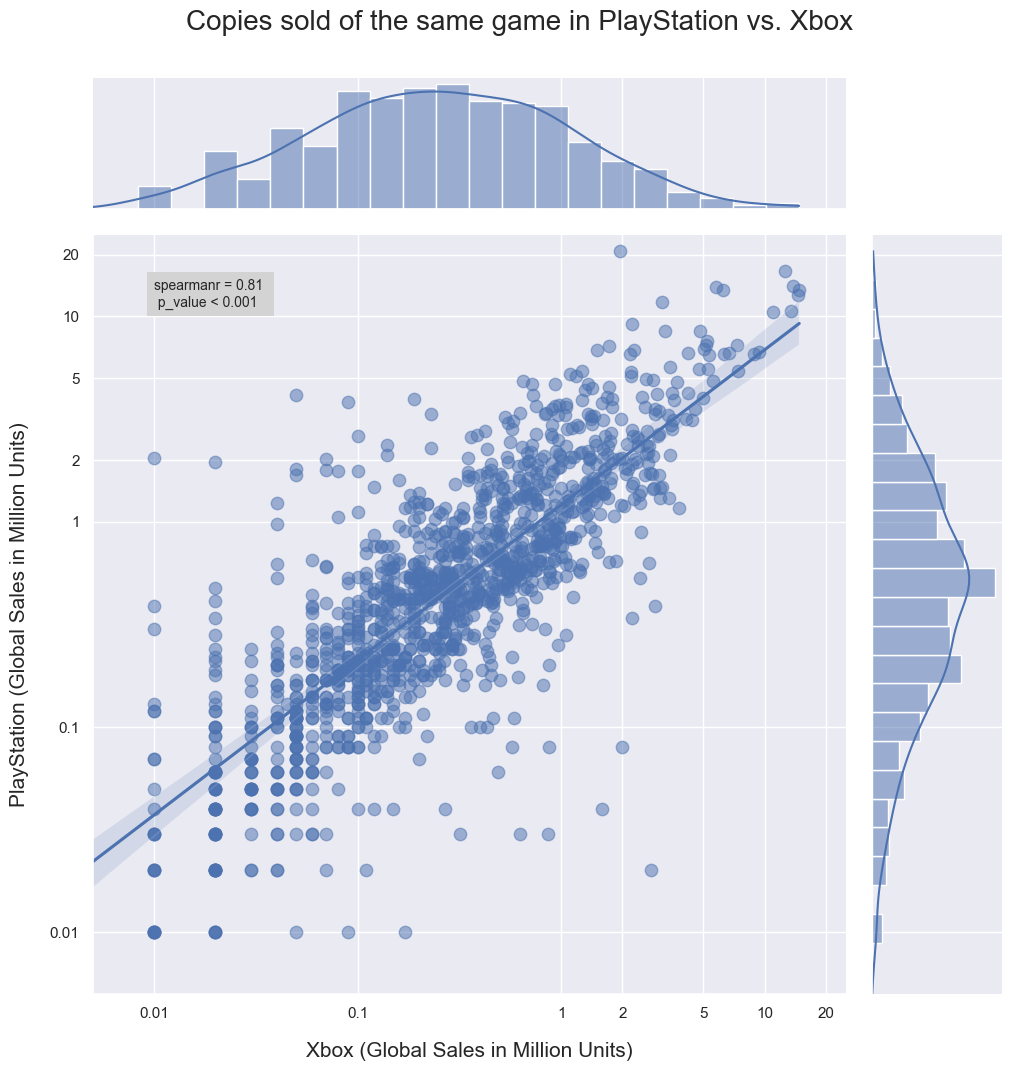

In [73]:
data = duplicates[['PlayStation', 'Xbox']].dropna(thresh=2)
data = data.mask(data==0).fillna(0.00001)

g = sns.jointplot(x=np.log10(data['Xbox']), y=np.log10(data['PlayStation']),
                  scatter_kws={'s': 80, 'alpha': 0.5}, kind='reg', height=10)

ax = g.ax_joint
ax.set_ylabel('PlayStation (Global Sales in Million Units)', labelpad=15, fontsize=15)
ax.set_xlabel('Xbox (Global Sales in Million Units)', labelpad=15, fontsize=15)

g.fig.suptitle('Copies sold of the same game in PlayStation vs. Xbox', size=20, x=0.5, y=1.05)

ticks = np.log10(np.array([.01, .1, 1, 2, 5, 10, 20]))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)
lims = np.log10(np.array([0.005, 25.]))
ax.set_xlim(lims)
ax.set_ylim(lims)

# correlations and p_values
correlation = round(stats.spearmanr(a=data['Xbox'], b=data['PlayStation'])[0],2)
p_value = round(stats.spearmanr(a=data['Xbox'], b=data['PlayStation'])[1],5)

plt.text(-2., 1.05, 'spearmanr = {} \n p_value < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(boxstyle='square,pad=0.5', fc='lightgray', ec='none'))

plt.savefig('img/26.Copies_Sold_Same_Game_PlayStation_vs_Xbox.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

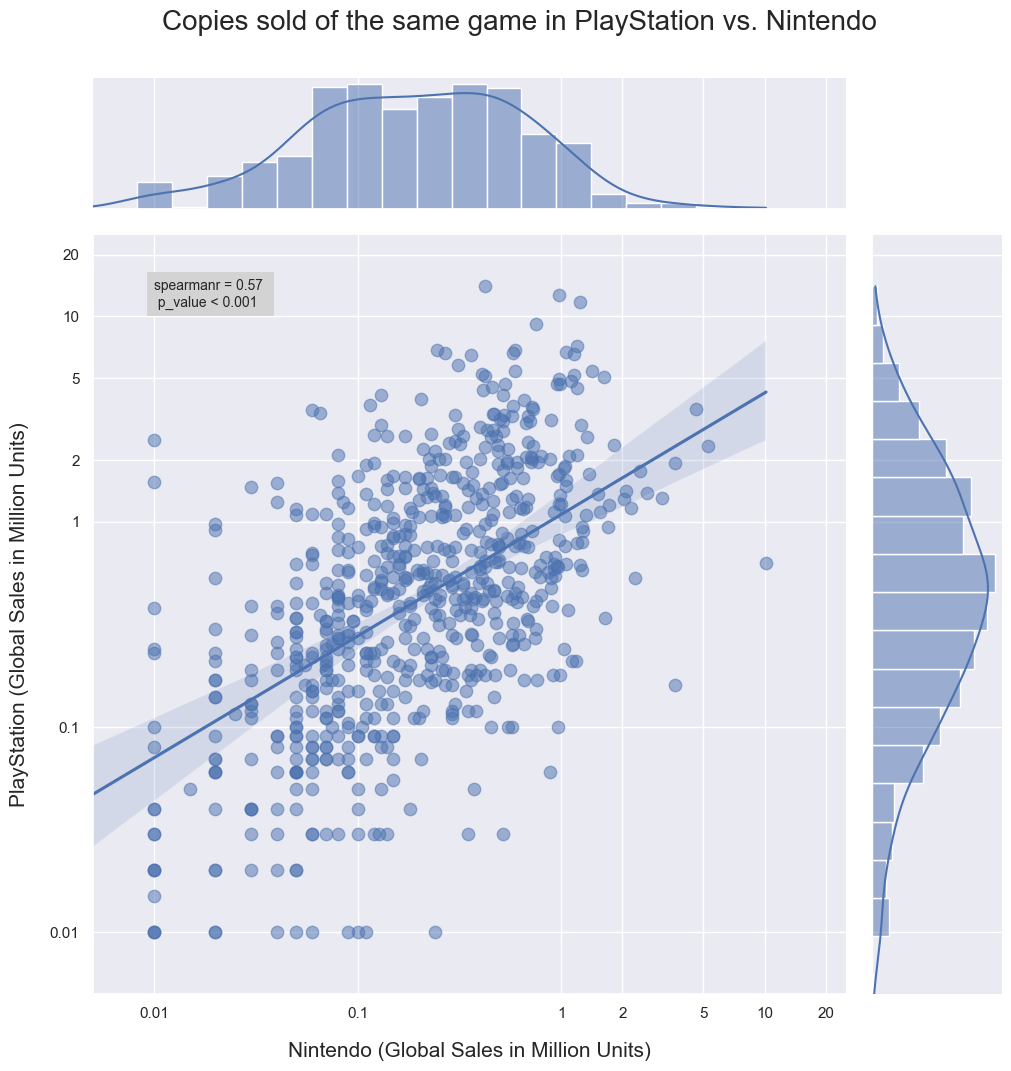

In [74]:
data = duplicates[['PlayStation', 'Nintendo']].dropna(thresh=2)
data = data.mask(data==0).fillna(0.00001)

g = sns.jointplot(x=np.log10(data['Nintendo']), y=np.log10(data['PlayStation']),
                  scatter_kws={'s': 80, 'alpha': 0.5}, kind='reg', height=10)

ax = g.ax_joint
ax.set_ylabel('PlayStation (Global Sales in Million Units)', labelpad=15, fontsize=15)
ax.set_xlabel('Nintendo (Global Sales in Million Units)', labelpad=15, fontsize=15)

g.fig.suptitle('Copies sold of the same game in PlayStation vs. Nintendo', size=20, x=0.5, y=1.05)

ticks = np.log10(np.array([.01, .1, 1, 2, 5, 10, 20]))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)
lims = np.log10(np.array([0.005, 25.]))
ax.set_xlim(lims)
ax.set_ylim(lims)

# correlations and p_values
correlation = round(stats.spearmanr(a=data['Nintendo'], b=data['PlayStation'])[0],2)
p_value = round(stats.spearmanr(a=data['Nintendo'], b=data['PlayStation'])[1],5)

plt.text(-2., 1.05, 'spearmanr = {} \n p_value < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(boxstyle='square,pad=0.5', fc='lightgray', ec='none'))

plt.savefig('img/26.Copies_Sold_Same_Game_PlayStation_vs_Nintendo.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

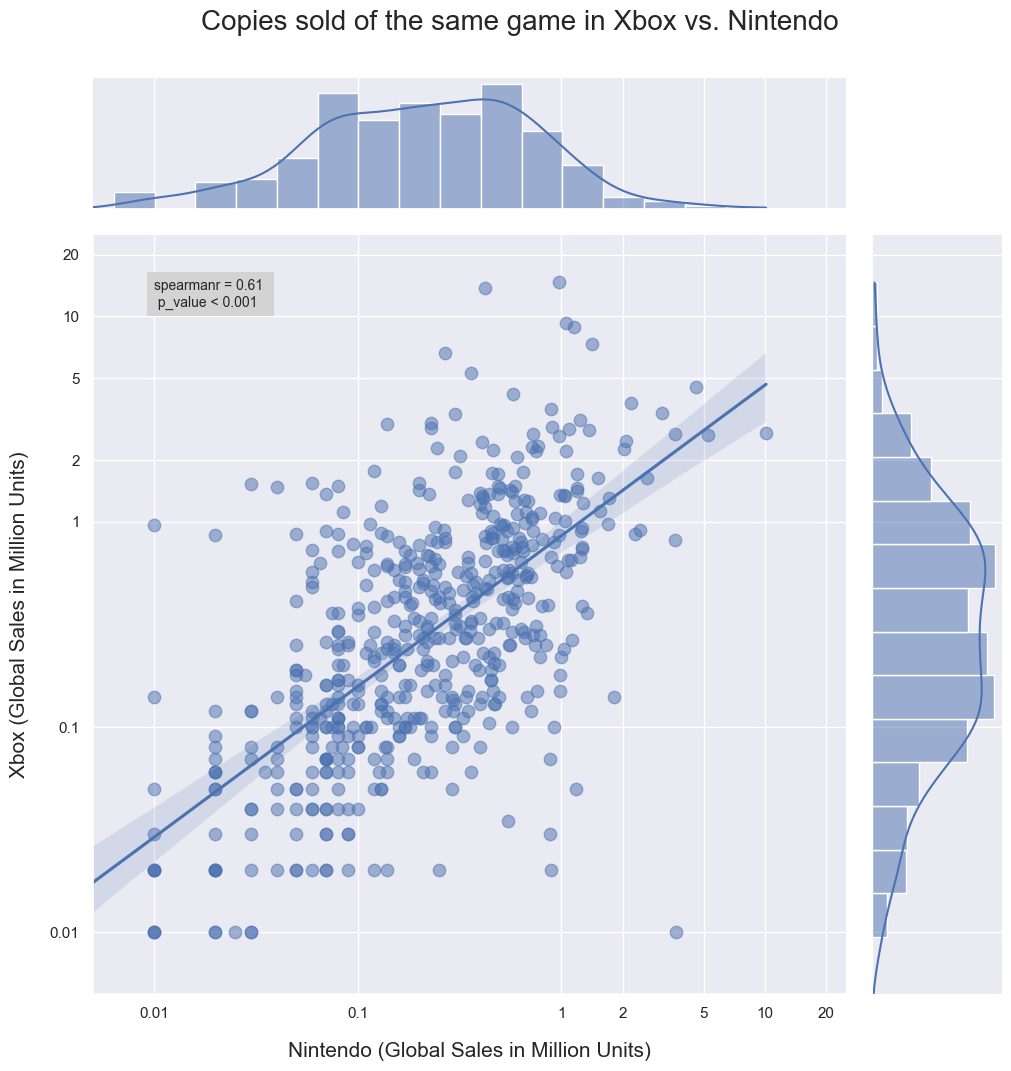

In [75]:
data = duplicates[['Xbox', 'Nintendo']].dropna(thresh=2)
data = data.mask(data==0).fillna(0.00001)

g = sns.jointplot(x=np.log10(data['Nintendo']), y=np.log10(data['Xbox']),
                  scatter_kws={'s': 80, 'alpha': 0.5}, kind='reg', height=10)

ax = g.ax_joint
ax.set_ylabel('Xbox (Global Sales in Million Units)', labelpad=15, fontsize=15)
ax.set_xlabel('Nintendo (Global Sales in Million Units)', labelpad=15, fontsize=15)

g.fig.suptitle('Copies sold of the same game in Xbox vs. Nintendo', size=20, x=0.5, y=1.05)

ticks = np.log10(np.array([.01, .1, 1, 2, 5, 10, 20]))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(formatter)
ax.get_yaxis().set_major_formatter(formatter)
lims = np.log10(np.array([0.005, 25.]))
ax.set_xlim(lims)
ax.set_ylim(lims)

# correlations and p_values
correlation = round(stats.spearmanr(a=data['Nintendo'], b=data['Xbox'])[0],2)
p_value = round(stats.spearmanr(a=data['Nintendo'], b=data['Xbox'])[1],5)

plt.text(-2., 1.05, 'spearmanr = {} \n p_value < 0.001'.format(correlation), fontsize=10, 
            bbox=dict(boxstyle='square,pad=0.5', fc='lightgray', ec='none'))

plt.savefig('img/26.Copies_Sold_Same_Game_Xbox_vs_Nintendo.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

<a id=volcano></a>

### Volcano chart

In [346]:
df_volcano = df[['global_sales','critic_positive','critic_neutral', 'critic_negative', 'metascore', 'num_critic_reviews', 
                 'user_positive', 'user_neutral', 'user_negative', 'user_score','num_users_reviews']]

In [347]:
volcano = {}

for i in list(df_volcano.columns):
    
    if i == 'user_score':
        correlation = round(stats.spearmanr(a=df_volcano[df_volcano['user_score'].notna()]['global_sales'], b=df_volcano[df_volcano['user_score'].notna()]['user_score'])[0],2)
        p_value = stats.spearmanr(a=df_volcano[df_volcano['user_score'].notna()]['global_sales'], b=df_volcano[df_volcano['user_score'].notna()]['user_score'])[1]

    else:
        correlation = round(stats.spearmanr(a=df_volcano['global_sales'], b=df_volcano[i])[0],2)
        p_value = stats.spearmanr(a=df_volcano['global_sales'], b=df_volcano[i])[1]
    
    volcano[i] = [correlation, p_value]

In [348]:
volcano_dataframe = pd.DataFrame(volcano).T
volcano_dataframe.columns = ['r', 'p_value']

In [349]:
volcano_dataframe = volcano_dataframe.iloc[1:,:]

In [350]:
volcano_dataframe

r        p_value
critic_positive     0.45   0.000000e+00
critic_neutral      0.01   2.893600e-01
critic_negative    -0.20   4.172039e-94
metascore           0.37   0.000000e+00
num_critic_reviews  0.43   0.000000e+00
user_positive       0.46   0.000000e+00
user_neutral        0.40   0.000000e+00
user_negative       0.31  4.576106e-225
user_score          0.19   7.628716e-77
num_users_reviews   0.46   0.000000e+00

In [351]:
group = ['positive', 'neutral','negative', 'other', 'other', 'positive', 'neutral','negative', 'other', 'other']
group_num = [1,2,3,4,4,1,2,3,4,4]

volcano_dataframe['group'] = group
volcano_dataframe['group_num'] = group_num

In [352]:
#volcano_dataframe['log2_p_value'] = np.log2(volcano_dataframe.p_value)

In [353]:
colors = ['#22f700', '#FFC30F','#FF5733','#a0a0a0']

/Users/dlc/.pyenv/versions/venv-videogames/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


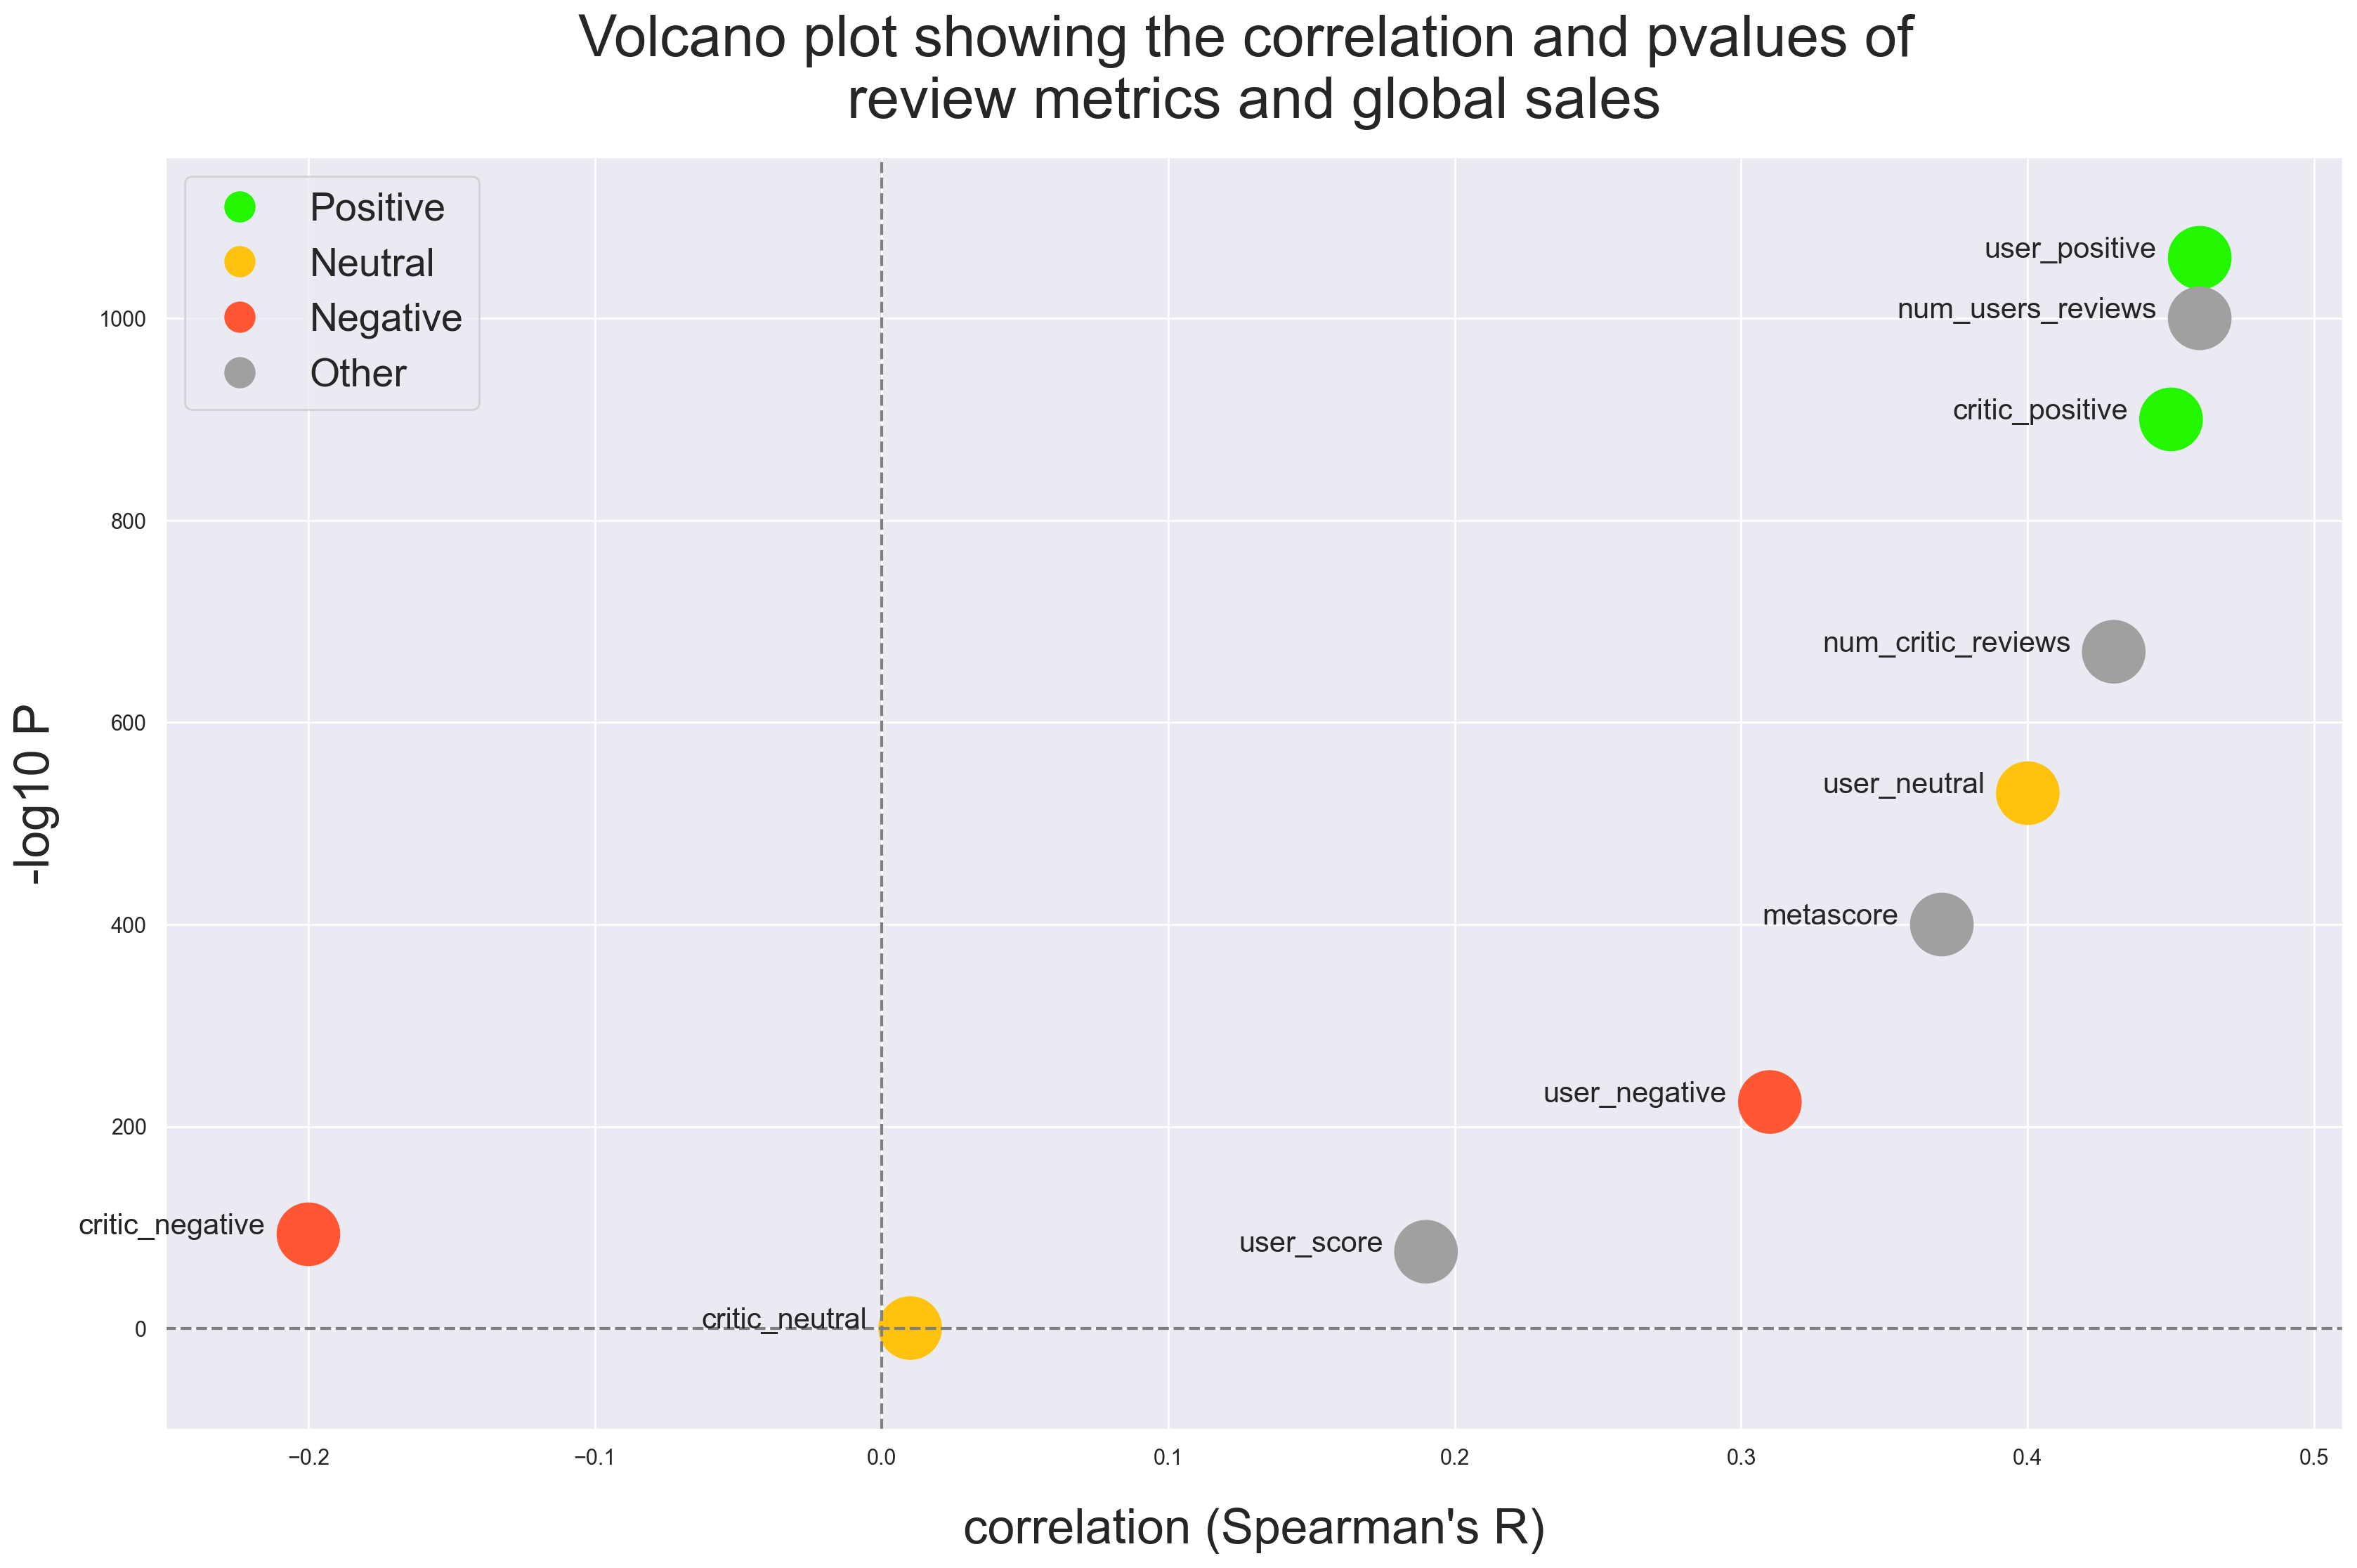

In [385]:
x = list(volcano_dataframe['r'])
y = list(-np.log10(volcano_dataframe['p_value']))
y = [900, 0.5385614674715783, 93.37965162895141, 400, 670,1060, 530, 224.3395039713356, 76.11754853923347, 1000] # unfortunately python does not show p_values smaller than a certain value, these would be an approximation of the real p_value

plt.scatter(x, y, c=volcano_dataframe['group_num'], cmap=matplotlib.colors.ListedColormap(colors),s=1000)
plt.xlabel('correlation (Spearman\'s R)',fontsize = 25, labelpad=20)
plt.ylabel('-log10 P',fontsize = 25, labelpad=20)

plt.ylim(-100,max(y)+100)
plt.xlim(min(volcano_dataframe['r'])-0.05,max(volcano_dataframe['r'])+0.05)
plt.title('Volcano plot showing the correlation and pvalues of \nreview metrics and global sales',fontsize=30, pad=20)
plt.axvline(x=0, linestyle='dashed', color='gray')
plt.axhline(y=0, linestyle='dashed', color='gray')

plt.legend([matplotlib.lines.Line2D([0], [0], marker='o', ms= 15, ls='', c='#22f700'),
           matplotlib.lines.Line2D([0], [0], marker='o', ms= 15, ls='', c='#FFC30F'),
           matplotlib.lines.Line2D([0], [0], marker='o', ms= 15, ls='', c='#FF5733'),
           matplotlib.lines.Line2D([0], [0], marker='o', ms= 15, ls='', c='#a0a0a0')],
          ['Positive', 'Neutral','Negative','Other'], fontsize=20,fancybox=True)

for i, txt in enumerate(list(volcano_dataframe.index)):
    plt.annotate(txt, (x[i]-0.015, y[i]), fontsize=15, ha='right')

plt.savefig('img/21. Volcano Plot.png', transparent=True, dpi=200)
plt.show()

<a id=boxplots></a>

### Boxplots

In [119]:
cdf = df[['parent_platform','metascore','user_score']]
mdf = pd.melt(cdf, id_vars=['parent_platform'], var_name=['source']) 

In [122]:
# this generates pair colors for the platforms (1 color has more strength than the other)
colors_platforms_rgba_2 = rgb_pct_converter(colors_platforms_rgb)
for key, value in colors_platforms_rgba_2.items():
    value.pop()
    value.append(0.3)
zipped_colors = zip(list(colors_platforms_rgba.values()),list(colors_platforms_rgba_2.values()))
colors = []
for i in zipped_colors:
    colors.append(tuple(i[0]))
    colors.append(tuple(i[1]))

In [123]:
#mdf = mdf[mdf['parent_platform'] != 'Dreamcast']

In [124]:
order = ['PlayStation','Xbox','Nintendo','PC', 'Dreamcast']

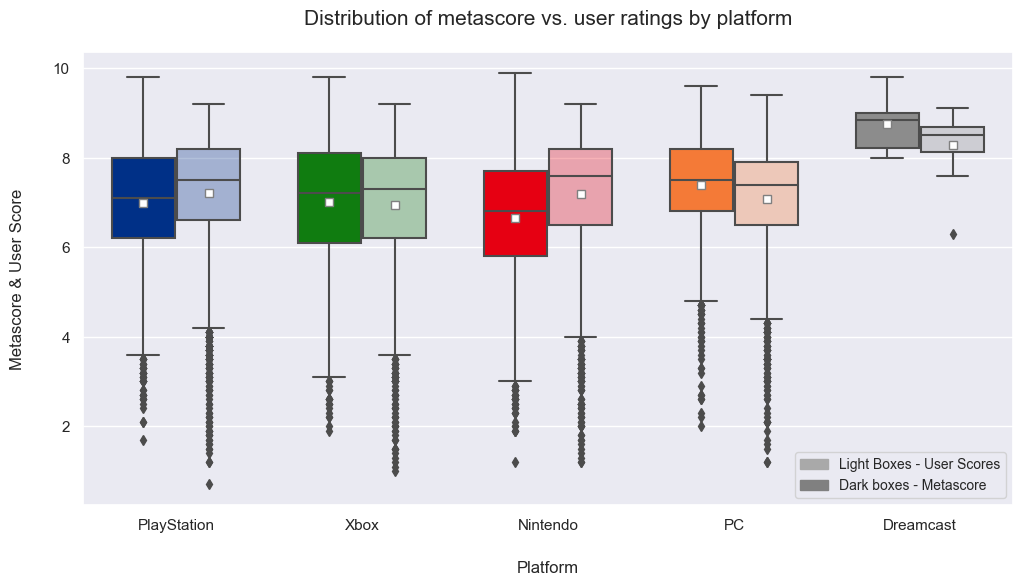

In [128]:
plt.figure(figsize=(12,6))

g = sns.boxplot(x='parent_platform',y='value', hue='source', data=mdf, showmeans=True, width=0.7, order=order,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

# add this in the visualization below
for i, color in zip(range((len(mdf.parent_platform.unique())*2)),colors):
    mybox = g.artists[i]
    mybox.set_facecolor(color)  
    
plt.title('Distribution of metascore vs. user ratings by platform', size=15, pad=20)
plt.xlabel('Platform', labelpad=20)
plt.ylabel('Metascore & User Score', labelpad=20)

dark = matplotlib.patches.Patch(color='gray', label='Dark boxes - Metascore')
light = matplotlib.patches.Patch(color='darkgray', label='Light Boxes - User Scores')
plt.legend(handles=[light, dark], loc='lower right', fontsize=10)

plt.savefig('img/13.Boxplot_Metascore_Platforms.png', dpi=200,transparent=True)
plt.show()

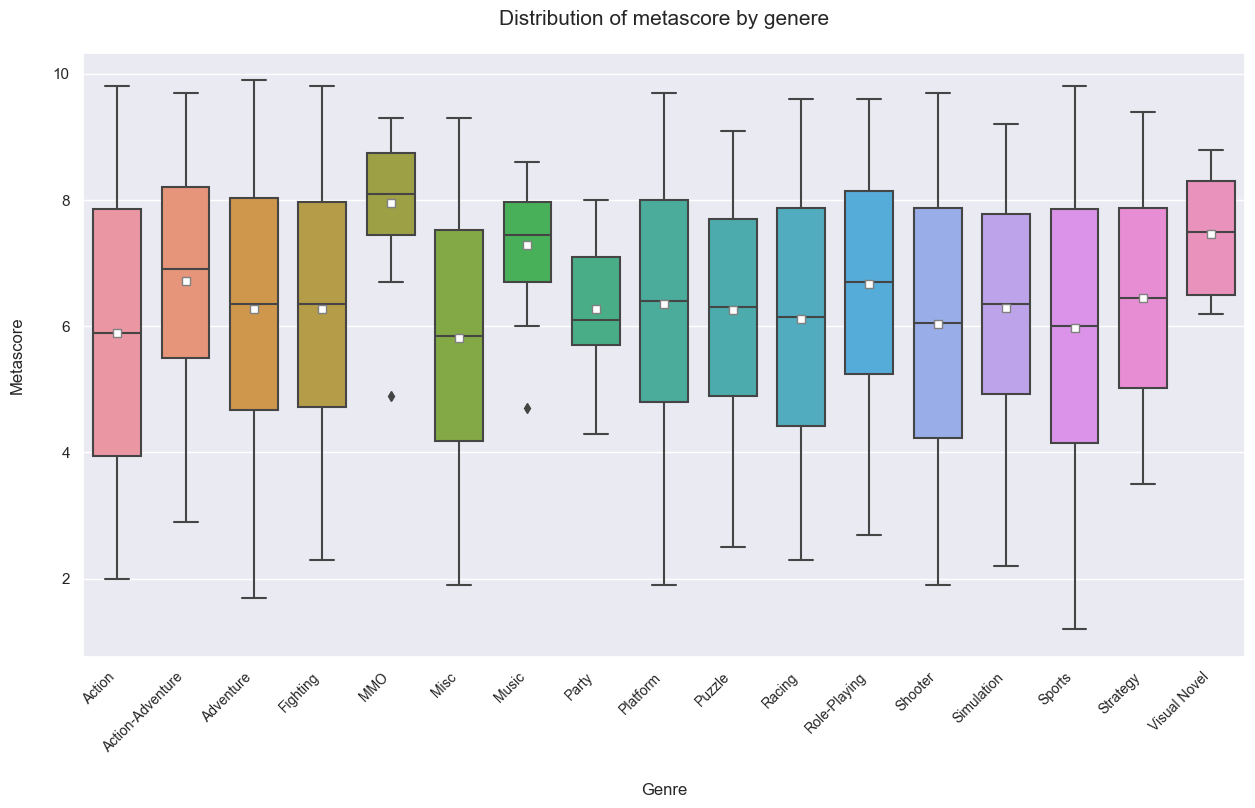

In [135]:
df_counts = df.groupby(['genre', 'metascore']).size().reset_index(name='counts')
df_counts = df_counts[(df_counts.genre != 'Board Game') & (df_counts.genre != 'Education') & (df_counts.genre != 'Sandbox')]

plt.figure(figsize=(15,8))

g = sns.boxplot(x='genre',y='metascore', data=df_counts, showmeans=True, width=0.7,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})
    
plt.title('Distribution of metascore by genere', size=15, pad=20)
plt.xlabel('Genre', labelpad=20)
plt.ylabel('Metascore', labelpad=20)
plt.xticks(size=10, rotation=45, ha='right')

plt.savefig('img/14.Boxplot_Metascore_genres_A.png', dpi=200)

plt.show()

In [136]:
cdf = df[['genre','metascore','user_score']]
mdf = pd.melt(cdf, id_vars=['genre'], var_name=['source']) 

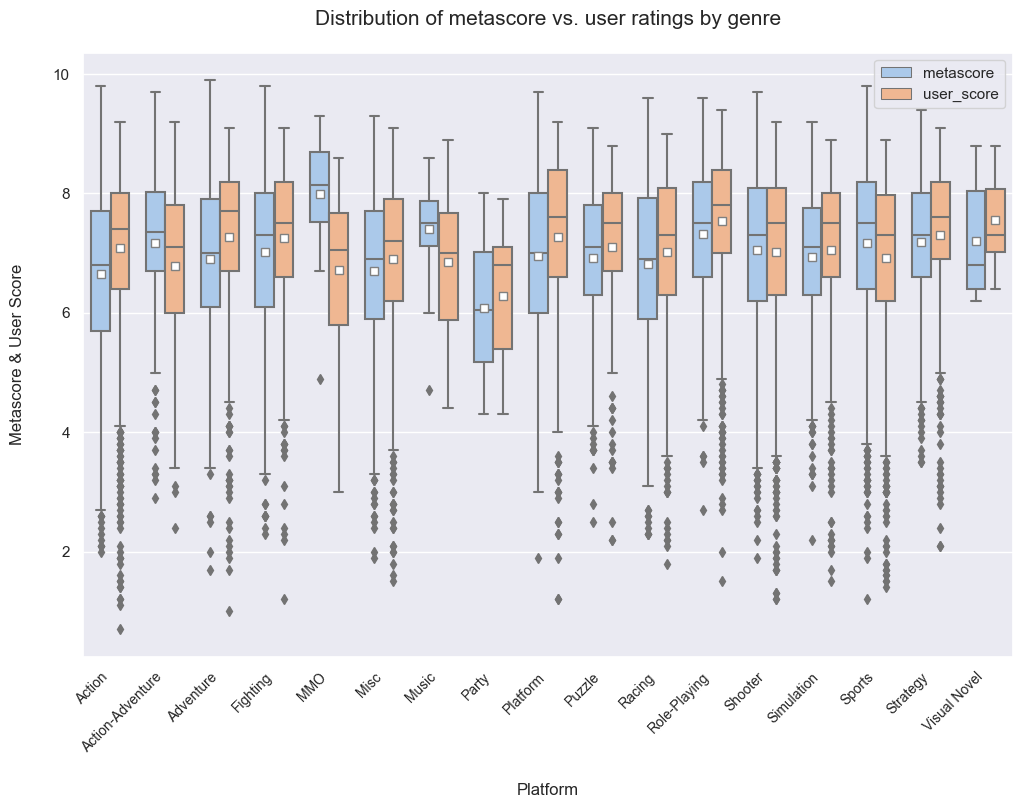

In [137]:
mdf = mdf[(mdf.genre != 'Board Game') & (mdf.genre != 'Education') & (mdf.genre != 'Sandbox')]

plt.figure(figsize=(12,8))

g = sns.boxplot(x='genre',y='value', hue='source', data=mdf.sort_values(by='genre'), showmeans=True, palette='pastel',width=0.7,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

plt.title('Distribution of metascore vs. user ratings by genre', size=15, pad=20)
plt.xlabel('Platform', labelpad=20)
plt.ylabel('Metascore & User Score', labelpad=20)
plt.xticks(size=10, rotation=45, ha='right')
plt.legend(title='')

plt.savefig('img/14.Boxplot_Metascore_genres_B.png', dpi=200)
plt.show()

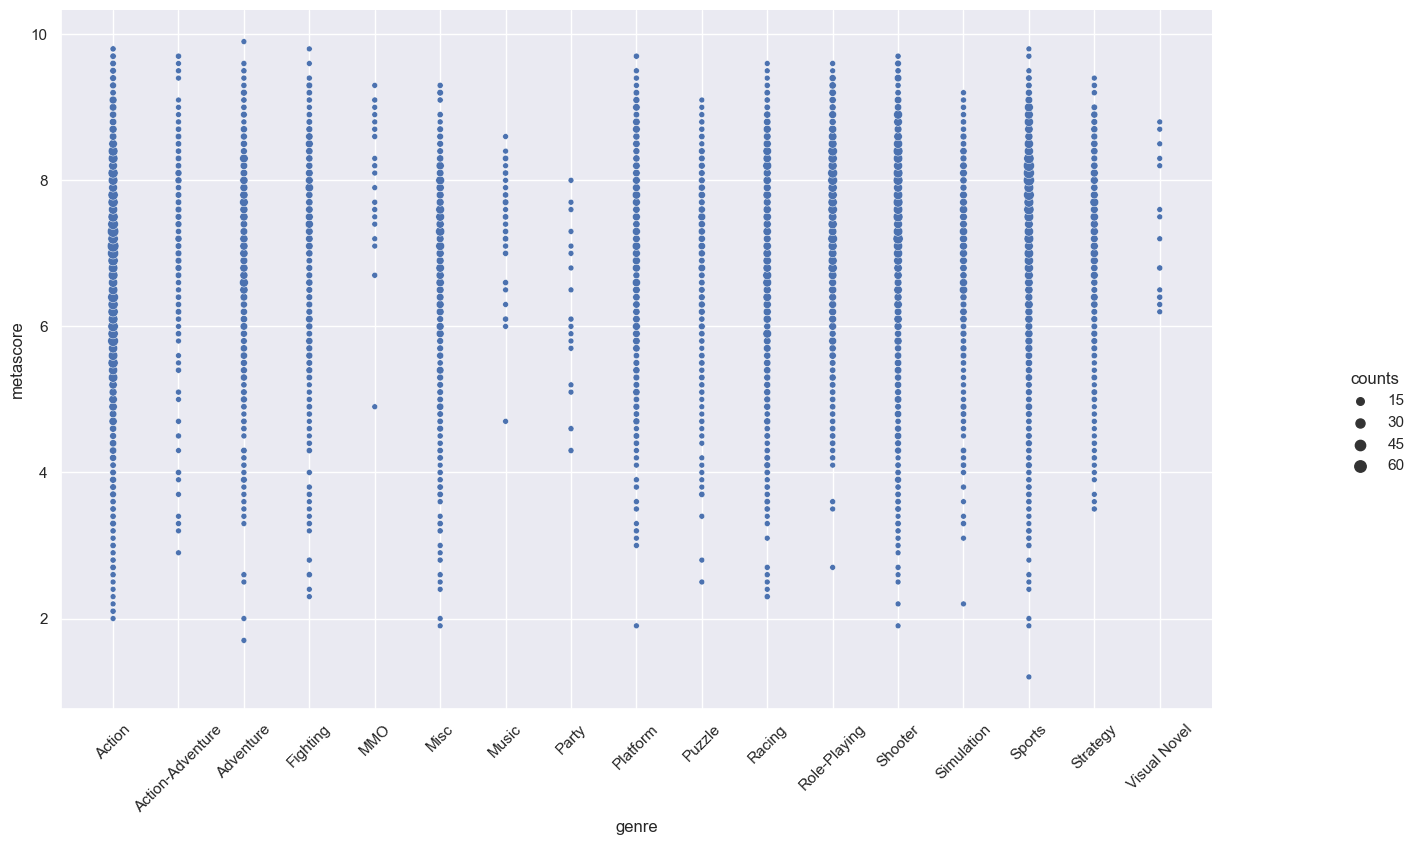

In [138]:
df_counts = df.groupby(['genre', 'metascore']).size().reset_index(name='counts')
df_counts = df_counts[(df_counts.genre != 'Board Game') & (df_counts.genre != 'Education') & (df_counts.genre != 'Sandbox')]

#plot  
g = sns.relplot(x= df_counts.genre, y=df_counts.metascore, size=df_counts.counts, palette="pastel")
g.fig.set_size_inches(15,8)

plt.xticks(rotation=45)

# Decoration
plt.show()

In [139]:
bethesda = df[(df['parent_platform'] == 'PlayStation') & (df['publisher'].str.contains('Bethesda'))]

In [140]:
no_bethesda = df[(df['parent_platform'] == 'PlayStation') & (~df["publisher"].str.contains('Bethesda'))]

In [141]:
beth_cdf = bethesda[['parent_platform','metascore','user_score']]
beth_mdf = pd.melt(beth_cdf, id_vars=['parent_platform'], var_name=['source']) 
beth_mdf['parent_platform'] = 'Bethesda'

In [142]:
no_beth_cdf = no_bethesda[['parent_platform','metascore','user_score']]
no_beth_mdf = pd.melt(no_beth_cdf, id_vars=['parent_platform'], var_name=['source']) 
no_beth_mdf['parent_platform'] = 'PS without Bethesda'

In [143]:
beth_boxplot = pd.concat([beth_mdf,no_beth_mdf]).sort_values(by='parent_platform', ascending=False)

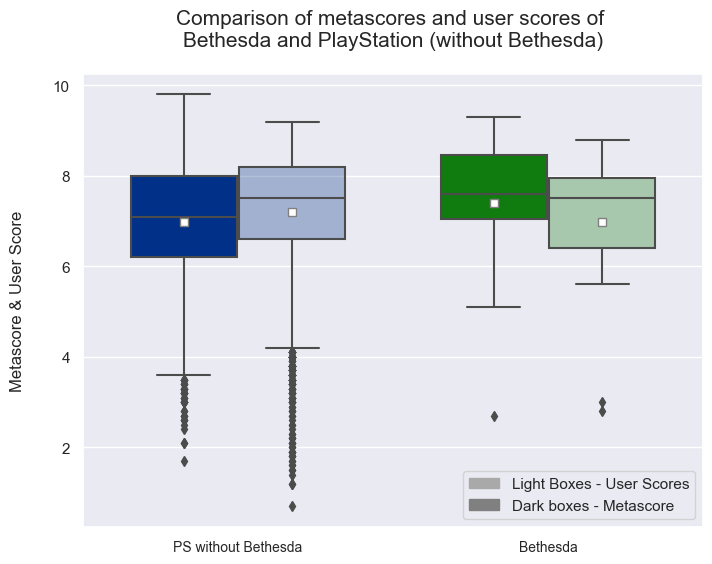

In [144]:
plt.figure(figsize=(8,6))

g = sns.boxplot(x='parent_platform',y='value', hue='source', data=beth_boxplot, showmeans=True, width=0.7,
            meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"grey"})

# add this in the visualization below
for i, color in zip(range((len(beth_boxplot.parent_platform.unique())*2)),colors[0:4]):
    mybox = g.artists[i]
    mybox.set_facecolor(color)  
    
plt.title('Comparison of metascores and user scores of \nBethesda and PlayStation (without Bethesda)', size=15, pad=20)
plt.xlabel('')
plt.ylabel('Metascore & User Score', labelpad=20)
plt.xticks(size=10)
plt.legend(title='')


dark = matplotlib.patches.Patch(color='gray', label='Dark boxes - Metascore')
light = matplotlib.patches.Patch(color='darkgray', label='Light Boxes - User Scores')
plt.legend(handles=[light, dark], loc='lower right')


plt.savefig('img/x.Bethesda_metascore_user_score.png', dpi=200)

plt.show()

In [145]:
#for c in g.get_children():
 #   if type(c) == matplotlib.patches.PathPatch:
  #      print(c.get_extents())

#for row in df.itertuples():
 #   name = row[1]
  #  val = row.metascore
   # if val > 8 or val < 2:
    #    plt.text(name, val, f' {row[1]}', ha='left', va='center')

<a id='ca'></a>

### Correspondence Analysis

[Link](https://codefying.com/2018/12/21/introduction-to-correspondence-analysis/)

In [386]:
df_crosstab = pd.crosstab(index=df['genre'], columns=df['rating'])
df_crosstab = df_crosstab[(df_crosstab.index != 'Board Game') & (df_crosstab.index != 'Education') & (df_crosstab.index != 'Sandbox') & (df_crosstab.index != 'Board Game')]
df_crosstab

rating               E  E10    M  RP    T
genre                                    
Action             237  280  612   4  627
Action-Adventure     6   57   92   1   37
Adventure          145  124  179   0  206
Fighting            11   21   46   0  422
MMO                  0    0    9   0   17
Misc               292  128   48   1  212
Music               10   23    1   1   19
Party                8    6    0   0    5
Platform           386  182    8   0   89
Puzzle             247   39    2   1   11
Racing             565  106   22   0  184
Role-Playing        97  133  232   4  508
Shooter             46   46  683   5  411
Simulation         187   59   11   1  213
Sports            1040  102   18   0  140
Strategy            81  112   46   3  249
Visual Novel         0    0   10   0    6

$\Large \chi^2 = \sum_I \sum_J  \frac{(n_{ij}  - \frac {n_i n_j}{n})^2} {\frac{n_i n_j}{n}}$ 

- $n$ is the total number of frequencies
- $n_{i,j}$ are the frequencies in row $n_i$ and column $n_j$
- $n_i$ total frequencies in row $i$
- $n_j$ total frequencies in column $j$
- The product of $n_{i.}$  and $n_{.j}$  normalised by $n$ is the expected frequency for $n_{ij}$  under the independence assumption.
- **Analysis:** The greater is $\chi^2$ , the greater is the certainty that the amount of games is different for each rating

In [387]:
import importlib
from src import correspondence_analysis

correspondence_analysis = importlib.reload(correspondence_analysis)

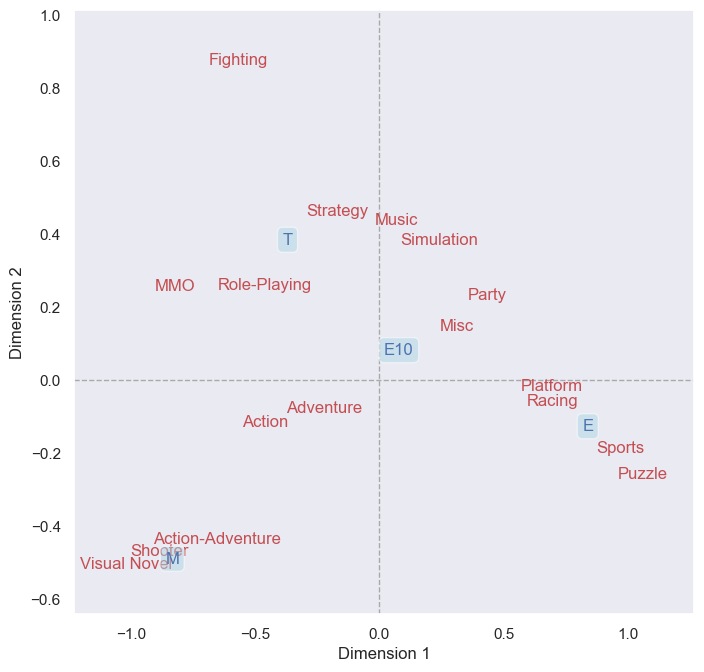

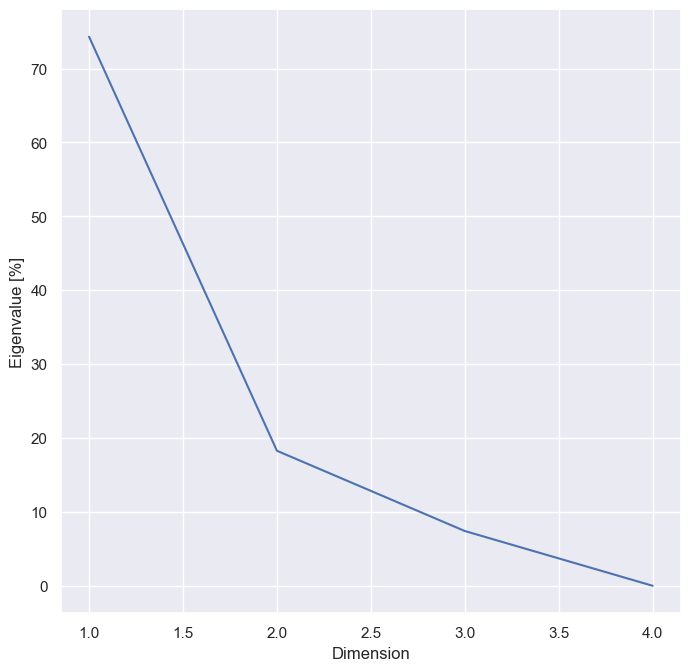

In [388]:
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})
correspondence_analysis._test(df_crosstab.drop('RP', axis=1))

In [389]:
coordinates_values = {'Action': [-0.45950725436456674, -0.1146575249730567],
 'Action-Adventure': [-0.6523864544702637, -0.4343342178815614],
 'Adventure': [-0.2215505907271853, -0.07746876700267871],
 'Fighting': [-0.5675171176849729, 0.8769634586636675],
 'MMO': [-0.820156763690407, 0.2580181997122175],
 'Misc': [0.3104190794179019, 0.1468328954520291],
 'Music': [0.05140525927698083, 0.430284287200385],
 'Party': [0.43556794056091086, 0.23223871865832876],
 'Platform': [0.6962442282747466, -0.01487545208243599],
 'Puzzle': [1.0543172511392727, -0.25550456706707997],
 'Racing': [0.7003945694495909, -0.08],
 'Role-Playing': [-0.46277696265986107, 0.2593724559941927],
 'Shooter': [-0.8853798619229137, -0.4659937684438681],
 'Simulation': [0.24110828561868583, 0.3847458996458157],
 'Sports': [0.9707392432311457, -0.1848787326566706],
 'Strategy': [-0.17380515085701218, 0.4603274661023641],
 'Visual Novel': [-1.0201956596108, -0.5032328209835083]}

In [390]:
genres = df[['parent_platform', 'genre']]
genres_grouped = pd.DataFrame(genres.groupby('parent_platform').genre.value_counts())
genres_grouped.columns = ['values']
genres_grouped = genres_grouped.reset_index()

genres_grouped = genres_grouped[(genres_grouped['genre'] != 'Board Game') 
               & (genres_grouped['genre'] !='Education') 
               & (genres_grouped['genre'] != 'Sandbox')]

coordinates_list = genres_grouped['genre'].map(coordinates_values)
genres_grouped['x'] = [x[0] for x in coordinates_list]
genres_grouped['y'] = [x[1] for x in coordinates_list]

genres_grouped['x_edited'] = genres_grouped['x']+0.1
genres_grouped['y_edited'] = genres_grouped['y']+0.1

genres_grouped = genres_grouped[genres_grouped['parent_platform'] == 'PlayStation']

genres_grouped = genres_grouped.sort_values(by='genre')

genres_grouped.head()

parent_platform             genre  values         x         y  x_edited  \
44     PlayStation            Action     670 -0.459507 -0.114658 -0.359507   
55     PlayStation  Action-Adventure      68 -0.652386 -0.434334 -0.552386   
51     PlayStation         Adventure     207 -0.221551 -0.077469 -0.121551   
49     PlayStation          Fighting     243 -0.567517  0.876963 -0.467517   
59     PlayStation               MMO       7 -0.820157  0.258018 -0.720157   

    y_edited  
44 -0.014658  
55 -0.334334  
51  0.022531  
49  0.976963  
59  0.358018

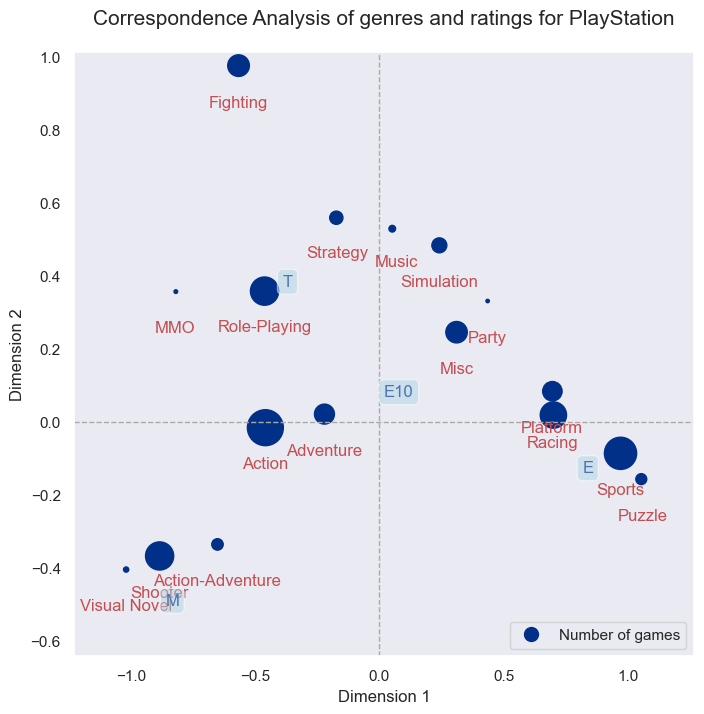

In [391]:
ca = correspondence_analysis.CA(df_crosstab.drop('RP', axis=1))
ca.plot(dictionary=False, sizes=True, df_size=genres_grouped, color=colors_platforms['PlayStation'])
plt.title('Correspondence Analysis of genres and ratings for PlayStation', fontsize=15, pad=20)
dots = matplotlib.lines.Line2D([], [], color=colors_platforms['PlayStation'], marker='o', linestyle='None', markersize=10, label='Number of games')
plt.legend(handles=[dots], loc='lower right')
plt.savefig('img/15.Correspondence_Analysis_PlayStation.png', dpi=200,transparent=True)

In [392]:
genres = df[['parent_platform', 'genre']]
genres_grouped = pd.DataFrame(genres.groupby('parent_platform').genre.value_counts())
genres_grouped.columns = ['values']
genres_grouped = genres_grouped.reset_index()

genres_grouped = genres_grouped[(genres_grouped['genre'] != 'Board Game') 
               & (genres_grouped['genre'] !='Education') 
               & (genres_grouped['genre'] != 'Sandbox')]

coordinates_list = genres_grouped['genre'].map(coordinates_values)
genres_grouped['x'] = [x[0] for x in coordinates_list]
genres_grouped['y'] = [x[1] for x in coordinates_list]

genres_grouped['x_edited'] = genres_grouped['x']+0.1
genres_grouped['y_edited'] = genres_grouped['y']+0.1

genres_grouped = genres_grouped[genres_grouped['parent_platform'] == 'Xbox']

genres_grouped = genres_grouped.sort_values(by='genre')

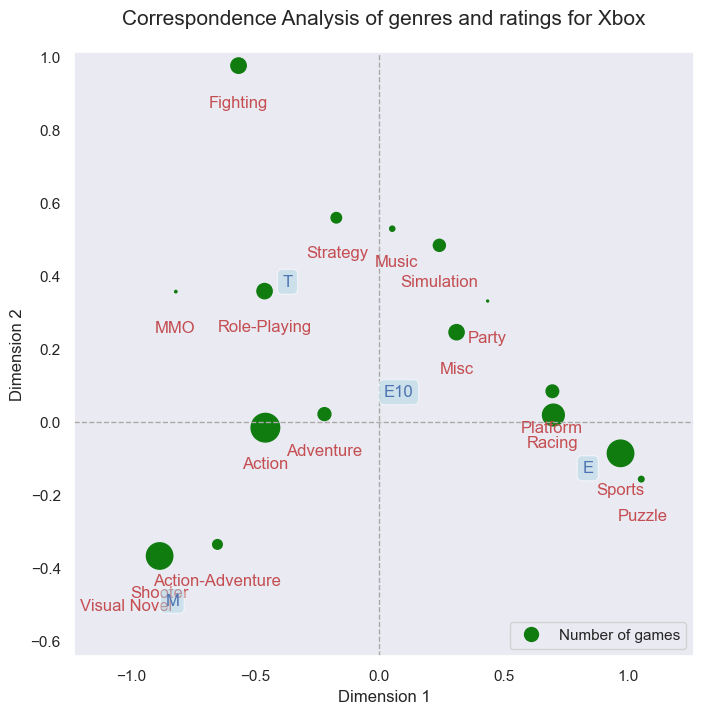

In [393]:
ca = correspondence_analysis.CA(df_crosstab.drop('RP', axis=1))
ca.plot(dictionary=False, sizes=True, df_size=genres_grouped, color=colors_platforms['Xbox'])
plt.title('Correspondence Analysis of genres and ratings for Xbox', fontsize=15, pad=20)
dots = matplotlib.lines.Line2D([], [], color=colors_platforms['Xbox'], marker='o', linestyle='None', markersize=10, label='Number of games')
plt.legend(handles=[dots], loc='lower right')
plt.savefig('img/15.Correspondence_Analysis_X_Box.png', dpi=200,transparent=True)

In [394]:
genres = df[['parent_platform', 'genre']]
genres_grouped = pd.DataFrame(genres.groupby('parent_platform').genre.value_counts())
genres_grouped.columns = ['values']
genres_grouped = genres_grouped.reset_index()

genres_grouped = genres_grouped[(genres_grouped['genre'] != 'Board Game') 
               & (genres_grouped['genre'] !='Education') 
               & (genres_grouped['genre'] != 'Sandbox')]

coordinates_list = genres_grouped['genre'].map(coordinates_values)
genres_grouped['x'] = [x[0] for x in coordinates_list]
genres_grouped['y'] = [x[1] for x in coordinates_list]

genres_grouped['x_edited'] = genres_grouped['x']+0.1
genres_grouped['y_edited'] = genres_grouped['y']+0.1

genres_grouped = genres_grouped[genres_grouped['parent_platform'] == 'Nintendo']

genres_grouped = genres_grouped.sort_values(by='genre')

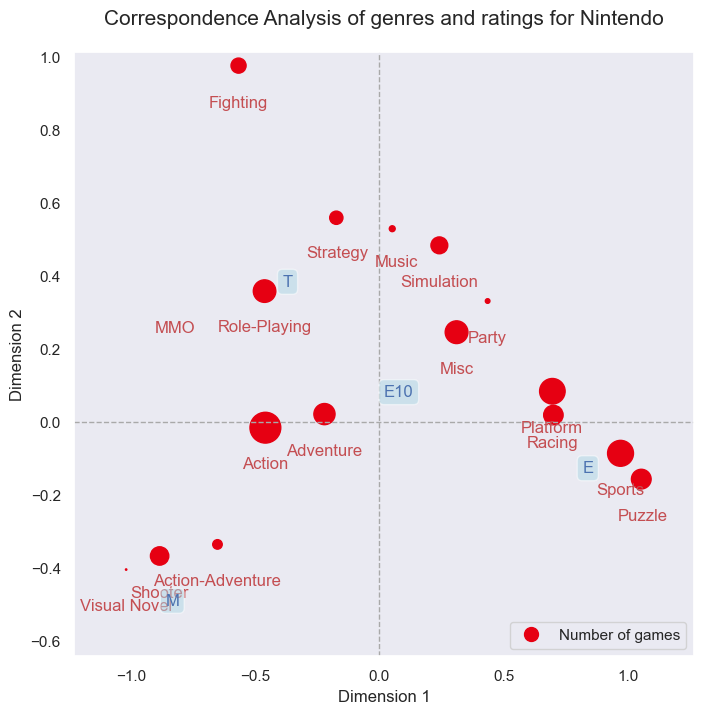

In [396]:
ca = correspondence_analysis.CA(df_crosstab.drop('RP', axis=1))
ca.plot(dictionary=False, sizes=True, df_size=genres_grouped, color=colors_platforms['Nintendo'])
plt.title('Correspondence Analysis of genres and ratings for Nintendo', fontsize=15, pad=20)
dots = matplotlib.lines.Line2D([], [], color=colors_platforms['Nintendo'], marker='o', linestyle='None', markersize=10, label='Number of games')
plt.legend(handles=[dots], loc='lower right')
plt.savefig('img/15.Correspondence_Analysis_Nintendo.png', dpi=200,transparent=True)

In [397]:
df_crosstab = pd.crosstab(index=df['genre'], columns=df['parent_platform'])
df_crosstab = df_crosstab[(df_crosstab.index != 'Board Game') & (df_crosstab.index != 'Education') & (df_crosstab.index != 'Sandbox') & (df_crosstab.index != 'Board Game') & (df_crosstab.index != 'Visual Novel')]
df_crosstab

parent_platform   Dreamcast  Nintendo   PC  PlayStation  Xbox
genre                                                        
Action                    0       492  208          670   423
Action-Adventure          0        47   45           68    48
Adventure                 1       232  163          207    86
Fighting                  3       118   14          243   123
MMO                       0         0   16            7     3
Misc                      0       268   98          238   120
Music                     0        18    3           23    14
Party                     0        11    1            6     2
Platform                  1       338   61          196    82
Puzzle                    0       201   34           62    16
Racing                    2       196   77          359   246
Role-Playing              4       263  198          414   121
Shooter                   1       175  261          411   361
Simulation                1       147  160          116    75
Sports                    1       348   64          538   362
Strategy                  0        91  283           91    57

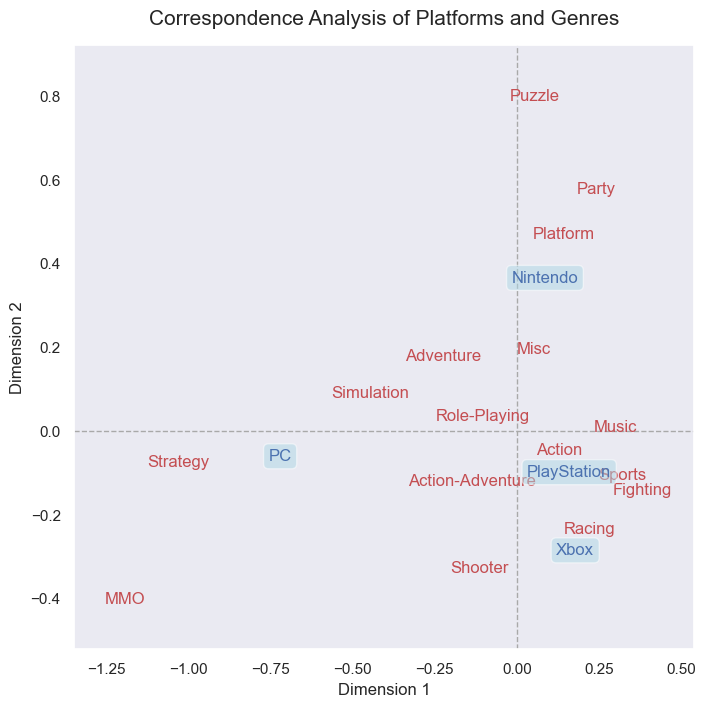

In [398]:
ca = correspondence_analysis.CA(df_crosstab.drop('Dreamcast', axis=1))
ca.plot()
plt.title('Correspondence Analysis of Platforms and Genres', size=15, pad=15)
plt.savefig('img/15.Correspondence_Analysis_Platforms_Genres.png', dpi=200, transparent = True)

In [338]:
coordinates_values = {'Action': [0.13022881607788775, -0.046687559902335425], 'Action-Adventure': [-0.13602461945903474, -0.11992267003340809], 'Adventure': [-0.22470932817503161, 0.17850665957399525], 'Fighting': [0.38232295406464784, -0.14090429030217821], 'MMO': [-1.1926597668508152, -0.40179958629175827], 'Misc': [0.05055496290849547, 0.19433774461554645], 'Music': [0.2997927572201837, 0.00798527864585018], 'Party': [0.24092482644021862, 0.5768457724160737], 'Platform': [0.1431106363708552, 0.46945054642916895], 'Puzzle': [0.054828547230930676, 0.8006910929476216], 'Racing': [0.22282045717467122, -0.18351533802743572], 'Role-Playing': [-0.1026777214433956, 0.03485608273803156], 'Shooter': [-0.11253217659413693, -0.32817943314404685], 'Simulation': [-0.4465466790273843, 0.09131041990485056], 'Sports': [0.3203570208486828, -0.10570748876136507], 'Strategy': [-1.031051644052409, -0.07396449554842378]}

In [340]:
platforms = df[['parent_platform', 'genre']]
platforms_grouped = pd.DataFrame(platforms.groupby('parent_platform').genre.value_counts())
platforms_grouped.columns = ['values']
platforms_grouped = platforms_grouped.reset_index()

platforms_grouped = platforms_grouped[(platforms_grouped['genre'] != 'Board Game') 
               & (platforms_grouped['genre'] !='Education') 
               & (platforms_grouped['genre'] != 'Sandbox')
               & (platforms_grouped['genre'] != 'Visual Novel')]


coordinates_list = platforms_grouped['genre'].map(coordinates_values)
platforms_grouped['x'] = [x[0] for x in coordinates_list]
platforms_grouped['y'] = [x[1] for x in coordinates_list]

platforms_grouped['x_edited'] = platforms_grouped['x']+0.1
platforms_grouped['y_edited'] = platforms_grouped['y']+0.1

platforms_grouped = platforms_grouped[platforms_grouped['parent_platform'] == 'PlayStation']

platforms_grouped = platforms_grouped.sort_values(by='genre')

platforms_grouped.head()

parent_platform             genre  values         x         y  x_edited  \
44     PlayStation            Action     670  0.130229 -0.046688  0.230229   
55     PlayStation  Action-Adventure      68 -0.136025 -0.119923 -0.036025   
51     PlayStation         Adventure     207 -0.224709  0.178507 -0.124709   
49     PlayStation          Fighting     243  0.382323 -0.140904  0.482323   
59     PlayStation               MMO       7 -1.192660 -0.401800 -1.092660   

    y_edited  
44  0.053312  
55 -0.019923  
51  0.278507  
49 -0.040904  
59 -0.301800

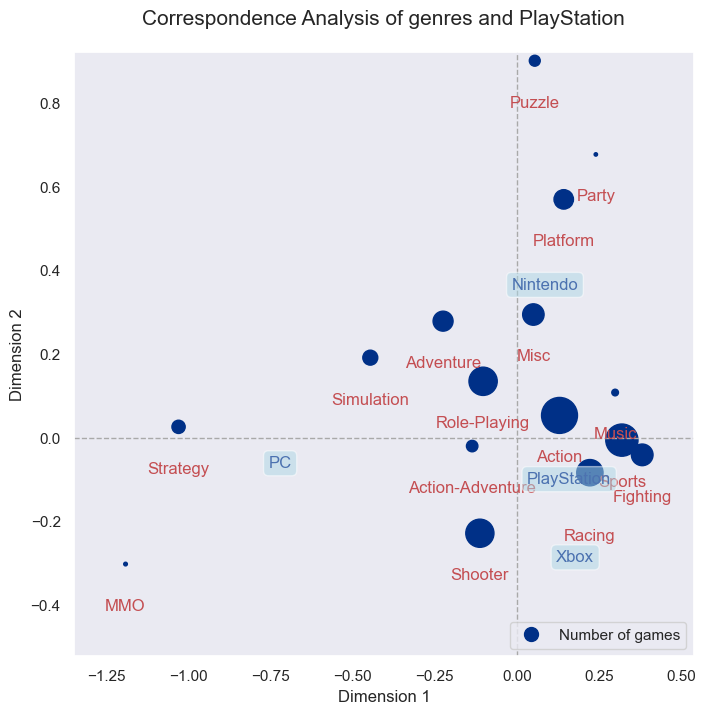

In [346]:
ca = correspondence_analysis.CA(df_crosstab.drop('Dreamcast', axis=1))
ca.plot(dictionary=False, sizes=True, df_size=platforms_grouped, color=colors_platforms['PlayStation'])
plt.title('Correspondence Analysis of genres and PlayStation', fontsize=15, pad=20)
dots = matplotlib.lines.Line2D([], [], color=colors_platforms['PlayStation'], marker='o', linestyle='None', markersize=10, label='Number of games')
plt.legend(handles=[dots], loc='lower right')
#plt.savefig('img/15.Correspondence_Analysis_Nintendo.png')

In [239]:
df_crosstab = pd.crosstab(index=df['players_category'], columns=df['parent_platform'])
df_crosstab

parent_platform   Dreamcast  Nintendo   PC  PlayStation  Xbox
players_category                                             
1                         0       548  172          631   277
13 to 24                  0        17   50          152   139
2 to 4                    2       998  109         1218   683
25 to 64                  0         2   44           30    14
5 to 12                   0        82  146          466   262
64+                       0         1   32           11     5
Not Specified             0       473  597          458   223

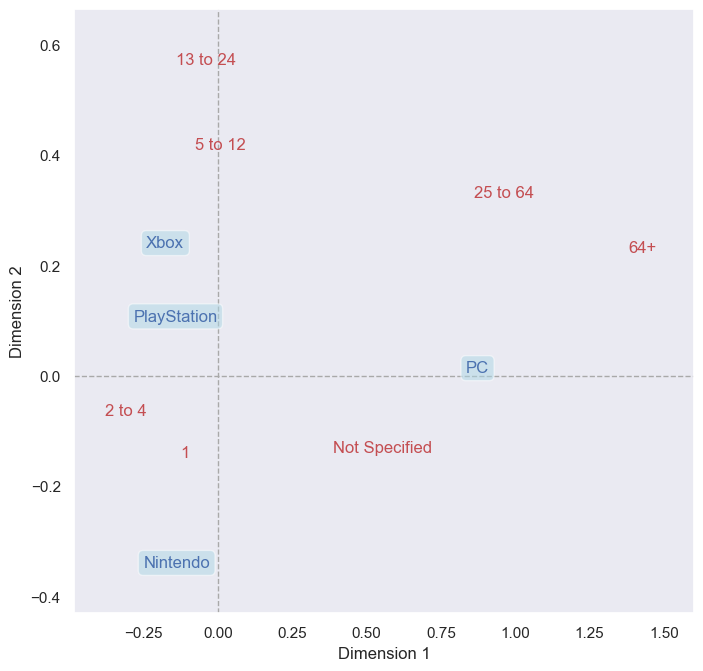

In [240]:
ca = correspondence_analysis.CA(df_crosstab.drop('Dreamcast', axis=1))
ca.plot()

<a id=time></a>

### Time Series

In [585]:
import datetime

In [586]:
time = df[['release_date','genre','parent_platform','global_sales','metascore','user_score']]

time = time.set_index('release_date')
time = time.sort_index()
time = time[time['global_sales'].notna()]
time.index = pd.to_datetime(time.index)

In [587]:
year = time.resample('Y').mean()
counter = time.resample('Y').count()['metascore']

<Figure size 2400x800 with 0 Axes>

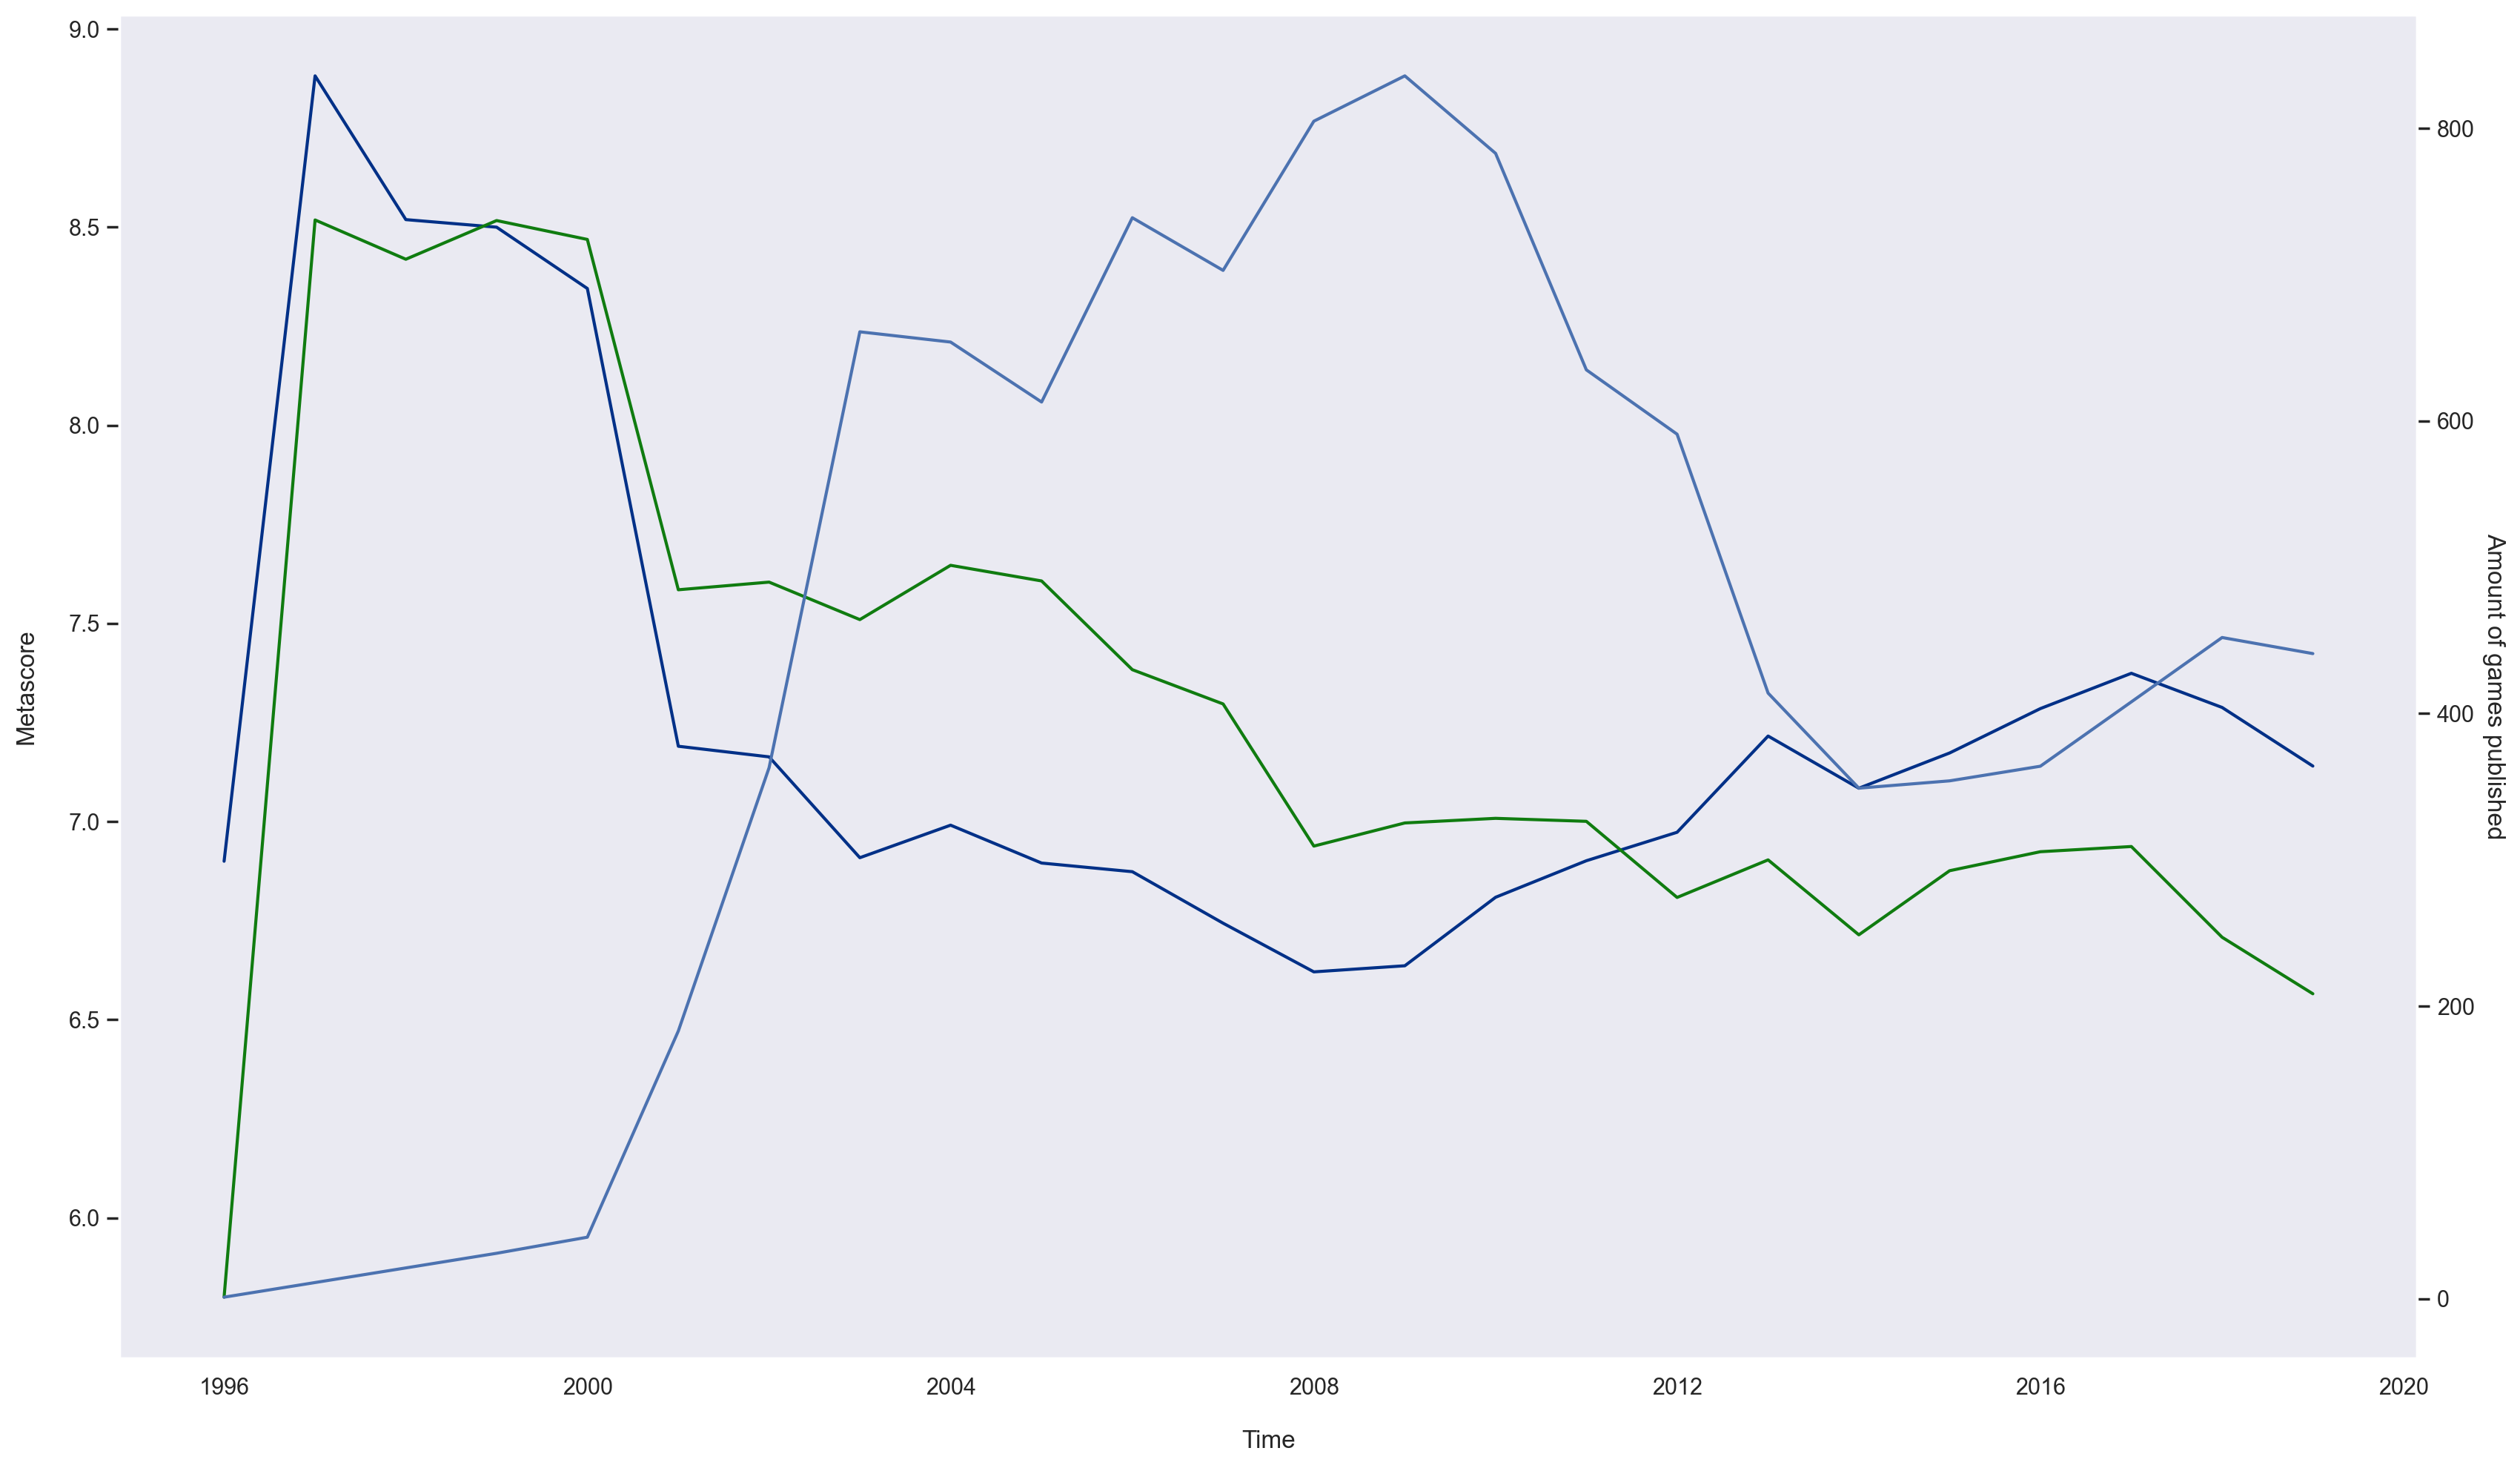

In [588]:
plt.figure(figsize=(12,4))
fig, ax = plt.subplots()
ax.plot(year['metascore'], data=year, color=colors_platforms['PlayStation'], label = 'average metascore')
ax.plot(year['user_score'], data=year, color=colors_platforms['Xbox'], label = 'average user score')

ax2 = ax.twinx()
ax2.plot(counter)

ax.grid()
ax2.grid()
ax.set_xlabel('Time', labelpad=15)
ax.set_ylabel('Metascore', labelpad=15)
ax2.set_ylabel('Amount of games published', rotation=270, labelpad=15)
plt.savefig('img/16.Evolution_Metascore.png', dpi=200)
plt.show()


In [589]:
change_genres = {'Action':'Action', 'Adventure':'Adventure', 'Platform':'Platform', 'Fighting':'Fighting',
                 'Racing':'Racing', 'Role-Playing':'Role-Playing', 'Shooter':'Shooter', 'Action-Adventure':'Other',
                 'Sports':'Sports','Board Game':'Other', 'Education':'Other','Misc':'Other', 'MMO':'Other', 
                 'Music':'Other','Party':'Other', 'Sandbox':'Other','Visual Novel':'Other',
                 'Strategy':'Other','Puzzle':'Other', 'Simulation':'Other'}

time['genre'] = time.genre.map(change_genres)

In [590]:
time_genres = time.groupby([(time.index.year//10)*10,'genre']).mean()
time_genres = time_genres.reset_index(level=[1])

In [591]:
y90s = time_genres[time_genres.index == 1990]
y00s = time_genres[time_genres.index == 2000]
y10s = time_genres[time_genres.index == 2010]

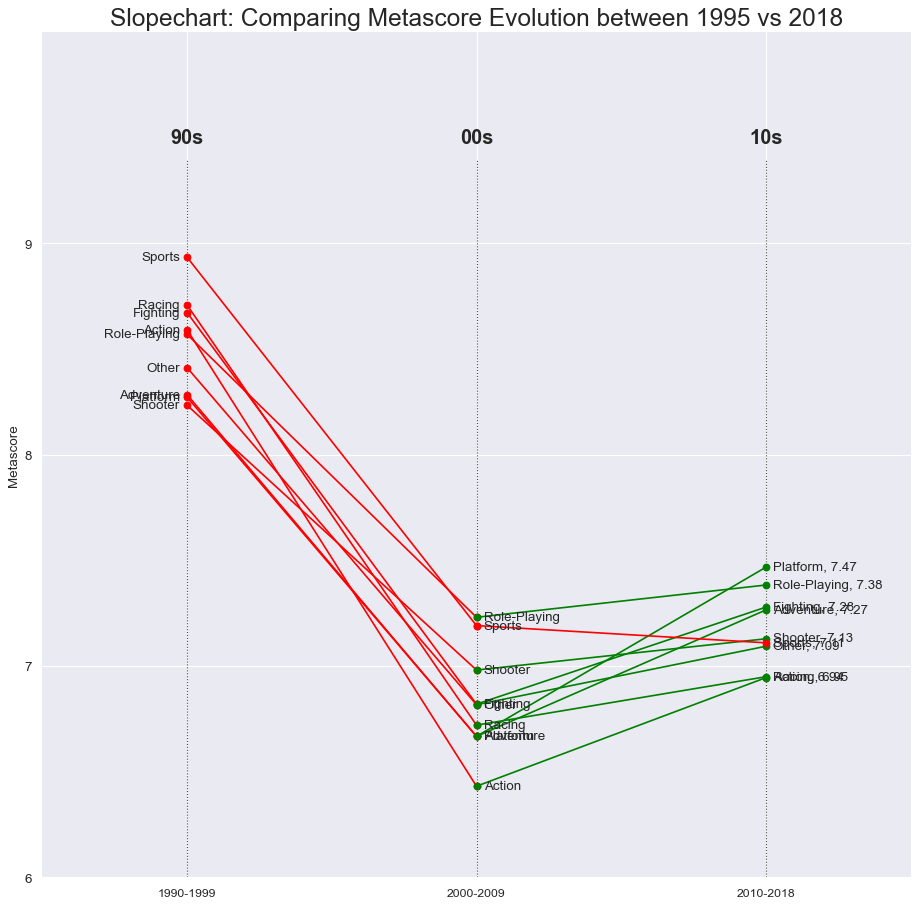

In [592]:
import matplotlib.lines as mlines

left_label = [str(c) for c, y in zip(y90s.genre, y90s['metascore'])] #  + ', '+ str(round(y,2))
right_label = [str(c) for c, y in zip(y00s.genre, y00s['metascore'])] # + ', '+ str(round(y,2))
outer_label = [str(c) for c, y in zip(y10s.genre, y10s['metascore'])] # + ', '+ str(round(y,2))
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(y90s['metascore'], y00s['metascore'])]
klass2 = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(y00s['metascore'], y10s['metascore'])]

# draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=6, ymax=9.4, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=6, ymax=9.4, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=5, ymin=6, ymax=9.4, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=y90s['metascore'], x=np.repeat(1, y90s.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=y00s['metascore'], x=np.repeat(3, y00s.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=y10s['metascore'], x=np.repeat(5, y10s.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, p3, c in zip(y90s['metascore'], y00s['metascore'], y10s['metascore'], y10s.genre):
    newline([1,p1], [3,p2])
    newline([3,p2], [5,p3])
    ax.text(1-0.05, p1, c, horizontalalignment='right', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p1))
    ax.text(3+0.05, p2, c, horizontalalignment='left', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p2))
    ax.text(5+0.05, p3, c + ', ' + str(round(p3,2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':12})

        
# 'Before' and 'After' Annotations
ax.text(1, 9.5, '90s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3, 9.5, '00s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(5, 9.5, '10s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Metascore Evolution between 1995 vs 2018", fontdict={'size':22})
ax.set(xlim=(0,6), ylim=(6,10), ylabel='Metascore')
ax.set_xticks([1,3,5])
ax.set_xticklabels(["1990-1999", "2000-2009", "2010-2018"])
plt.yticks(np.arange(6, 10, 1), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('img/17.Slope_Chart_Metascore.png', dpi=200)
plt.show()

In [597]:
y10s

genre  global_sales  metascore  user_score
release_date                                                   
2010                Action      0.687273   6.944920    6.927524
2010             Adventure      0.399919   7.265182    7.370435
2010              Fighting      0.576649   7.278534    7.003175
2010                 Other      0.568578   7.093401    6.786457
2010              Platform      0.823602   7.467299    7.262802
2010                Racing      0.608354   6.949383    6.462661
2010          Role-Playing      0.637091   7.383232    7.292886
2010               Shooter      1.350113   7.128894    6.506422
2010                Sports      0.883729   7.109887    6.015060

In [606]:
y00s['y_meta'] = [6.5,6.88,6.84, 6.80, 6.66, 6.72, 7.24, 6.98, 7.18]
y10s['y_meta'] = [7.01, 7.26, 7.3, 7.06, 7.47, 6.94, 7.385, 7.16, 7.11]

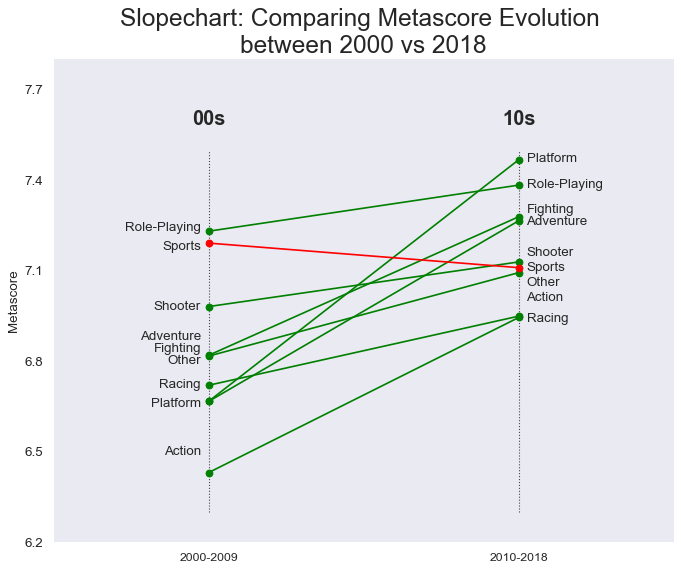

In [607]:
import matplotlib.lines as mlines

left_label = [str(c) for c, y in zip(y00s.genre, y00s['metascore'])] # + ', '+ str(round(y,2))
right_label = [str(c) for c, y in zip(y10s.genre, y10s['metascore'])] # + ', '+ str(round(y,2))
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(y00s['metascore'], y10s['metascore'])]

# draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,8), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=6.3, ymax=7.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=6.3, ymax=7.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=y00s['metascore'], x=np.repeat(1, y00s.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=y10s['metascore'], x=np.repeat(3, y10s.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c, ys, ys2 in zip(y00s['metascore'], y10s['metascore'], y10s.genre, y00s['y_meta'], y10s['y_meta']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, ys, c, horizontalalignment='right', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p1))
    ax.text(3+0.05, ys2, c, horizontalalignment='left', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p2))
        
# 'Before' and 'After' Annotations
ax.text(1, 7.6, '00s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3, 7.6, '10s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing Metascore Evolution \nbetween 2000 vs 2018", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(6.2,7.8), ylabel='Metascore')
ax.set_xticks([1,3])
ax.set_xticklabels(["2000-2009", "2010-2018"])
ax.grid()
plt.yticks(np.arange(6.2, 7.8, 0.3), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('img/18.Slope_Chart_Metascore_simplified_metascore.png', dpi=200, transparent=True)
plt.show()



In [614]:
y10s

genre  global_sales  metascore  user_score  y_meta  \
release_date                                                              
2010                Action      0.687273   6.944920    6.927524   7.010   
2010             Adventure      0.399919   7.265182    7.370435   7.260   
2010              Fighting      0.576649   7.278534    7.003175   7.300   
2010                 Other      0.568578   7.093401    6.786457   7.060   
2010              Platform      0.823602   7.467299    7.262802   7.470   
2010                Racing      0.608354   6.949383    6.462661   6.940   
2010          Role-Playing      0.637091   7.383232    7.292886   7.385   
2010               Shooter      1.350113   7.128894    6.506422   7.160   
2010                Sports      0.883729   7.109887    6.015060   7.110   

              y_user  
release_date          
2010            6.96  
2010            7.16  
2010            7.00  
2010            6.80  
2010            7.24  
2010            6.45  
2010            7.30  
2010            6.51  
2010            6.00

In [617]:
y00s['y_user'] = [6.95, 7.03, 7.50, 7.26, 7.11, 7.18, 7.76, 7.42, 7.34]
y10s['y_user'] = [6.90,7.4,7.0, 6.8, 7.2, 6.45, 7.3, 6.51, 6.0]

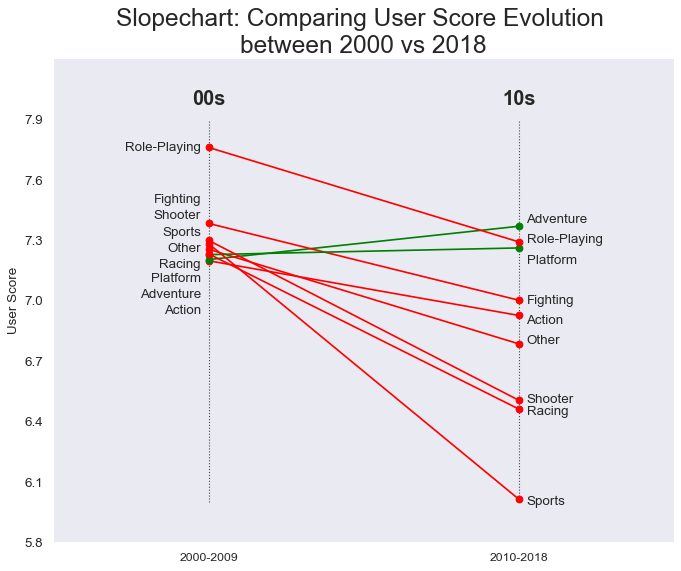

In [618]:
import matplotlib.lines as mlines

left_label = [str(c) for c, y in zip(y00s.genre, y00s['user_score'])] # + ', '+ str(round(y,2))
right_label = [str(c) for c, y in zip(y10s.genre, y10s['user_score'])] # + ', '+ str(round(y,2))
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(y00s['user_score'], y10s['user_score'])]

# draw line
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(10,8), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=6, ymax=7.9, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=6, ymax=7.9, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=y00s['user_score'], x=np.repeat(1, y00s.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=y10s['user_score'], x=np.repeat(3, y10s.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c, ys, ys2 in zip(y00s['user_score'], y10s['user_score'], y10s.genre, y00s['y_user'], y10s['y_user']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, ys, c, horizontalalignment='right', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p1))
    ax.text(3+0.05, ys2, c, horizontalalignment='left', verticalalignment='center', fontdict={'size':12}) # + ', ' + str(round(p2))
        
# 'Before' and 'After' Annotations
ax.text(1, 8.0, '00s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3, 8.0, '10s', horizontalalignment='center', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing User Score Evolution \nbetween 2000 vs 2018", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(5.8,8.2), ylabel='User Score')
ax.set_xticks([1,3])
ax.set_xticklabels(["2000-2009", "2010-2018"])
ax.grid()
plt.yticks(np.arange(5.8, 8.2, 0.3), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.savefig('img/18.Slope_Chart_User_Score_simplified.png', dpi=200, transparent=True)
plt.show()

In [378]:
df_release = df[['release_date','parent_platform','genre']] 
df_release['release_date'] = pd.to_datetime(df_release['release_date'])

In [379]:
df_release = df_release.set_index('release_date')

change_genres = {'Action':'Action', 'Adventure':'Adventure', 'Platform':'Platform', 'Fighting':'Fighting',
                 'Racing':'Racing', 'Role-Playing':'Role-Playing', 'Shooter':'Shooter', 'Action-Adventure':'Other',
                 'Sports':'Sports','Board Game':'Other', 'Education':'Other','Misc':'Other', 'MMO':'Other', 
                 'Music':'Other','Party':'Other', 'Sandbox':'Other','Visual Novel':'Other',
                 'Strategy':'Other','Puzzle':'Other', 'Simulation':'Other'}

df_release['genre'] = df_release.genre.map(change_genres)

In [380]:
release_total = df_release.drop('parent_platform', axis=1).groupby('genre').resample('Y').count()
release_total.columns = ['count']

In [381]:
release_total = release_total.reset_index(level=0).pivot(columns='genre').droplevel(level=0, axis=1)
release_total = release_total.rolling(window=3).mean()
release_total = release_total.fillna(0)

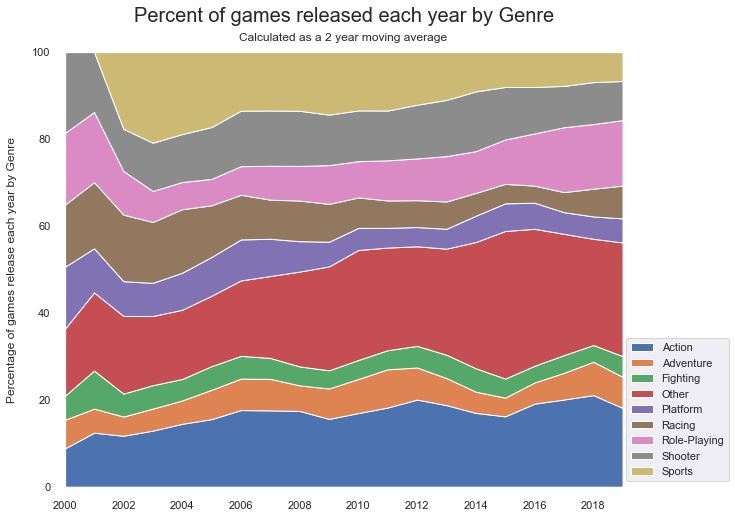

In [382]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = release_total.divide(release_total.sum(axis=1), axis=0)
data_perc = data_perc.iloc[4:,:].multiply(100)
 
# Make the plot
plt.figure(figsize=(10,8))
plt.stackplot(data_perc.index,  
              data_perc["Action"],  
              data_perc["Adventure"],  
              data_perc["Fighting"], 
              data_perc["Other"], 
              data_perc["Platform"], 
              data_perc["Racing"], 
              data_perc["Role-Playing"],               
              data_perc["Shooter"], 
              data_perc["Sports"],               
              labels=data_perc.columns)

plt.ylabel('Percentage of games release each year by Genre', labelpad=15)
plt.figtext(.512,.90,'Calculated as a 2 year moving average',fontsize=12,ha='center')
plt.legend(loc='lower right',bbox_to_anchor=(0.7, 0., 0.5, 0.5))
plt.margins(0,0)
plt.title('Percent of games released each year by Genre', fontsize=20, pad=30)
plt.savefig('img/25.Percent_Released_Games_By_Genre_Total.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [383]:
release_ps = df_release[df_release['parent_platform']=='PlayStation'].drop('parent_platform', axis=1).groupby('genre').resample('Y').count()
release_ps.columns = ['count']
release_ps = release_ps.reset_index(level=0).pivot(columns='genre').droplevel(level=0, axis=1)
release_ps = release_ps.rolling(window=3).mean()
release_ps = release_ps.fillna(0)

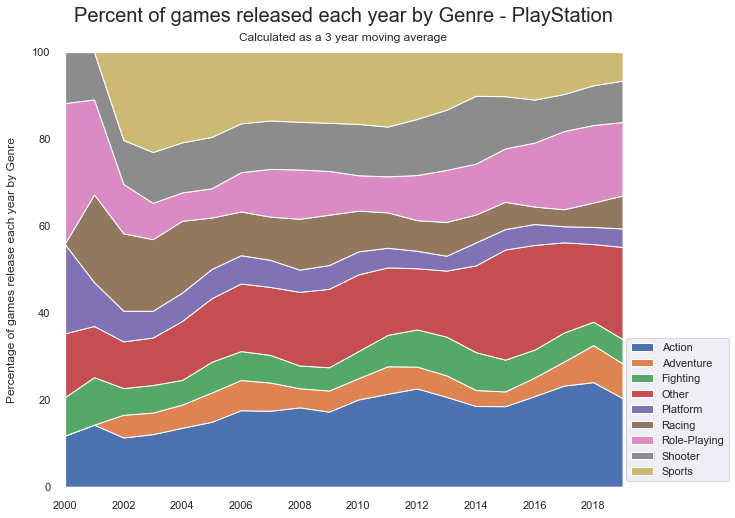

In [384]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = release_ps.divide(release_ps.sum(axis=1), axis=0)
data_perc = data_perc.iloc[4:,:].multiply(100)
 
# Make the plot
plt.figure(figsize=(10,8))
plt.stackplot(data_perc.index,  
              data_perc["Action"],  
              data_perc["Adventure"],  
              data_perc["Fighting"], 
              data_perc["Other"], 
              data_perc["Platform"], 
              data_perc["Racing"], 
              data_perc["Role-Playing"],               
              data_perc["Shooter"], 
              data_perc["Sports"],               
              labels=data_perc.columns)

plt.ylabel('Percentage of games release each year by Genre', labelpad=15)
plt.legend(loc='lower right',bbox_to_anchor=(0.7, 0., 0.5, 0.5))
plt.margins(0,0)
plt.title('Percent of games released each year by Genre - PlayStation', fontsize=20, pad=30)
plt.figtext(.512,.90,'Calculated as a 3 year moving average',fontsize=12,ha='center')
plt.savefig('img/25.Percent_Released_Games_By_Genre_PlayStation.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [385]:
release_nt = df_release[df_release['parent_platform']=='Nintendo'].drop('parent_platform', axis=1).groupby('genre').resample('Y').count()
release_nt.columns = ['count']
release_nt = release_nt.reset_index(level=0).pivot(columns='genre').droplevel(level=0, axis=1)
release_nt = release_nt.rolling(window=3).mean()
release_nt = release_nt.fillna(0)

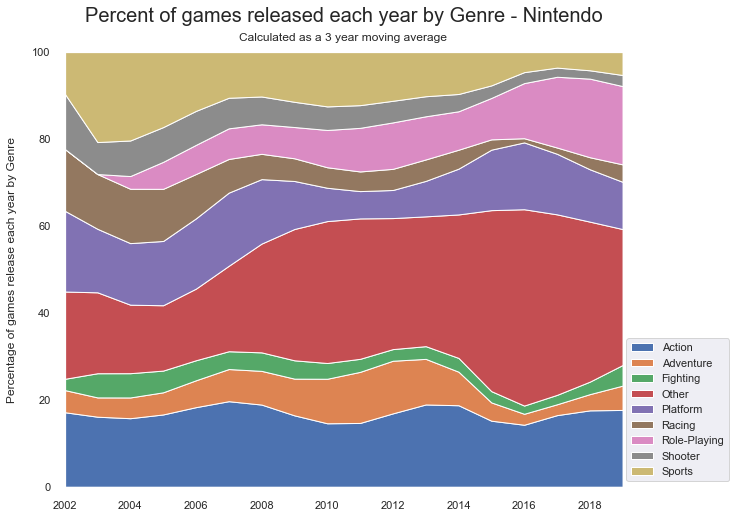

In [386]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = release_nt.divide(release_nt.sum(axis=1), axis=0)
data_perc = data_perc.rolling(window=2).mean()
data_perc = data_perc.iloc[5:,:].multiply(100)
 
# Make the plot
plt.figure(figsize=(10,8))
plt.stackplot(data_perc.index,  
              data_perc["Action"],  
              data_perc["Adventure"],  
              data_perc["Fighting"], 
              data_perc["Other"], 
              data_perc["Platform"], 
              data_perc["Racing"], 
              data_perc["Role-Playing"],               
              data_perc["Shooter"], 
              data_perc["Sports"],               
              labels=data_perc.columns)

plt.ylabel('Percentage of games release each year by Genre', labelpad=15)
plt.legend(loc='lower right',bbox_to_anchor=(0.7, 0., 0.5, 0.5))
plt.margins(0,0)
plt.title('Percent of games released each year by Genre - Nintendo', fontsize=20, pad=30)
plt.figtext(.512,.90,'Calculated as a 3 year moving average',fontsize=12,ha='center')
plt.savefig('img/25.Percent_Released_Games_By_Genre_Nintendo.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [387]:
release_xb = df_release[df_release['parent_platform']=='Xbox'].drop('parent_platform', axis=1).groupby('genre').resample('Y').count()
release_xb.columns = ['count']
release_xb = release_xb.reset_index(level=0).pivot(columns='genre').droplevel(level=0, axis=1)
release_xb = release_xb.rolling(window=3).mean()
release_xb = release_xb.fillna(0)

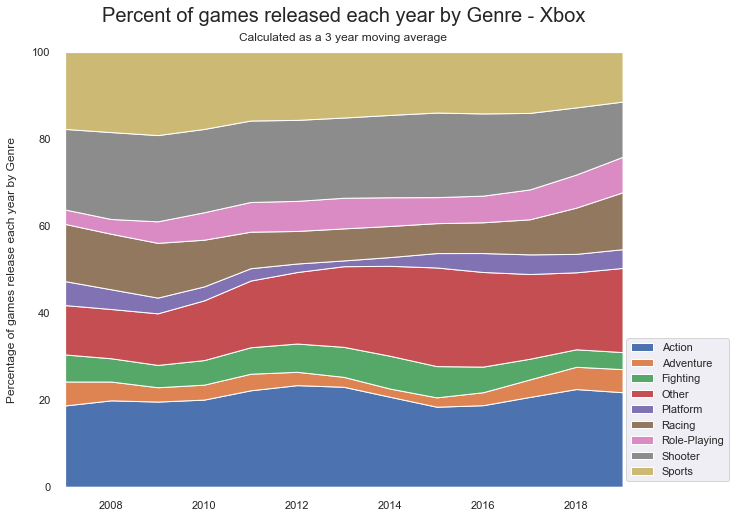

In [388]:
# We need to transform the data from raw data to percentage (fraction)
data_perc = release_xb.divide(release_xb.sum(axis=1), axis=0)
data_perc = data_perc.rolling(window=2).mean()
data_perc = data_perc.iloc[5:,:].multiply(100)
 
# Make the plot
plt.figure(figsize=(10,8))
plt.stackplot(data_perc.index,  
              data_perc["Action"],  
              data_perc["Adventure"],  
              data_perc["Fighting"], 
              data_perc["Other"], 
              data_perc["Platform"], 
              data_perc["Racing"], 
              data_perc["Role-Playing"],               
              data_perc["Shooter"], 
              data_perc["Sports"],               
              labels=data_perc.columns)

plt.ylabel('Percentage of games release each year by Genre', labelpad=15)
plt.legend(loc='lower right',bbox_to_anchor=(0.7, 0., 0.5, 0.5))
plt.margins(0,0)
plt.title('Percent of games released each year by Genre - Xbox', fontsize=20, pad=30)
plt.figtext(.512,.90,'Calculated as a 3 year moving average',fontsize=12,ha='center')
plt.savefig('img/25.Percent_Released_Games_By_Genre_Xbox.png', dpi=200,  transparent=True, bbox_inches='tight')
plt.show()

<a id=pareto></a>

### Pareto Distributions

In [9]:
dfs = []
for platform in df.parent_platform.unique():
    dfs.append(df[df['parent_platform'] == platform])

In [10]:
df_Nintendo = dfs[0].set_index('Unnamed: 0')
df_PC = dfs[1].set_index('Unnamed: 0')
df_Xbox = dfs[2].set_index('Unnamed: 0')
df_PS = dfs[3].set_index('Unnamed: 0')
df_Dream = dfs[4].set_index('Unnamed: 0')

In [11]:
percent = 2000 / df_PS['global_sales'].sum()

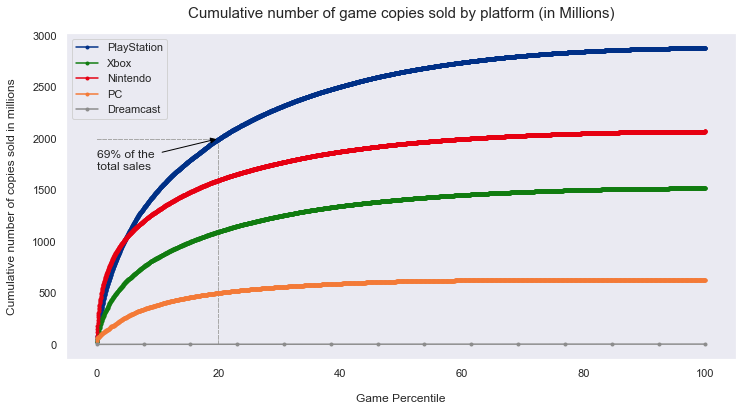

In [12]:
plt.figure(figsize=(12,6))

for dataframe, (platform, color) in zip([df_PS, df_Xbox, df_Nintendo, df_PC, df_Dream], colors_platforms.items()):

    x = np.linspace(0,100,len(dataframe['global_sales'].cumsum()))
    y = dataframe['global_sales'].cumsum()

    plt.plot(x, y, marker='.', linestyle='solid', color=color, label=platform)

    plt.title('Cumulative number of game copies sold by platform (in Millions)', size=15, pad=15)
    plt.legend()
    plt.xlabel('Game Percentile', labelpad=15)
    plt.ylabel('Cumulative number of copies sold in millions', labelpad=15)
    plt.hlines(2000, xmax=20, xmin=0, linewidth=1, linestyle='dashed', color='darkgray')
    plt.vlines(20, ymax=2000, ymin=0, linewidth=1, linestyle='dashed', color='darkgray')
    plt.grid()
    
    if platform == 'PlayStation':
        plt.annotate('{:.0%} of the \ntotal sales'.format(percent), xy=(20,2000), xytext=(0,1700), arrowprops=dict(arrowstyle="-|>", color='black'))

plt.savefig('img/19.Pareto_chart.png', transparent=True, dpi=200)
plt.show()

In [13]:
df_PS.tail()

name     genre parent_platform  \
Unnamed: 0                                                                
10962       Zero Escape: Virtue's Last Reward      Misc     PlayStation   
10985                         #killallzombies    Action     PlayStation   
12155                              Final Exam      Misc     PlayStation   
13721                         Sonic Adventure  Platform     PlayStation   
15346                                 Thumper    Action     PlayStation   

           platform               publisher    developer release_date rating  \
Unnamed: 0                                                                     
10962          VITA             Aksys Games      Unknown   2012-10-23      M   
10985           PS4             Beatshapers  Beatshapers   2014-10-28      T   
12155           PS3  Focus Home Interactive      Unknown   2013-11-05      T   
13721           PS3                    Sega   Sonic Team   2010-09-21      E   
15346           PS4                 Unknown        Drool   2016-10-10    E10   

            global_sales  NA_sales  ...  critic_positive  critic_neutral  \
Unnamed: 0                          ...                                    
10962               0.00       NaN  ...               28               4   
10985               0.00       NaN  ...                0               6   
12155               1.29      0.11  ...                3               7   
13721               0.54      0.08  ...                1              11   
15346               0.04      0.01  ...               36               4   

            critic_negative metascore num_critic_reviews user_positive  \
Unnamed: 0                                                               
10962                     0        84                 32            49   
10985                     0        63                  6             2   
12155                     1        60                 11             0   
13721                     6        50                 18            16   
15346                     0        84                 40            21   

           user_neutral  user_negative  user_score  num_users_reviews  
Unnamed: 0                                                             
10962                 2              2         8.7                 53  
10985                 0              0         6.7                  2  
12155                 1              0         4.0                  1  
13721                 6              1         7.1                 23  
15346                 0              1         7.3                 22  

[5 rows x 27 columns]

In [14]:
percentiles = []

for i in df_PS.global_sales:
    if i >= df_PS.global_sales.quantile(0.9):
        percentiles.append('Top 10%')
    elif (i < df_PS.global_sales.quantile(0.9)) and (i >= df_PS.global_sales.quantile(0.8)):
        percentiles.append('80 to 90 percentile')
    elif (i < df_PS.global_sales.quantile(0.8)) and (i >= df_PS.global_sales.quantile(0.7)):
        percentiles.append('70 to 80 percentile')
    else: 
        percentiles.append('Bottom 60 percentile')                                                    

In [15]:
pd.DataFrame(percentiles).value_counts()

Bottom 60 percentile    2553
70 to 80 percentile      374
Top 10%                  368
80 to 90 percentile      368
dtype: int64

In [16]:
df_PS['percentiles'] = percentiles

In [17]:
pareto_chart = pd.DataFrame(df_PS.groupby('percentiles').global_sales.sum())

In [18]:
pareto_chart

global_sales
percentiles                       
70 to 80 percentile         305.75
80 to 90 percentile         504.27
Bottom 60 percentile        554.68
Top 10%                    1515.91

In [19]:
percentiles = []

for i in df_Xbox.global_sales:
    if i >= df_Xbox.global_sales.quantile(0.9):
        percentiles.append('Top 10%')
    elif (i < df_Xbox.global_sales.quantile(0.9)) and (i >= df_Xbox.global_sales.quantile(0.8)):
        percentiles.append('80 to 90 percentile')
    elif (i < df_Xbox.global_sales.quantile(0.8)) and (i >= df_Xbox.global_sales.quantile(0.7)):
        percentiles.append('70 to 80 percentile')
    else: 
        percentiles.append('Bottom 60 percentile')   

pd.DataFrame(percentiles).value_counts()

Bottom 60 percentile    1497
Top 10%                  216
80 to 90 percentile      216
70 to 80 percentile      210
dtype: int64

In [20]:
df_Xbox['percentiles'] = percentiles

In [21]:
pareto_chart['Xbox'] = df_Xbox.groupby('percentiles').global_sales.sum()

In [22]:
pareto_chart

global_sales    Xbox
percentiles                               
70 to 80 percentile         305.75  145.69
80 to 90 percentile         504.27  251.40
Bottom 60 percentile        554.68  265.52
Top 10%                    1515.91  855.93

In [23]:
percentiles = []

for i in df_Nintendo.global_sales:
    if i >= df_Nintendo.global_sales.quantile(0.9):
        percentiles.append('Top 10%')
    elif (i < df_Nintendo.global_sales.quantile(0.9)) and (i >= df_Nintendo.global_sales.quantile(0.8)):
        percentiles.append('80 to 90 percentile')
    elif (i < df_Nintendo.global_sales.quantile(0.8)) and (i >= df_Nintendo.global_sales.quantile(0.7)):
        percentiles.append('70 to 80 percentile')
    else: 
        percentiles.append('Bottom 60 percentile')   

pd.DataFrame(percentiles).value_counts()

Bottom 60 percentile    2053
80 to 90 percentile      301
70 to 80 percentile      298
Top 10%                  296
dtype: int64

In [24]:
df_Nintendo['percentiles'] = percentiles

In [25]:
pareto_chart['Nintendo'] = df_Nintendo.groupby('percentiles').global_sales.sum()

In [26]:
pareto_chart

global_sales    Xbox  Nintendo
percentiles                                         
70 to 80 percentile         305.75  145.69    164.50
80 to 90 percentile         504.27  251.40    296.42
Bottom 60 percentile        554.68  265.52    294.77
Top 10%                    1515.91  855.93   1315.16

In [27]:
percentiles = []

for i in df_PC.global_sales:
    if i >= df_PC.global_sales.quantile(0.9):
        percentiles.append('Top 10%')
    elif (i < df_PC.global_sales.quantile(0.9)) and (i >= df_PC.global_sales.quantile(0.8)):
        percentiles.append('80 to 90 percentile')
    elif (i < df_PC.global_sales.quantile(0.8)) and (i >= df_PC.global_sales.quantile(0.7)):
        percentiles.append('70 to 80 percentile')
    else: 
        percentiles.append('Bottom 60 percentile')   

pd.DataFrame(percentiles).value_counts()

Bottom 60 percentile    1175
Top 10%                  174
70 to 80 percentile      172
80 to 90 percentile      169
dtype: int64

In [28]:
df_PC['percentiles'] = percentiles

In [29]:
pareto_chart['PC'] = df_PC.groupby('percentiles').global_sales.sum()

In [30]:
pareto_chart.columns = ['PlayStation', 'Xbox', 'Nintendo', 'PC']

In [31]:
pareto_chart = pareto_chart.div(pareto_chart.sum())*100
pareto_chart = pareto_chart.reindex(['Top 10%', '80 to 90 percentile', '70 to 80 percentile','Bottom 60 percentile'])

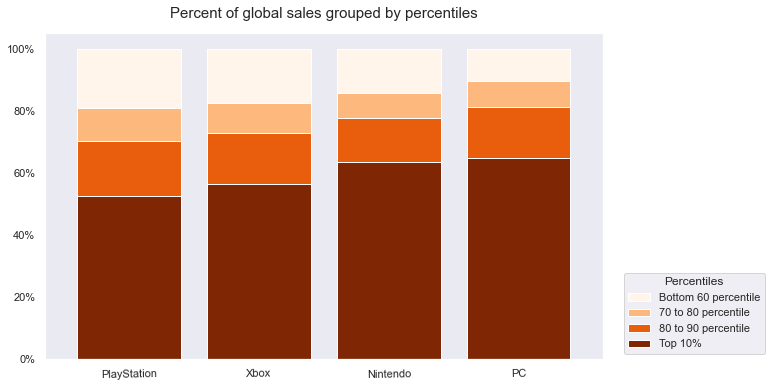

In [38]:
ax = pareto_chart.T.plot(kind='bar', stacked=True, rot=1, width = 0.8, figsize=(10,6), cmap='Oranges_r')

plt.title("Percent of global sales grouped by percentiles", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Percentiles', 
          loc='lower right', bbox_to_anchor= (0.8, 0., 0.5, 0.5))

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.grid()

plt.savefig('img/20.Details_for_Pareto_chart_PC.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

<a id=stacked></a>

### Stacked Bar Charts

In [520]:
stacked = df[['parent_platform', 'global_sales','NA_sales','EU_sales','JP_sales','other_sales']]

In [521]:
stacked_group = stacked.groupby('parent_platform').sum().iloc[:,1:]

In [522]:
stacked_group = stacked_group.iloc[1:,:-1]

In [523]:
percent_stacked = stacked_group.div(stacked_group.sum(axis=0),axis=1)
percent_stacked = percent_stacked.T * 100

In [524]:
colors = list(colors_platforms.values())[:-1]
colors = ['#e60012', '#f47a37', '#003087', '#107c10']

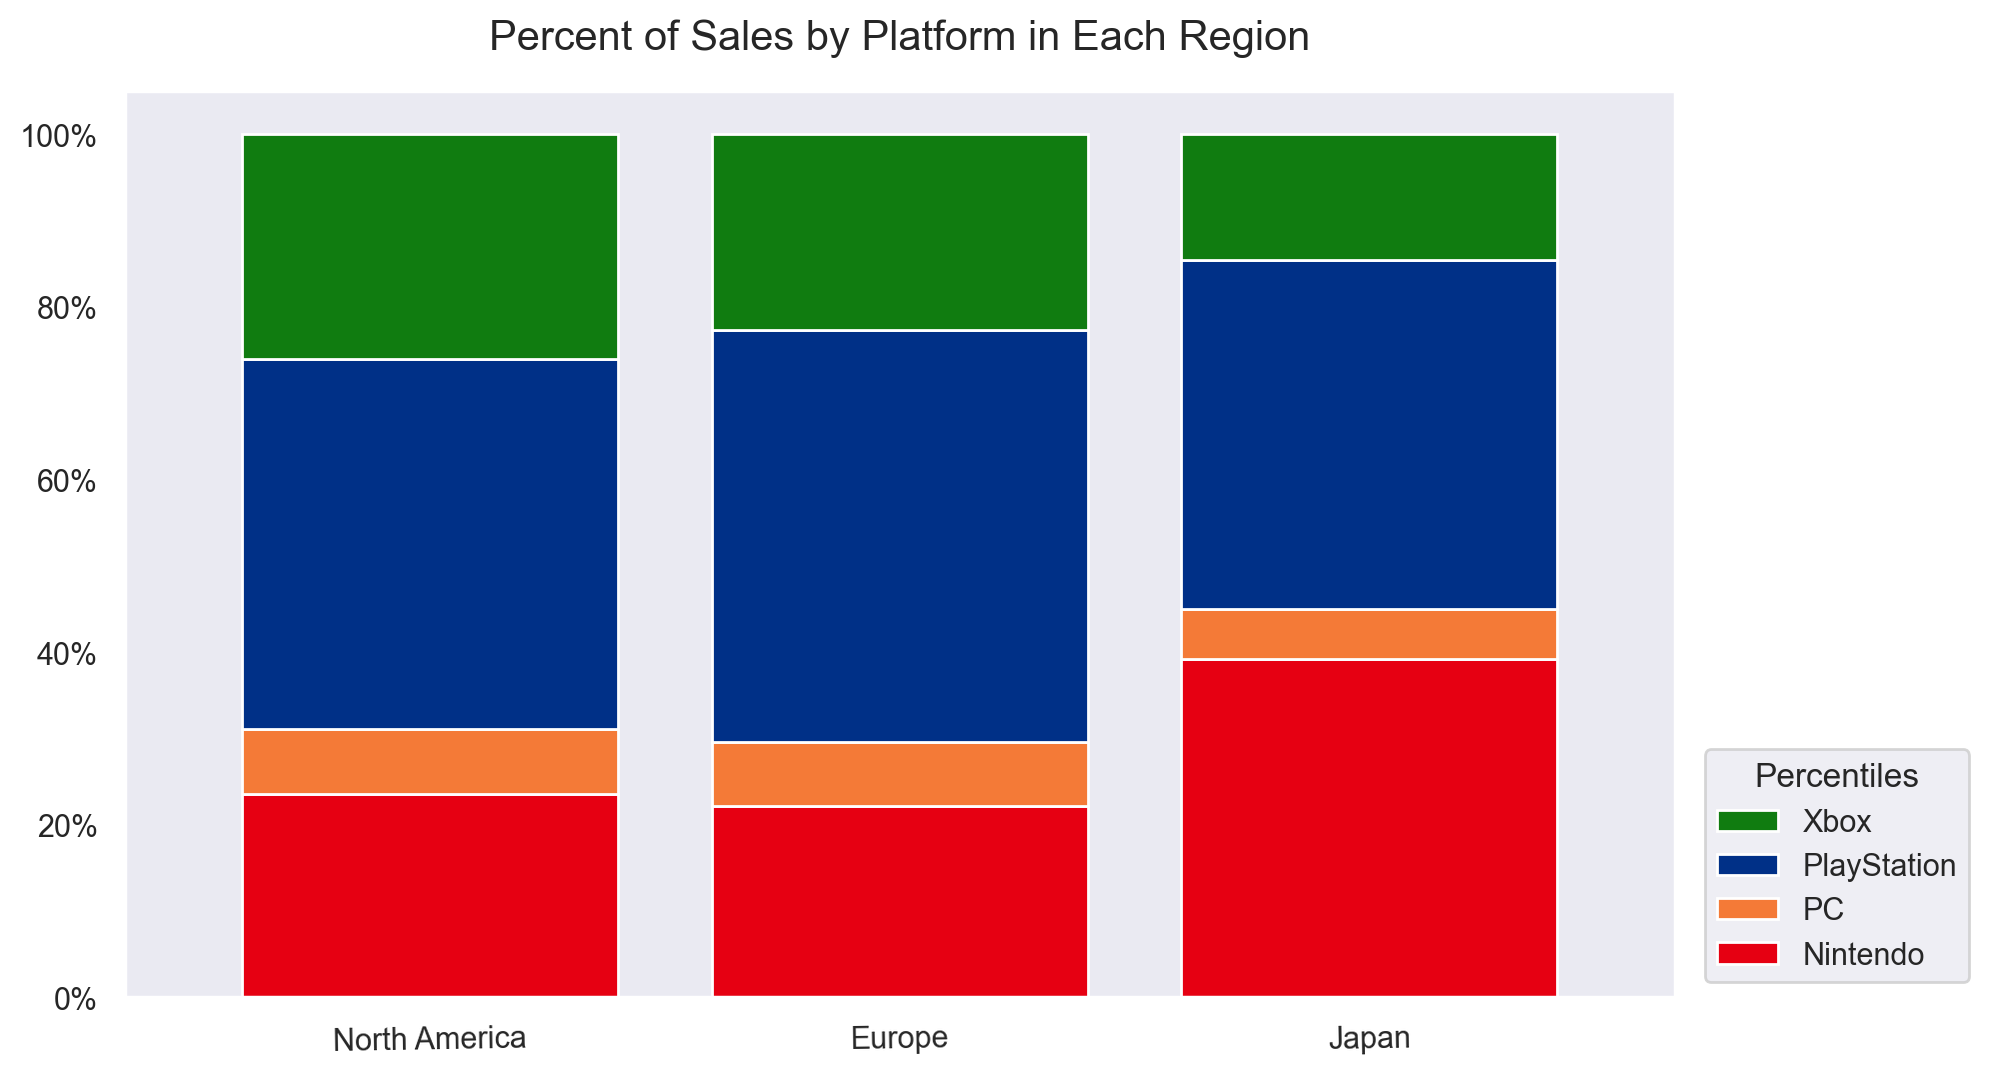

In [525]:
ax = percent_stacked.plot(kind='bar', stacked=True, rot=1, width = 0.8, figsize=(10,6), cmap=matplotlib.colors.ListedColormap(colors))

plt.title("Percent of Sales by Platform in Each Region", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), 
          loc='lower right', bbox_to_anchor= (0.7, 0., 0.5, 0.5))

labels=['North America', 'Europe', 'Japan']

ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax.grid()

plt.savefig('img/22.Percent_sales_per_country.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [532]:
stacked_group = stacked.groupby('parent_platform').sum().iloc[:,1:]
stacked_group = stacked_group.iloc[1:,:-1]
stacked_group

NA_sales  EU_sales  JP_sales
parent_platform                              
Nintendo           759.48    426.10    183.52
PC                 243.55    141.68     27.24
PlayStation       1382.95    917.51    189.04
Xbox               841.38    434.87     68.25

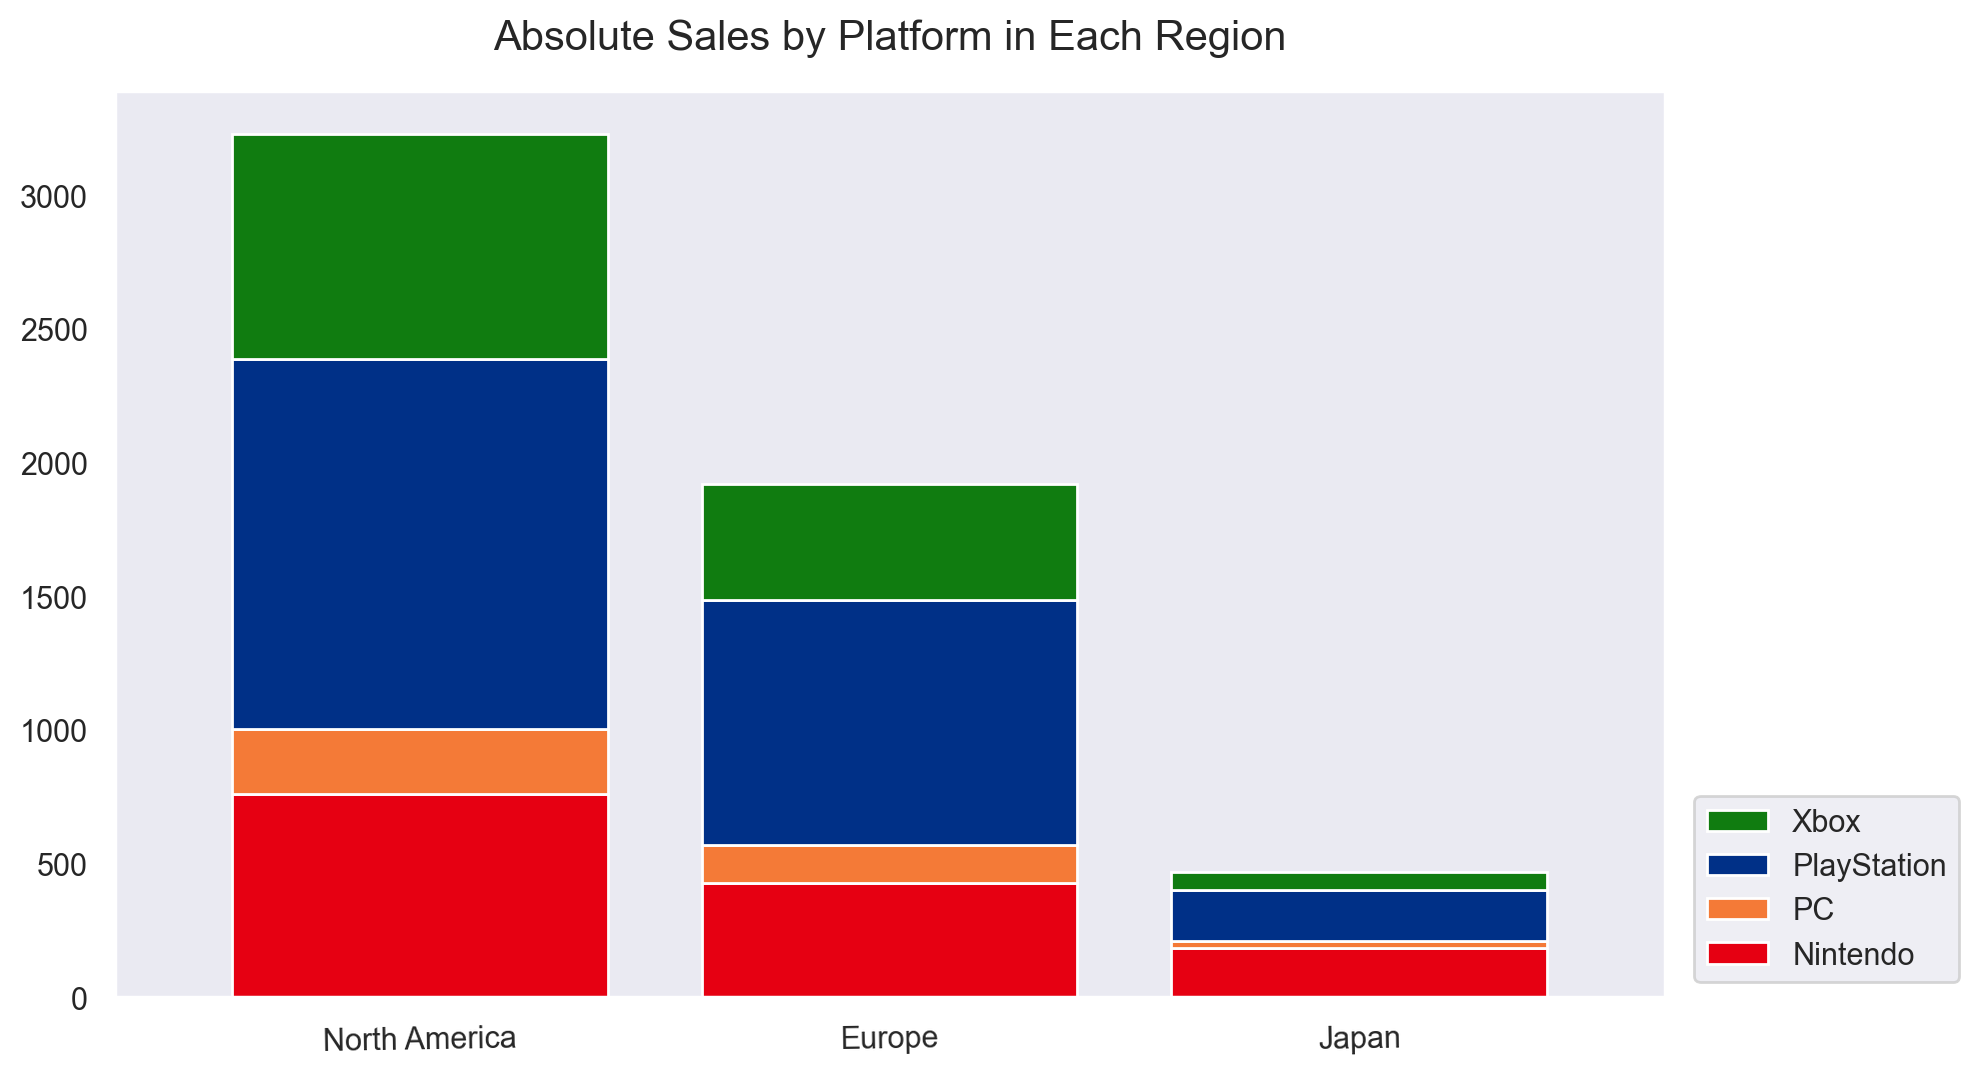

In [533]:
ax = stacked_group.T.plot(kind='bar', stacked=True, rot=1, width = 0.8, figsize=(10,6), cmap=matplotlib.colors.ListedColormap(colors))

plt.title("Absolute Sales by Platform in Each Region", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), 
          loc='lower right', bbox_to_anchor= (0.7, 0., 0.5, 0.5))

labels=['North America', 'Europe', 'Japan']

ax.set_xticklabels(labels)

ax.grid()

plt.savefig('img/23.Sales_per_country.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [565]:
stacked = df[['parent_platform', 'genre']]

change_genres = {'Action':'Action', 'Adventure':'Adventure', 'Platform':'Platform', 'Fighting':'Fighting',
                 'Racing':'Racing', 'Role-Playing':'Role-Playing', 'Shooter':'Shooter', 'Action-Adventure':'Other',
                 'Sports':'Sports','Board Game':'Other', 'Education':'Other','Misc':'Other', 'MMO':'Other', 
                 'Music':'Other','Party':'Other', 'Sandbox':'Other','Visual Novel':'Other',
                 'Strategy':'Other','Puzzle':'Other', 'Simulation':'Other'}

stacked['genre'] = stacked.genre.map(change_genres)

stacked_genres = pd.DataFrame(stacked.value_counts()).unstack(0)
stacked_genres.columns = stacked_genres.columns.droplevel(0)

In [566]:
stacked_genres

parent_platform  Dreamcast  Nintendo     PC  PlayStation   Xbox
genre                                                          
Action                 NaN     492.0  208.0        670.0  423.0
Adventure              1.0     232.0  163.0        207.0   86.0
Fighting               3.0     118.0   14.0        243.0  123.0
Other                  1.0     786.0  644.0        625.0  335.0
Platform               1.0     338.0   61.0        196.0   82.0
Racing                 2.0     196.0   77.0        359.0  246.0
Role-Playing           4.0     263.0  198.0        414.0  121.0
Shooter                1.0     175.0  261.0        411.0  361.0
Sports                 1.0     348.0   64.0        538.0  362.0

In [567]:
stacked_genres.drop('Dreamcast', axis=1, inplace=True)

In [582]:
percent_genres = stacked_genres.div(stacked_genres.sum(axis=0),axis=1)*100

percent_genres = percent_genres[['PlayStation','Xbox','Nintendo','PC']]

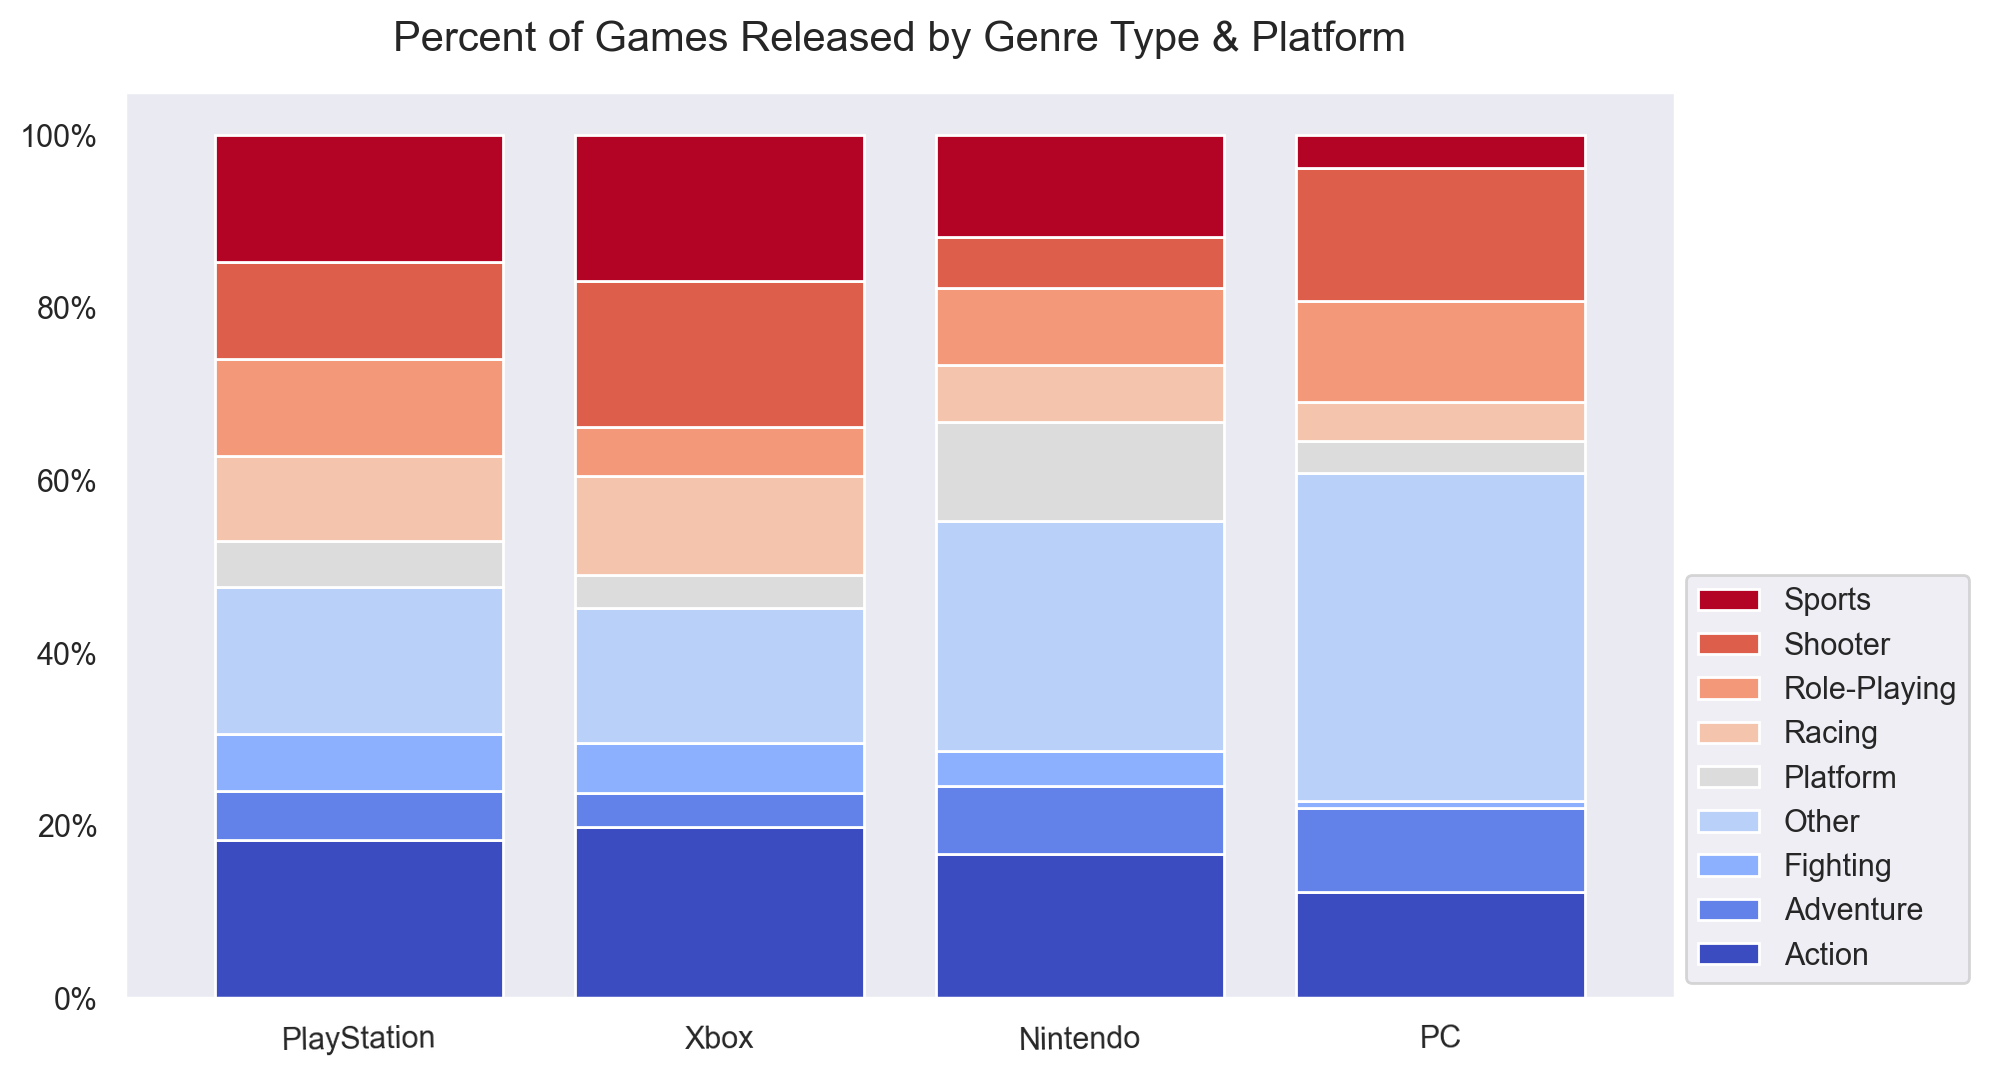

In [626]:
ax = percent_genres.T.plot(kind='bar', stacked=True, rot=1, width = 0.8, figsize=(10,6), cmap='coolwarm')

plt.title("Percent of Games Released by Genre Type & Platform", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), 
          loc='lower right', bbox_to_anchor= (0.7, 0., 0.5, 0.5))

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.xlabel('')
ax.grid()

plt.savefig('img/24.Genre_types_by_platform.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [186]:
# generates a dataframe with the duplicates values
duplicates = pd.concat(g for _, g in df.groupby("name") if len(g) > 1)

In [187]:
duplicates = duplicates[['name', 'rating','parent_platform','global_sales']]
duplicates = duplicates.pivot_table(index=['name','rating'], 
                    columns='parent_platform', 
                    values='global_sales')

In [188]:
# for some reason some games were duplicated in the same console we need to take care of those cases
duplicates = duplicates.dropna(thresh=2)
duplicates = duplicates.reset_index(level=1)
duplicates.drop(['Dreamcast','PC'], axis=1, inplace=True)

In [192]:
duplicates = duplicates[(duplicates['Nintendo'] > 1)|(duplicates['PlayStation'] >1)|(duplicates['Xbox'] >1)]
duplicates.dropna(thresh=3, subset=['Nintendo','PlayStation','Xbox'], inplace=True)

In [193]:
duplicates['best_selling'] = duplicates.drop('rating', axis=1).idxmax(axis=1)

In [194]:
total_sells = pd.DataFrame(duplicates.value_counts(subset=['best_selling','rating'])).reset_index()
total_sells.columns = ['best_selling','rating','values']
total_sells = total_sells.pivot(index='rating',columns='best_selling',values='values')
total_sells = total_sells[['PlayStation','Xbox','Nintendo']]
total_sells = total_sells.reindex(["E", "E10", "T","M"])

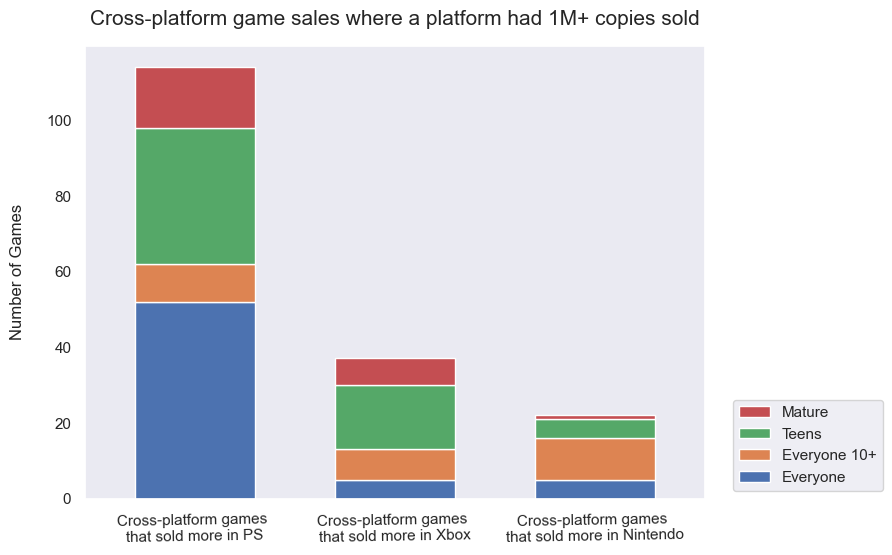

In [217]:
ax = total_sells.T.plot(kind='bar', stacked=True, rot=1, width = 0.6, figsize=(8,6))

plt.title("Cross-platform game sales where a platform had 1M+ copies sold", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
labels = ['Everyone', 'Everyone 10+', 'Teens', 'Mature']
ax.legend(reversed(handles), reversed(labels), 
          loc='lower right', bbox_to_anchor= (0.8, 0., 0.5, 0.5))

labels=['Cross-platform games \nthat sold more in PS', 'Cross-platform games \nthat sold more in Xbox', 'Cross-platform games \nthat sold more in Nintendo']
ax.set_xticklabels(labels)

plt.ylabel('Number of Games', labelpad=15)
plt.xlabel('')

ax.grid()

plt.savefig('img/27.Sales_same_games_absolute.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

In [205]:
total_sells_perc = (total_sells / total_sells.sum(axis=0)) * 100

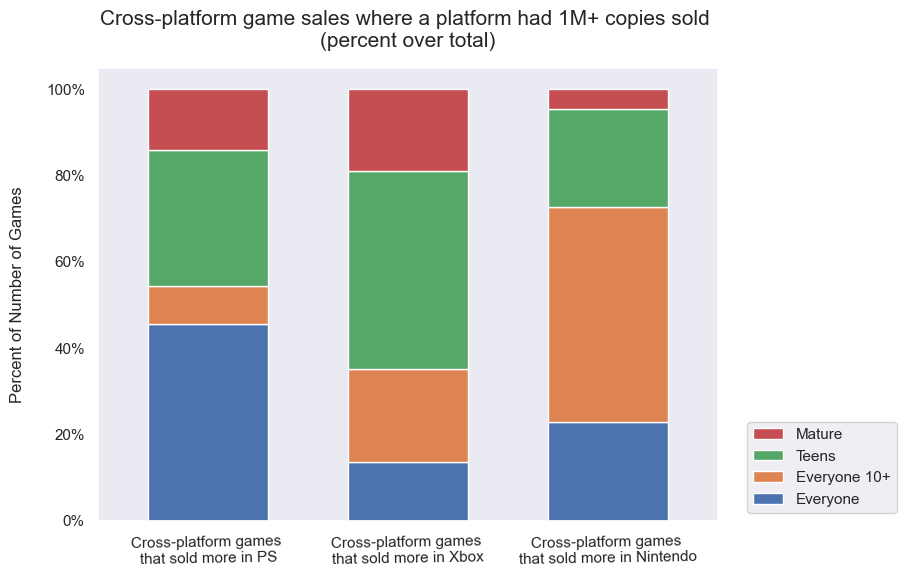

In [218]:
ax = total_sells_perc.T.plot(kind='bar', stacked=True, rot=1, width = 0.6, figsize=(8,6))

plt.title("Cross-platform game sales where a platform had 1M+ copies sold \n(percent over total)", size=15, pad=15)
handles, labels = ax.get_legend_handles_labels()
labels = ['Everyone', 'Everyone 10+', 'Teens', 'Mature']
ax.legend(reversed(handles), reversed(labels), 
          loc='lower right', bbox_to_anchor= (0.8, 0., 0.5, 0.5))

labels=['Cross-platform games \nthat sold more in PS', 'Cross-platform games \nthat sold more in Xbox', 'Cross-platform games \nthat sold more in Nintendo']
ax.set_xticklabels(labels)

ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
plt.ylabel('Percent of Number of Games', labelpad=15)
plt.xlabel('')
ax.grid()

plt.savefig('img/27.Sales_same_games_percent.png', transparent=True, dpi=200, bbox_inches='tight')
plt.show()

<a id=radar></a>

### Radar Charts

In [96]:
df.columns

Index(['Unnamed: 0', 'name', 'genre', 'parent_platform', 'platform',
       'publisher', 'developer', 'release_date', 'rating', 'global_sales',
       'NA_sales', 'EU_sales', 'JP_sales', 'other_sales', 'generation',
       'players_category', 'players', 'online', 'critic_positive',
       'critic_neutral', 'critic_negative', 'metascore', 'num_critic_reviews',
       'user_positive', 'user_neutral', 'user_negative', 'user_score',
       'num_users_reviews'],
      dtype='object')

In [162]:
radar = df[['NA_sales','EU_sales','JP_sales','genre']]

change_genres = {'Action':'Action', 'Adventure':'Adventure', 'Platform':'Platform', 'Fighting':'Fighting',
                 'Racing':'Racing', 'Role-Playing':'Role-Playing', 'Shooter':'Shooter', 'Action-Adventure':'Other',
                 'Sports':'Sports','Board Game':'Other', 'Education':'Other','Misc':'Other', 'MMO':'Other', 
                 'Music':'Other','Party':'Other', 'Sandbox':'Other','Visual Novel':'Other',
                 'Strategy':'Other','Puzzle':'Other', 'Simulation':'Other'}

radar['genre'] = radar.genre.map(change_genres)
radar = radar.groupby('genre').sum().T.reset_index()

In [163]:
radar['index'] = ['North America Sales', 'Europe Sales', 'Japan Sales']

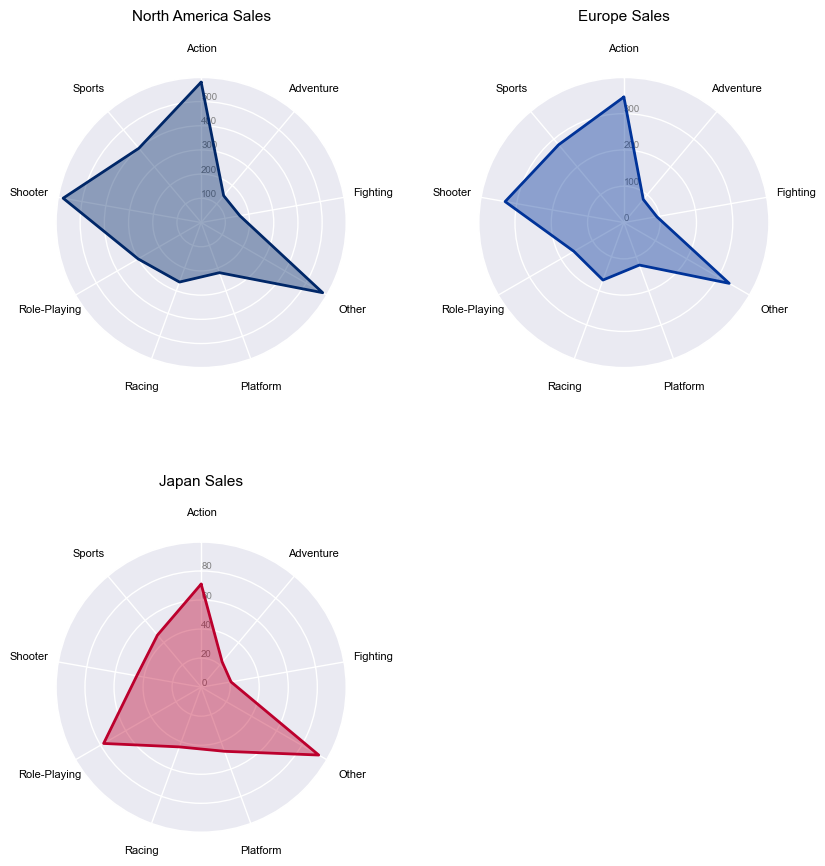

In [200]:
# PART 1: Define a function that do a plot for one line of the dataset
 
def make_spider(row, title, color, maximum, minimum, steps):

    # number of variable
    categories=list(radar)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True)
    

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks(np.arange(minimum,maximum,steps), [str(i) for i in np.arange(minimum,maximum,steps)], color="grey", size=7)
    plt.ylim(0,maximum)

    # Ind1
    values=radar.loc[row].drop('index').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color='black', y=1.1, pad=20)
    

# PART 2: Apply to all dataset

# create functions for ranges (requires math module)
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100
def rounddown(x):
    return int(math.floor(x / 100.0)) * 100

# initialize the figure
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Loop to plot
for row, color in zip(range(0, len(radar.index)),list(continent_colors.values())):
    plt.subplots_adjust(hspace=0.6)
    
    # create the values
    values=radar.loc[row].drop('index').values.flatten().tolist()
    maximum = roundup(max(values))
    minimum = rounddown(min(values))
    if maximum == 100:
        steps = 20
    else:
        steps = 100
        
    # create the plots using the above function
    make_spider(row=row, title=radar['index'][row], color=color, maximum=maximum, minimum=minimum, steps=steps)
   
    # save the figure
    plt.savefig('img/Radar_plot_Sales', dpi=200)

[GO TO TOP](#top)